# Predicting mycotoxin levels (DON concentration)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

## Load The Dataset

In [4]:
df=pd.read_csv("MLE-Assignment.csv")

In [5]:
df.head()

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  

[5 rows x 450 columns]

## Inspect for missing Values

In [7]:
df.isna().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

## Inspect for Outlier

In [9]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [10]:
df.drop(columns='hsi_id',axis=1,inplace=True)

0


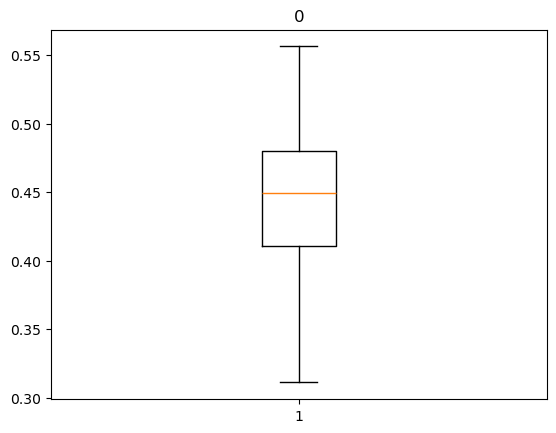

1


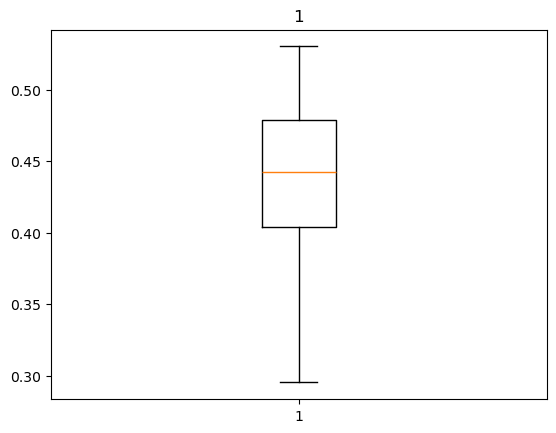

2


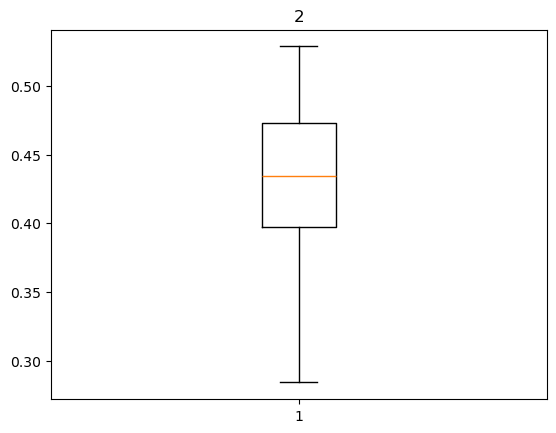

3


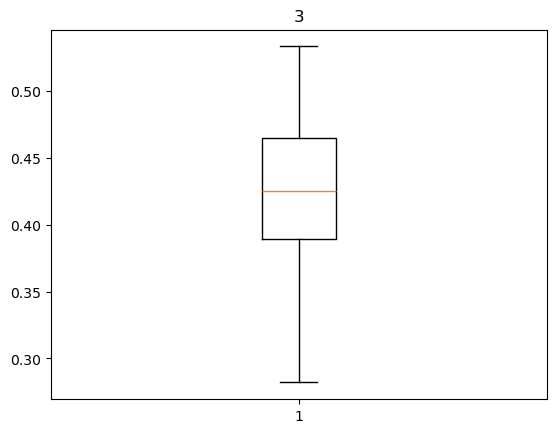

4


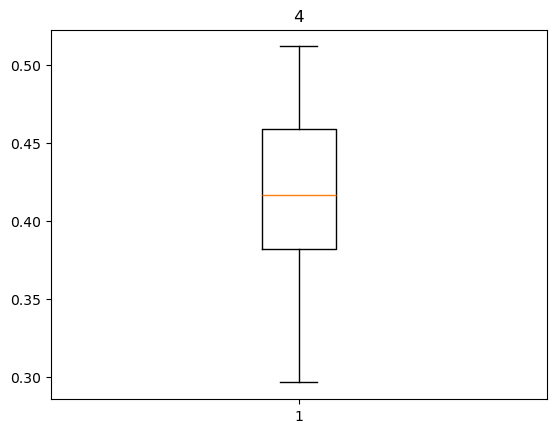

5


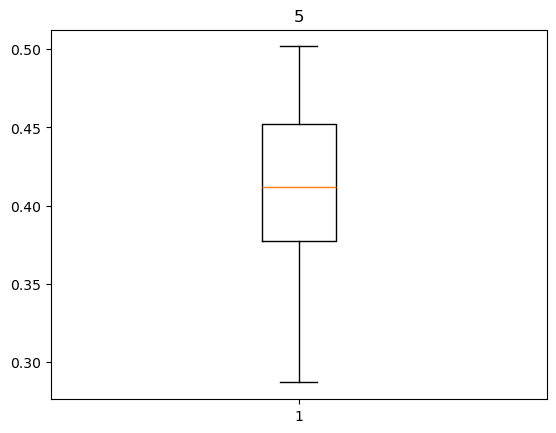

6


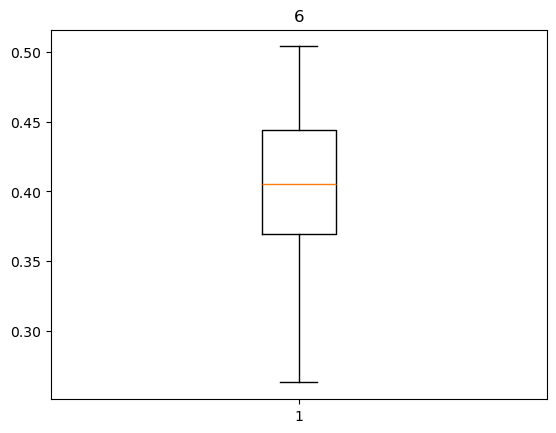

7


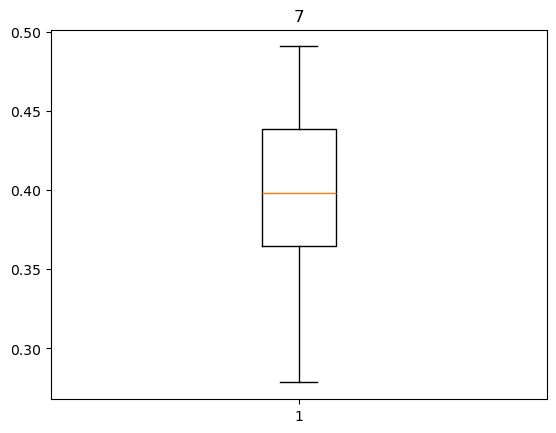

8


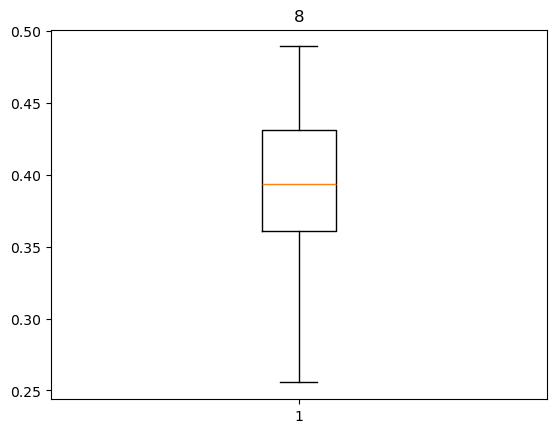

9


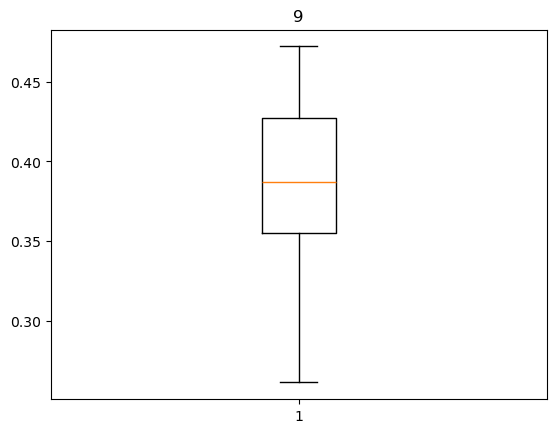

10


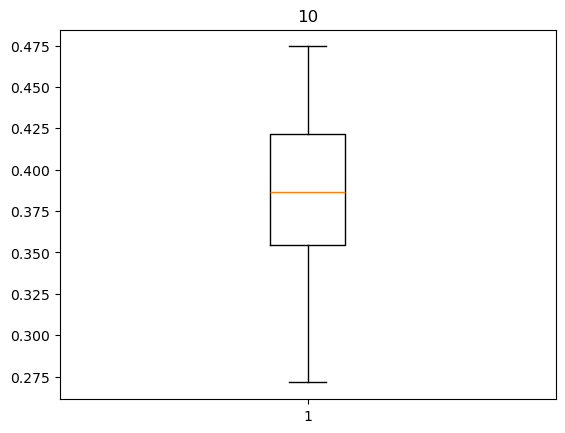

11


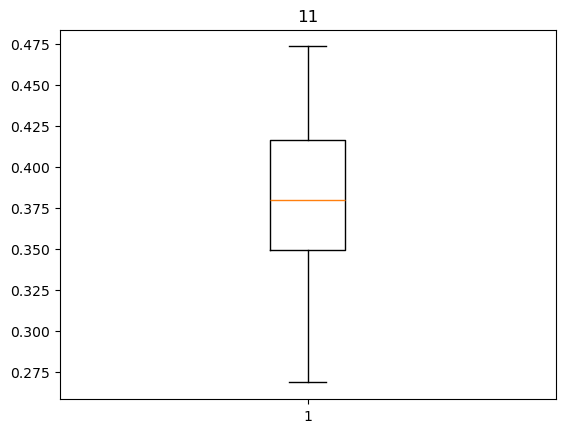

12


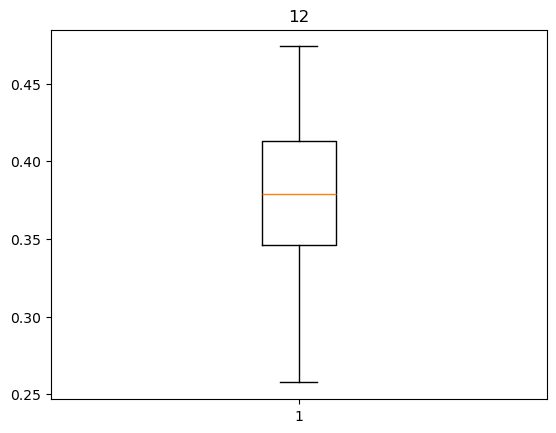

13


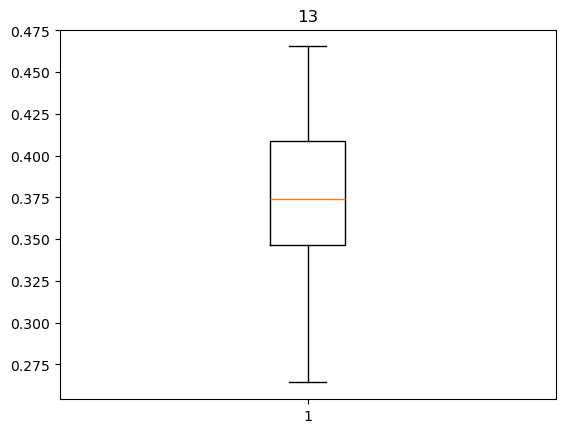

14


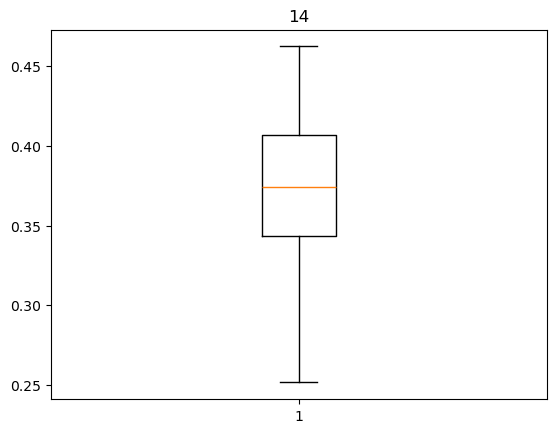

15


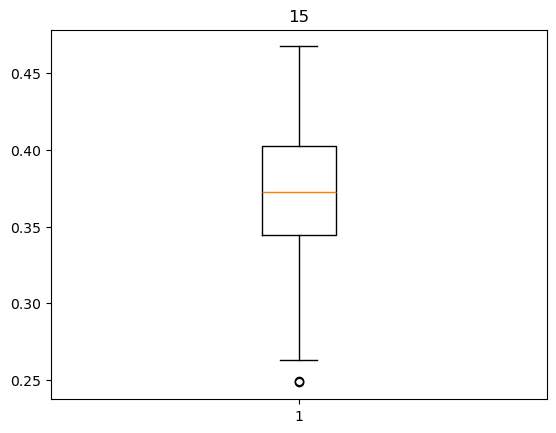

16


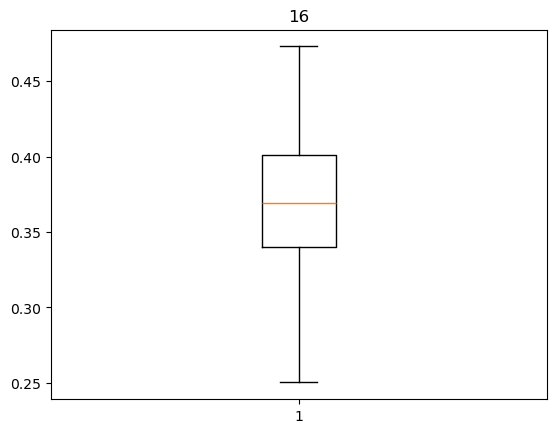

17


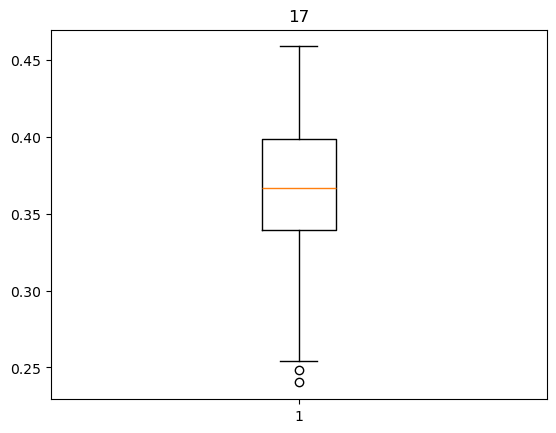

18


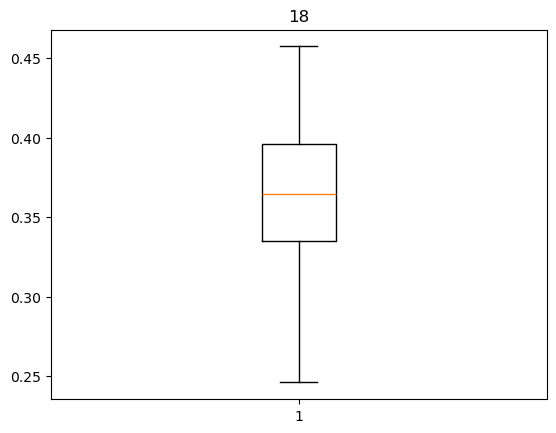

19


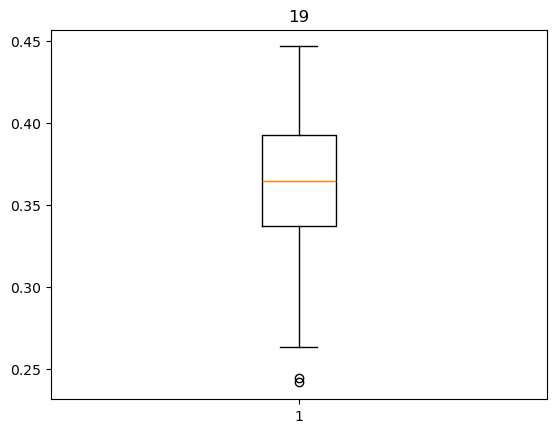

20


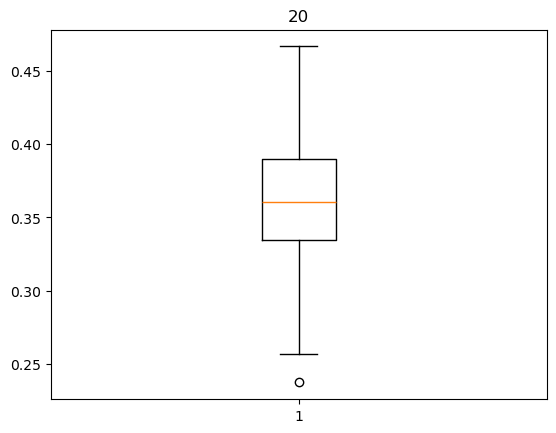

21


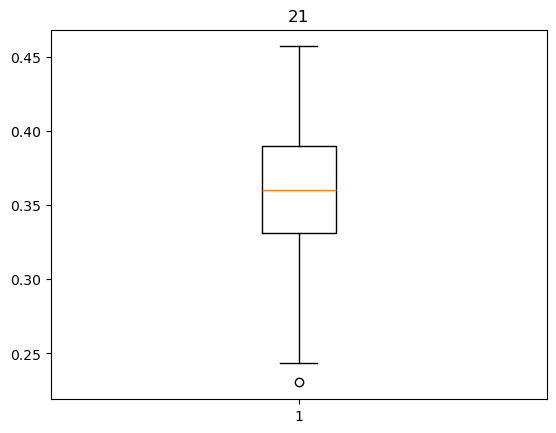

22


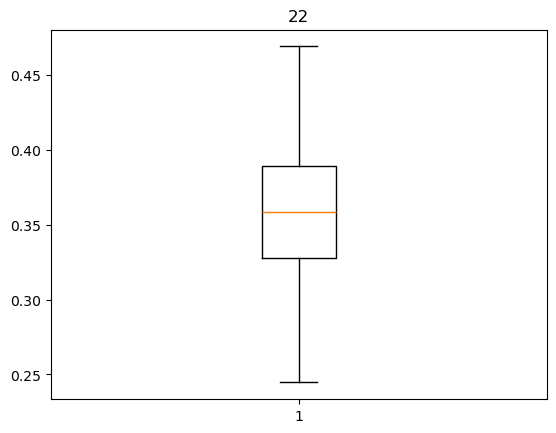

23


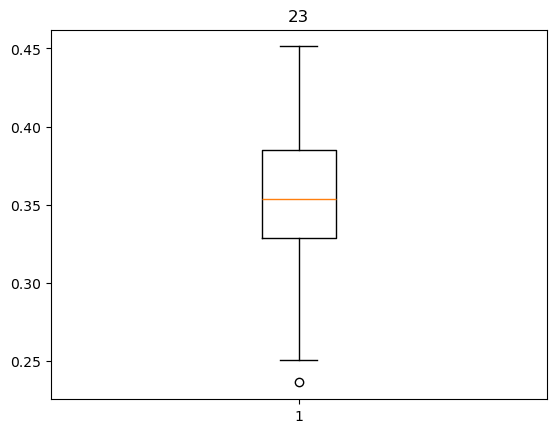

24


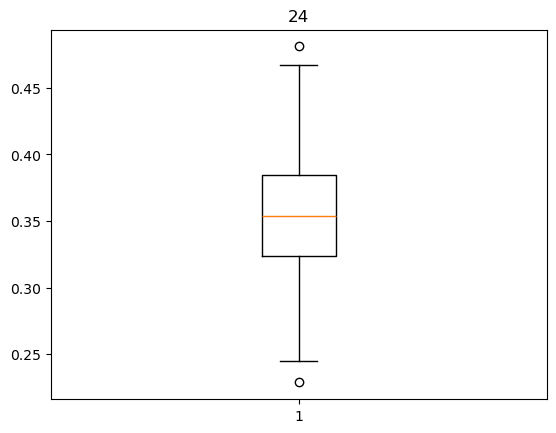

25


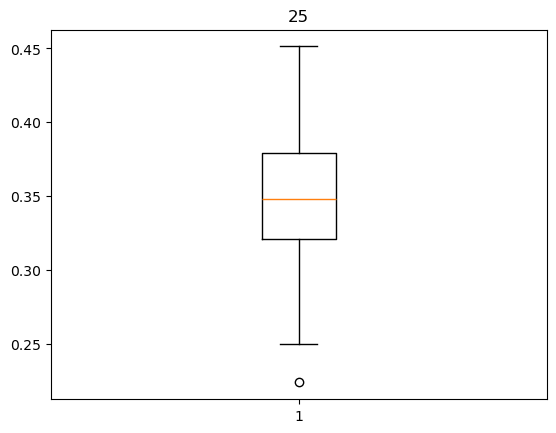

26


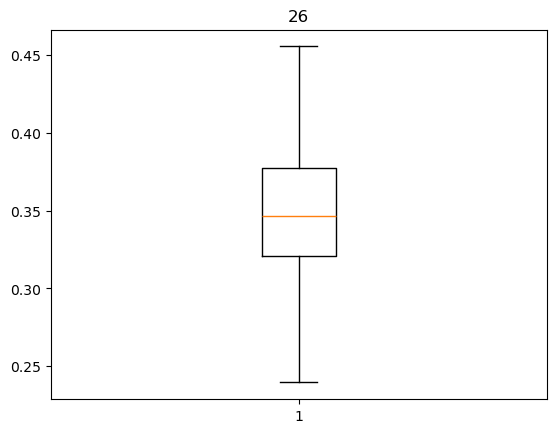

27


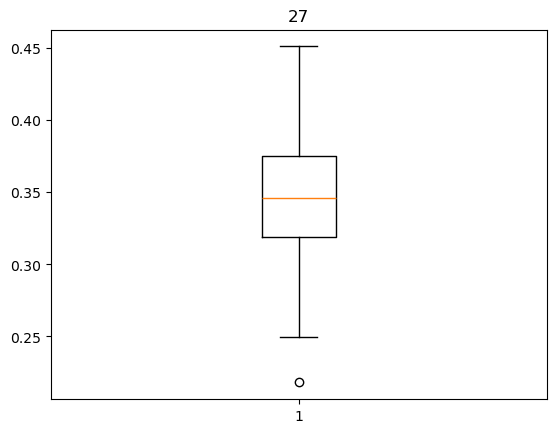

28


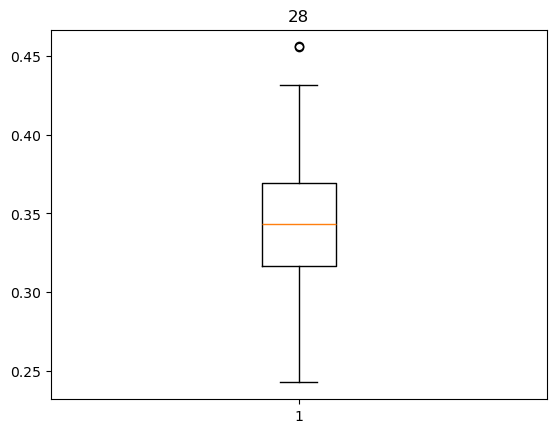

29


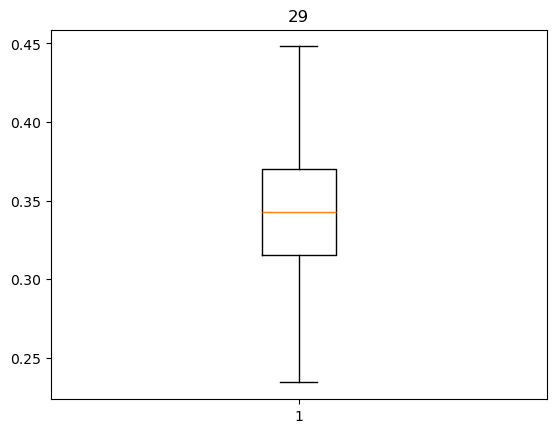

30


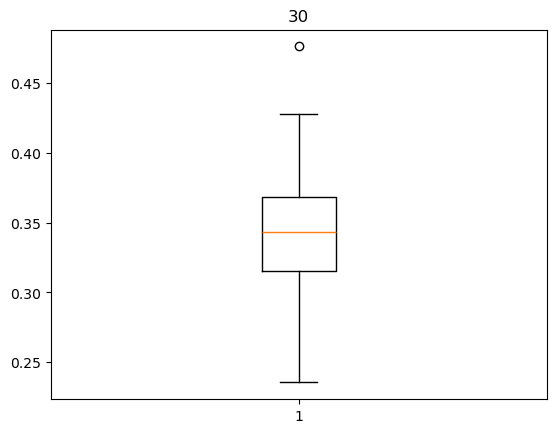

31


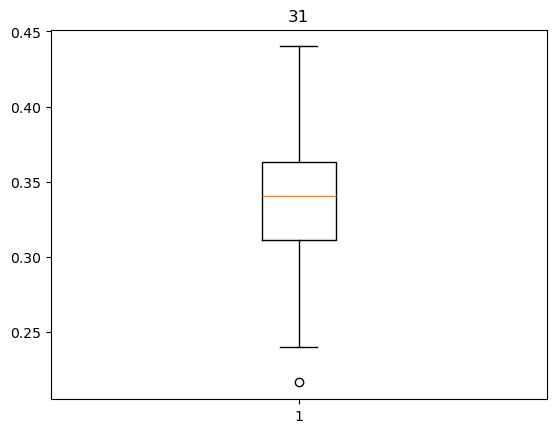

32


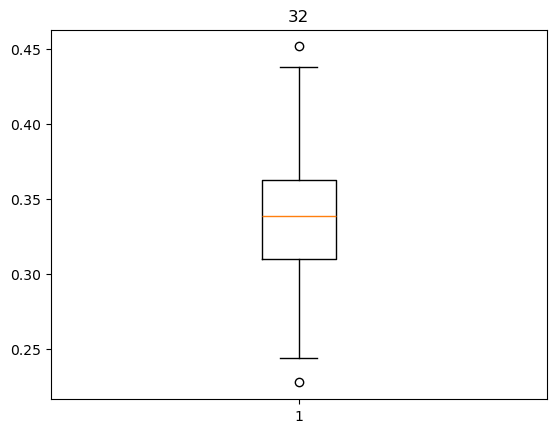

33


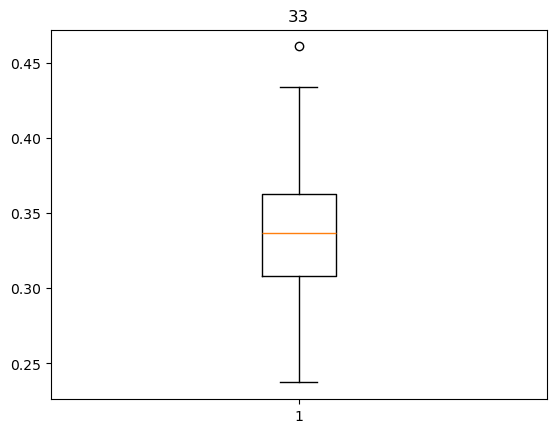

34


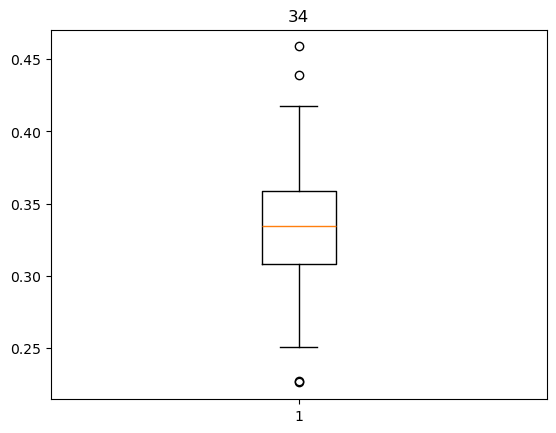

35


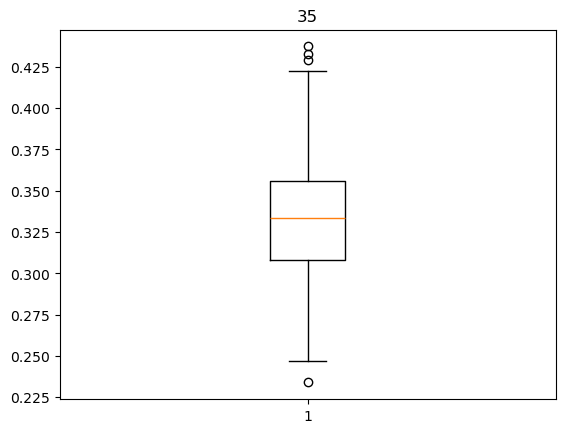

36


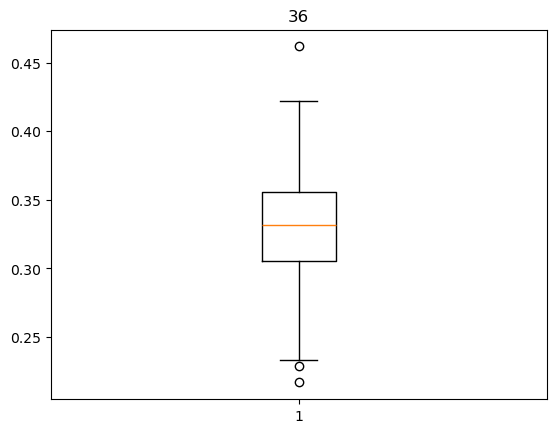

37


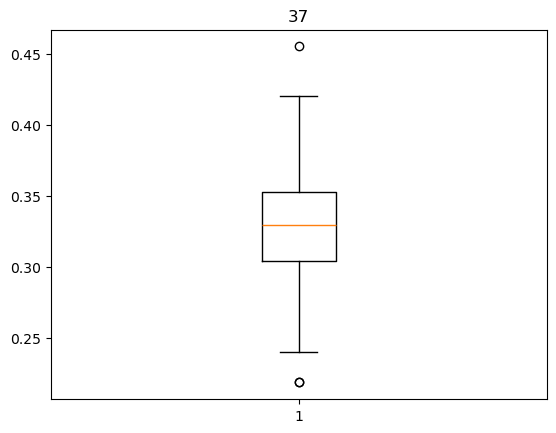

38


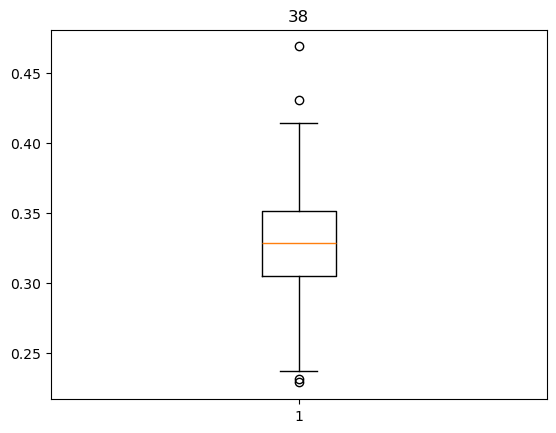

39


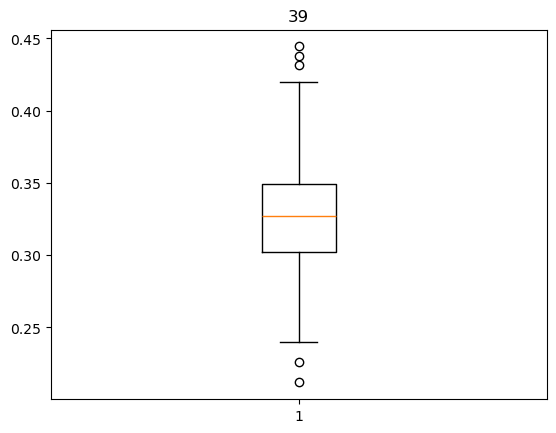

40


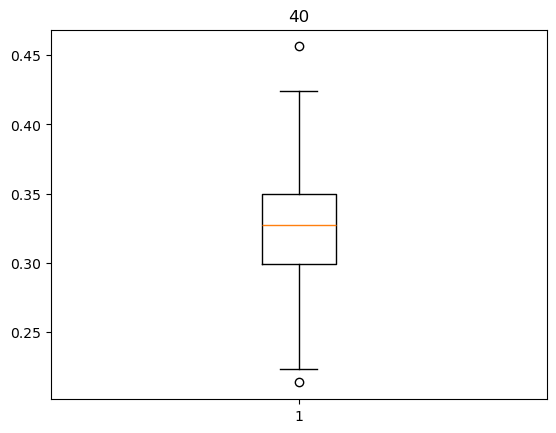

41


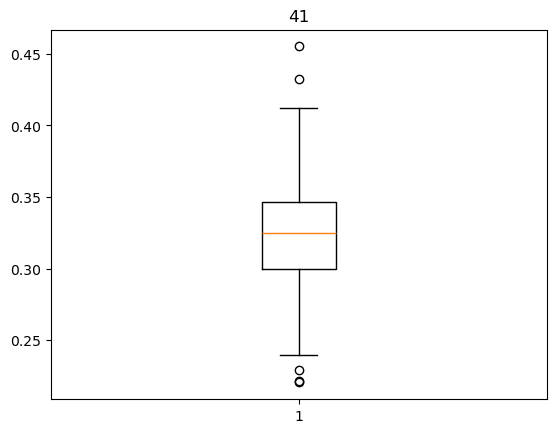

42


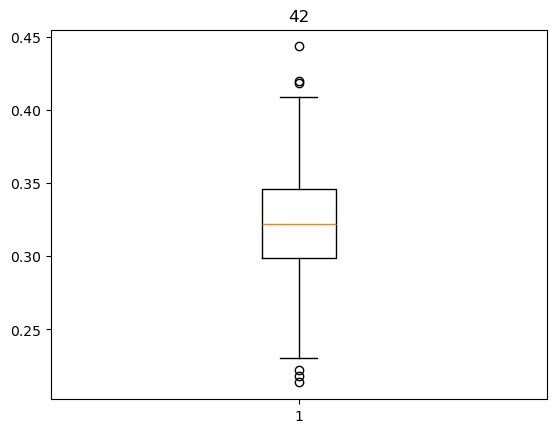

43


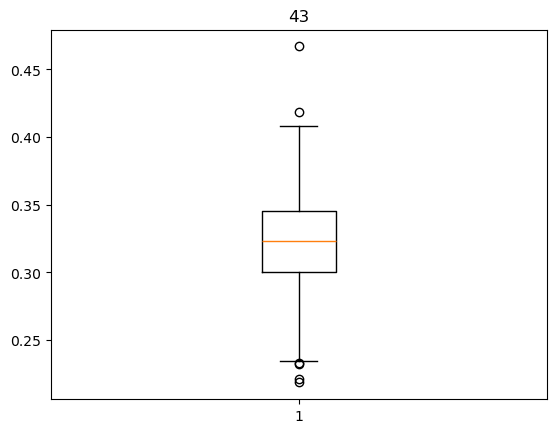

44


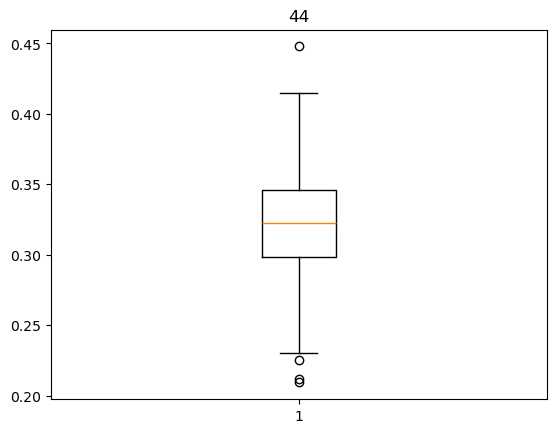

45


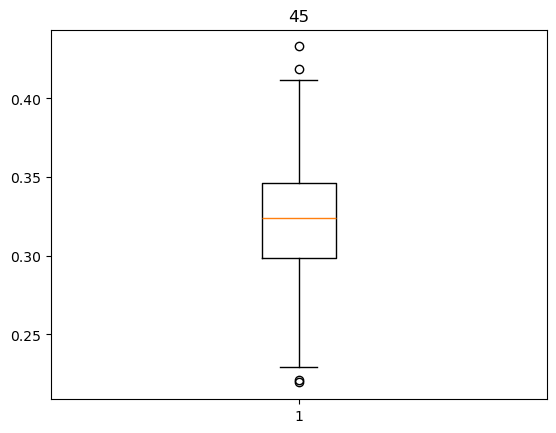

46


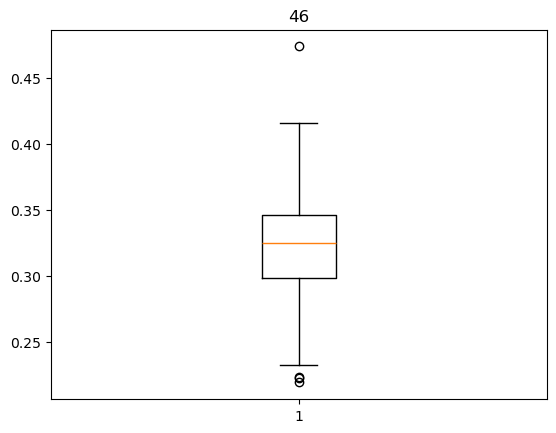

47


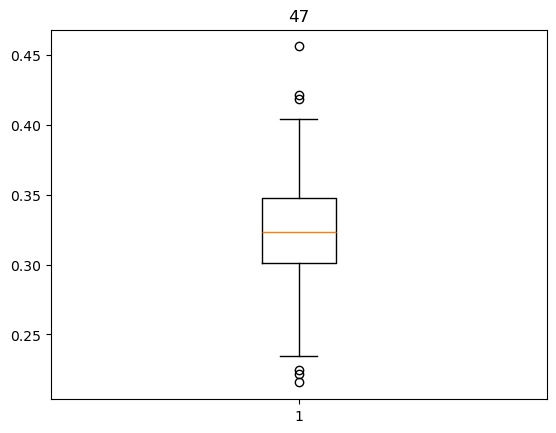

48


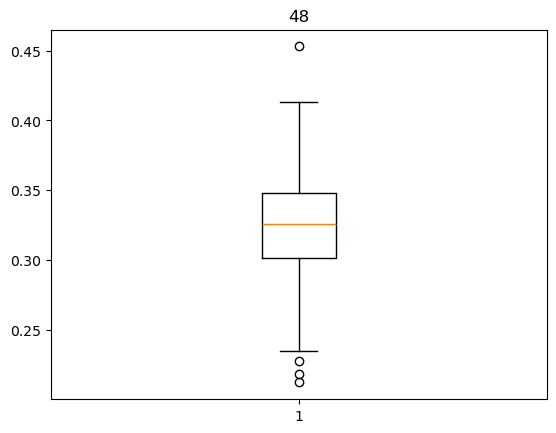

49


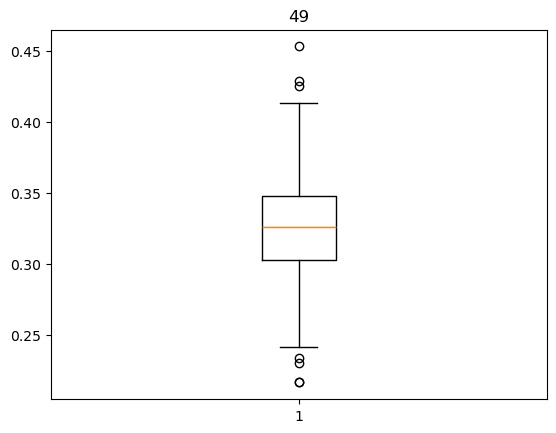

50


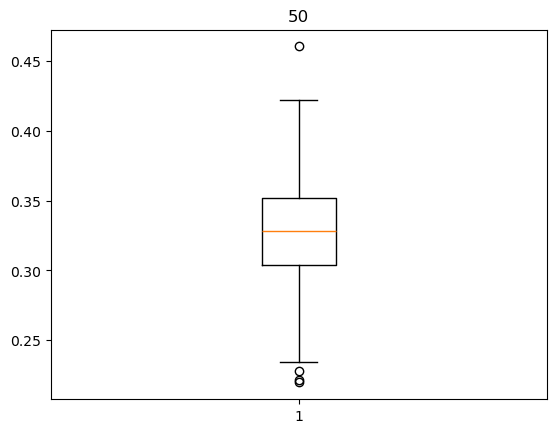

51


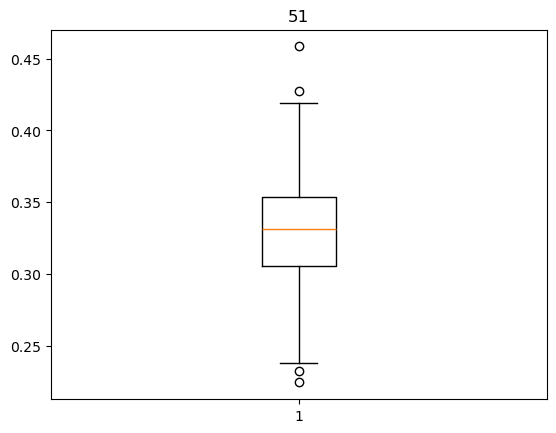

52


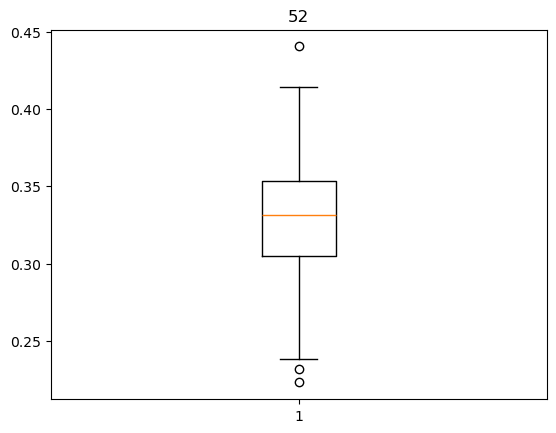

53


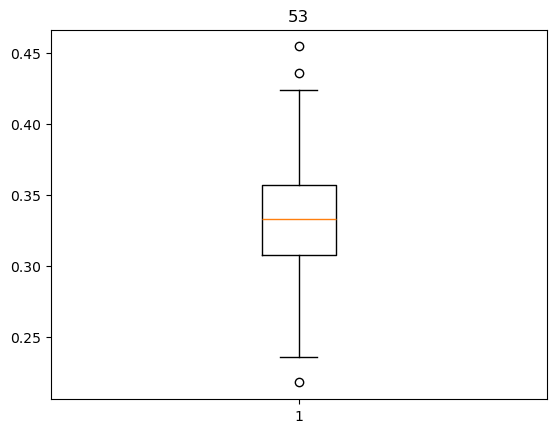

54


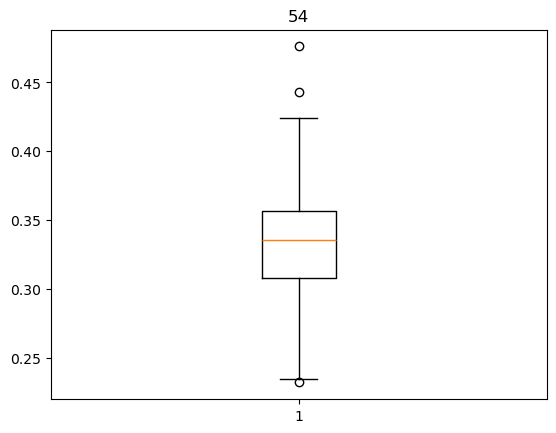

55


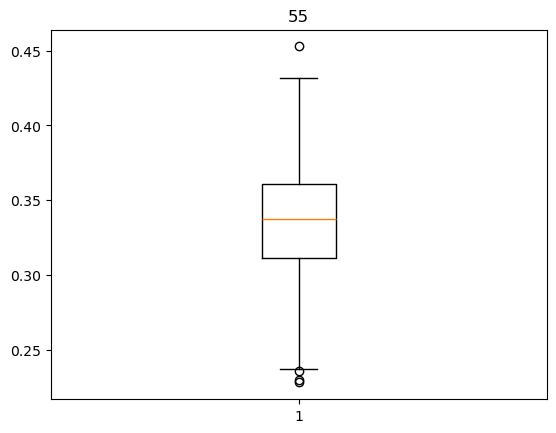

56


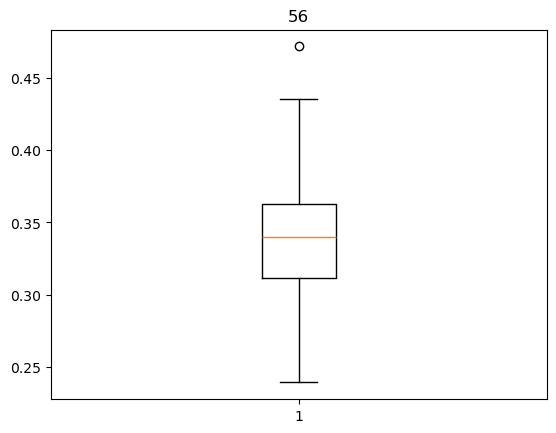

57


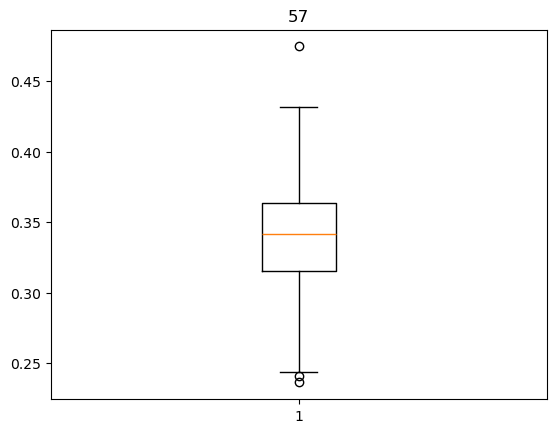

58


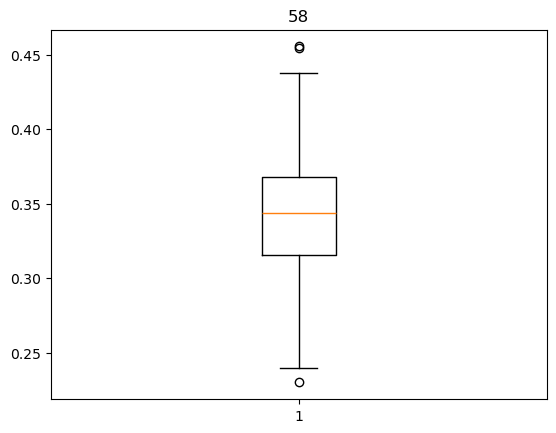

59


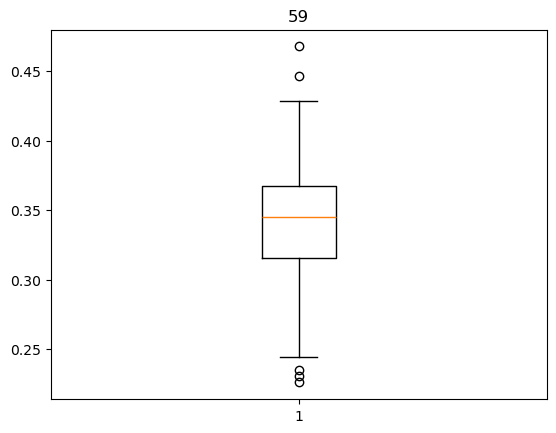

60


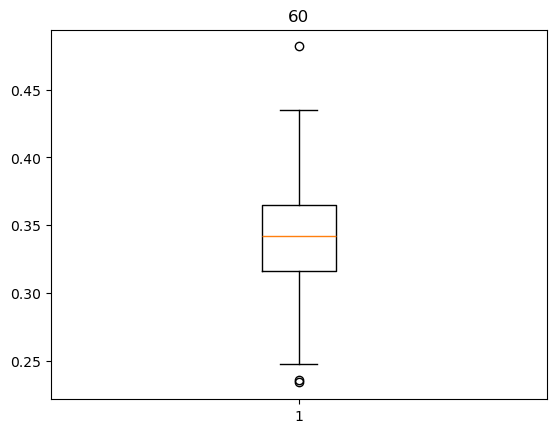

61


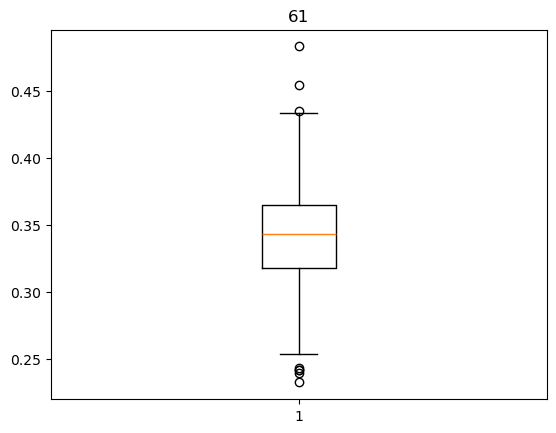

62


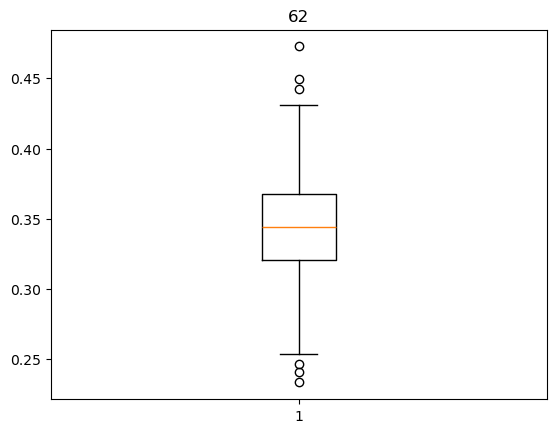

63


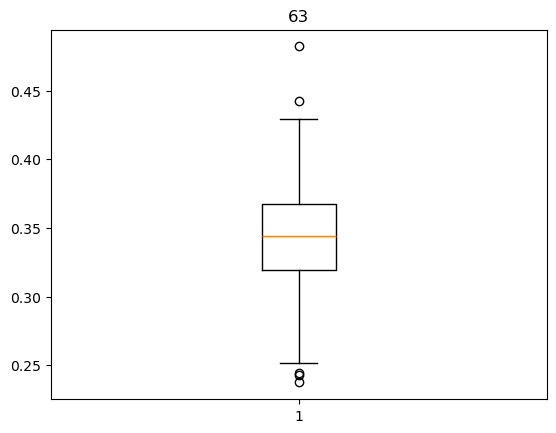

64


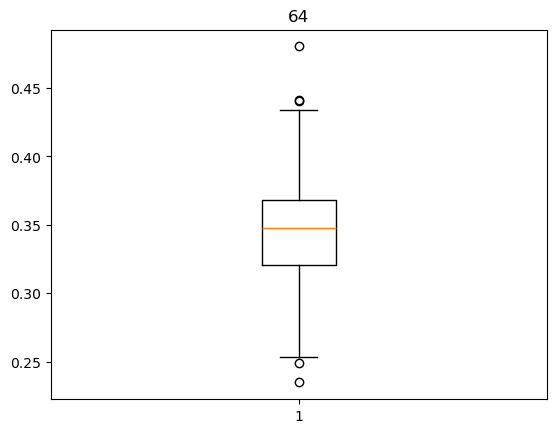

65


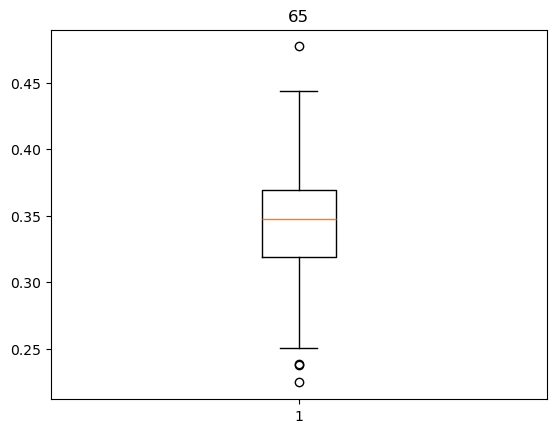

66


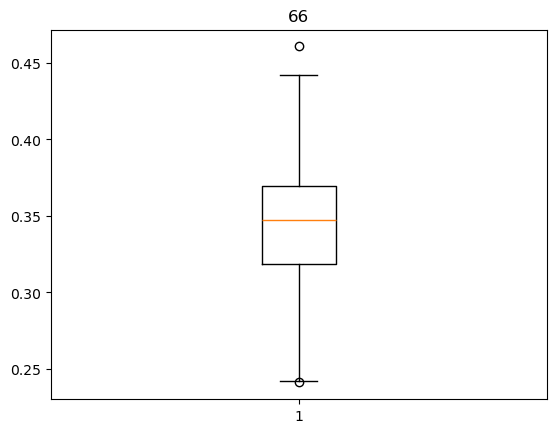

67


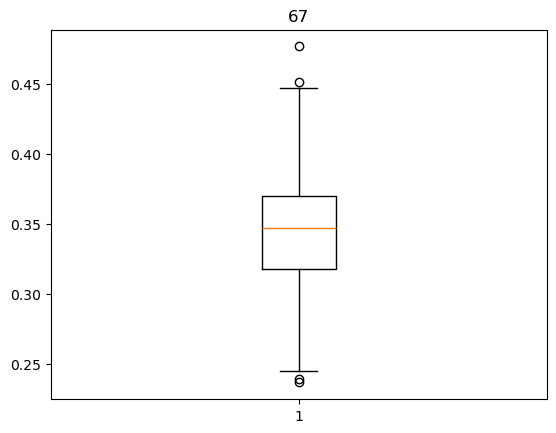

68


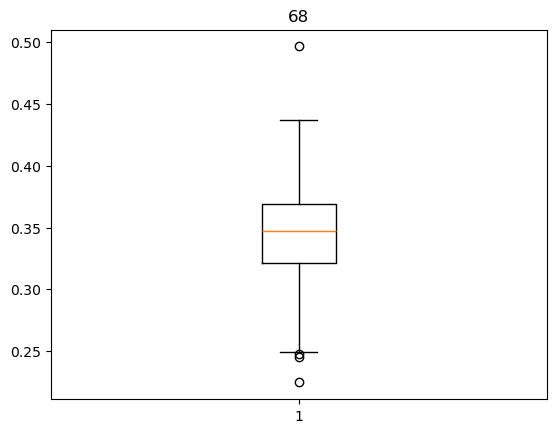

69


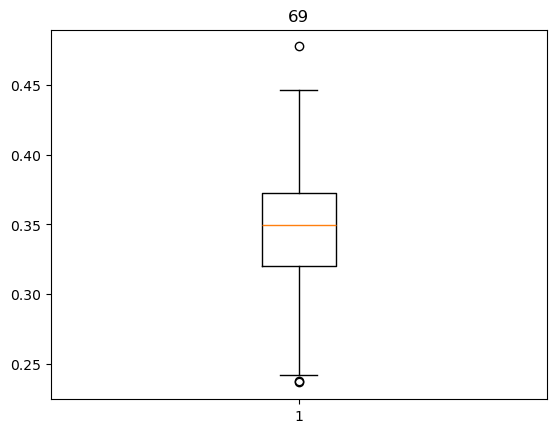

70


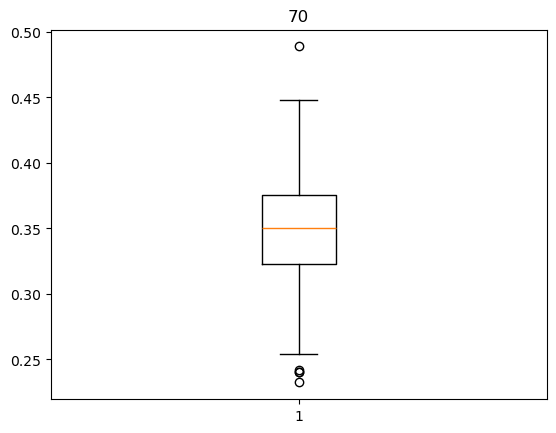

71


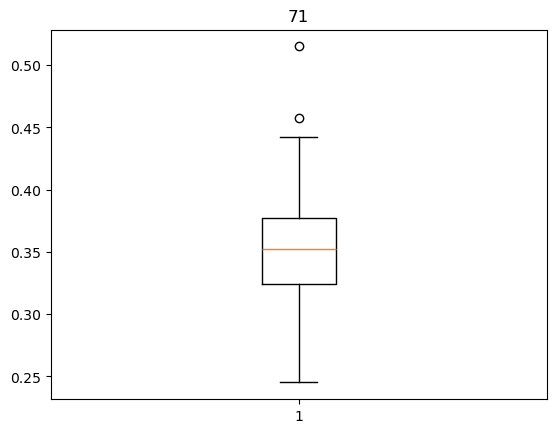

72


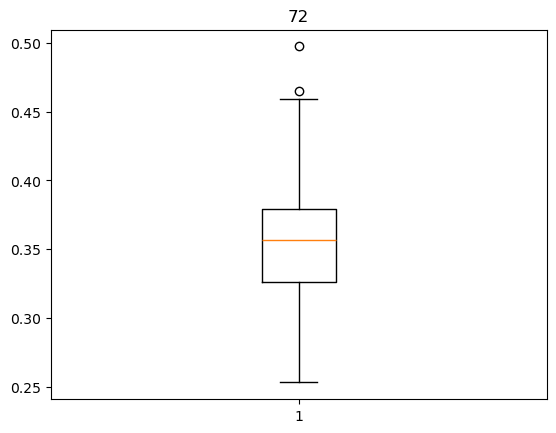

73


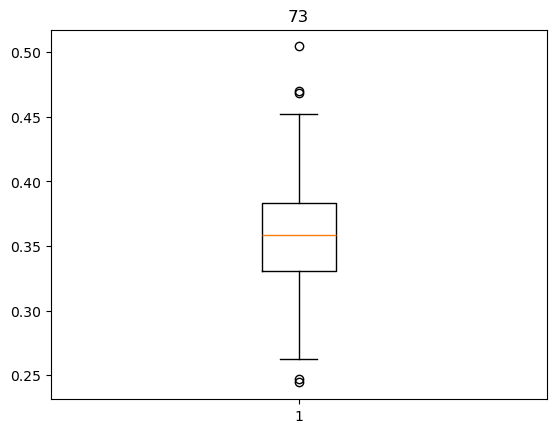

74


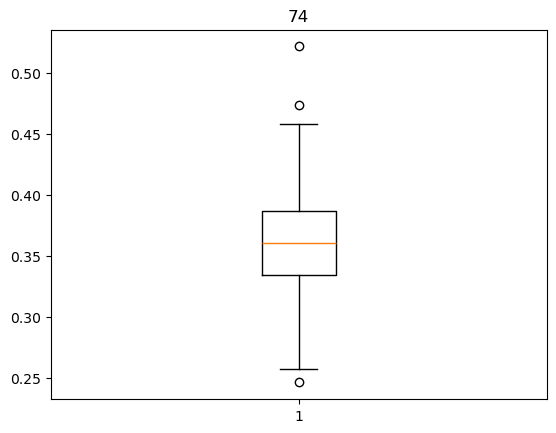

75


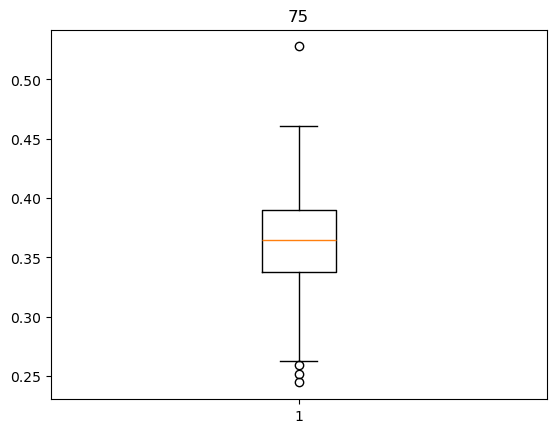

76


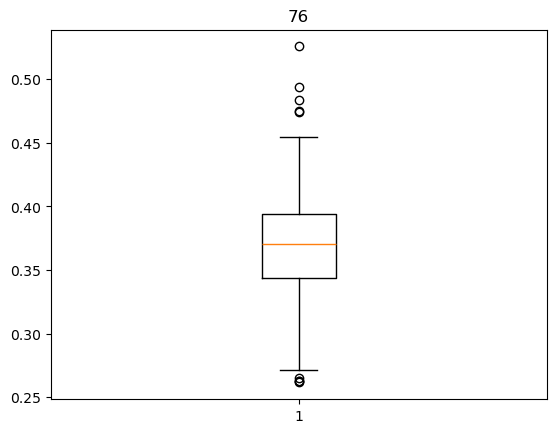

77


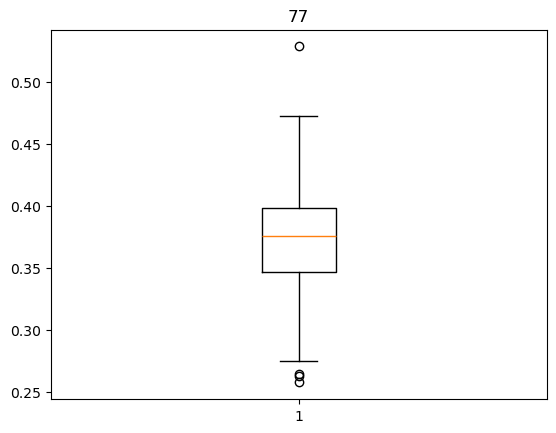

78


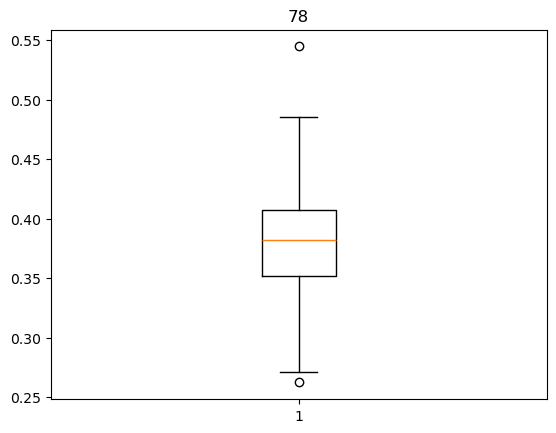

79


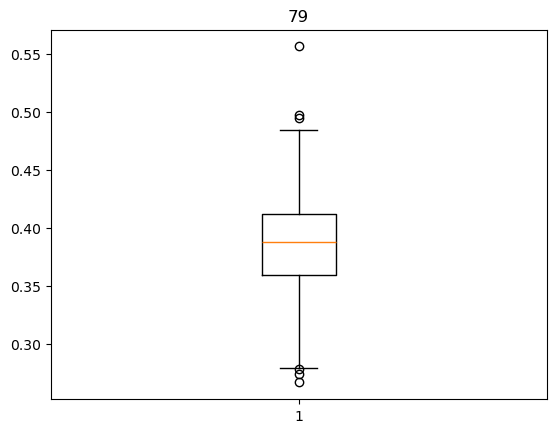

80


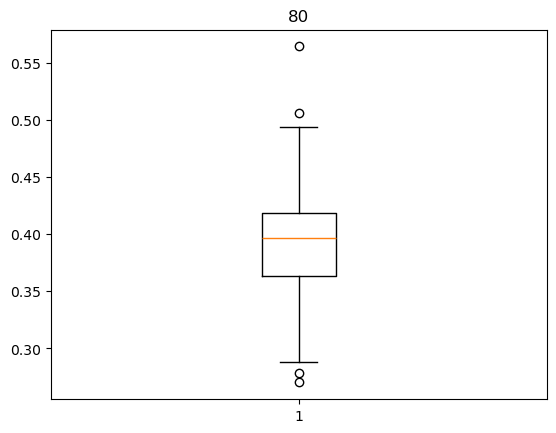

81


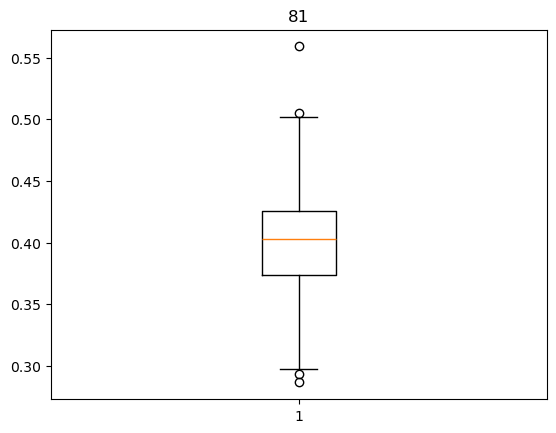

82


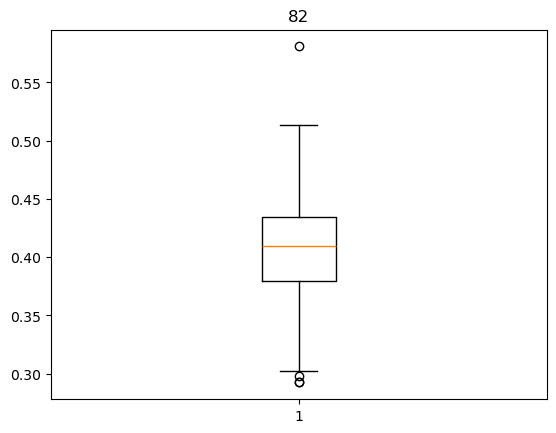

83


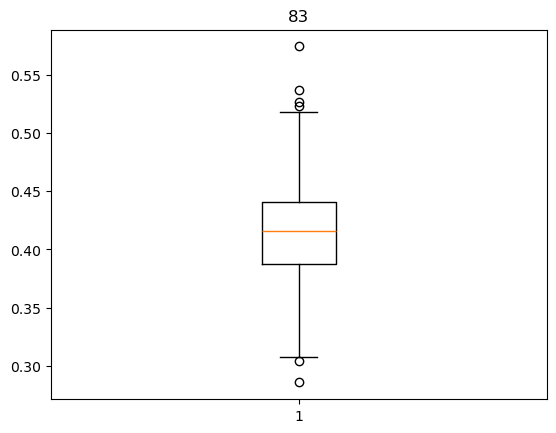

84


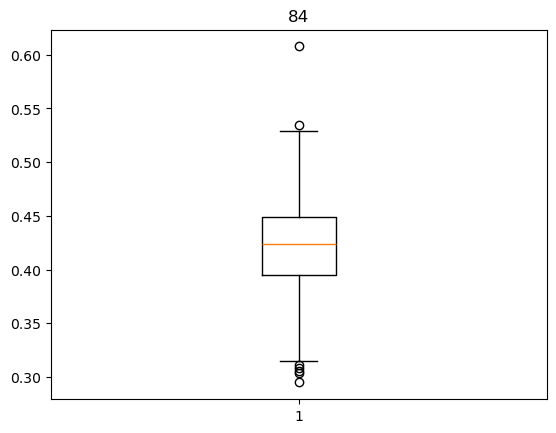

85


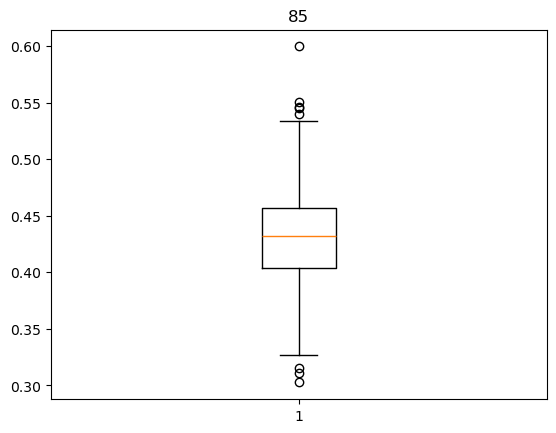

86


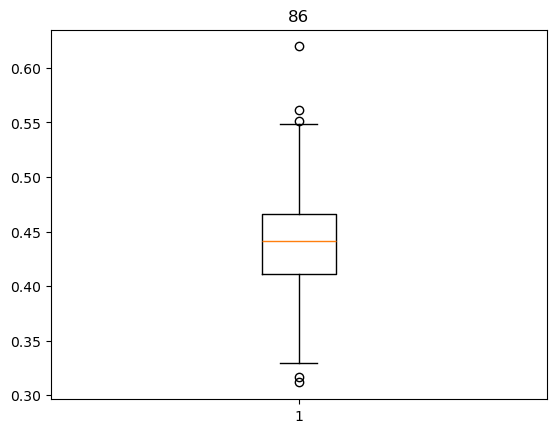

87


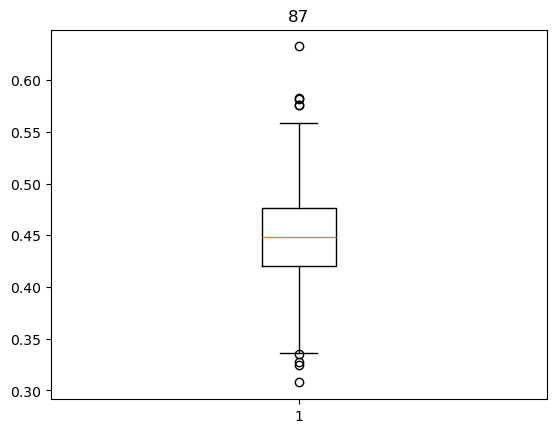

88


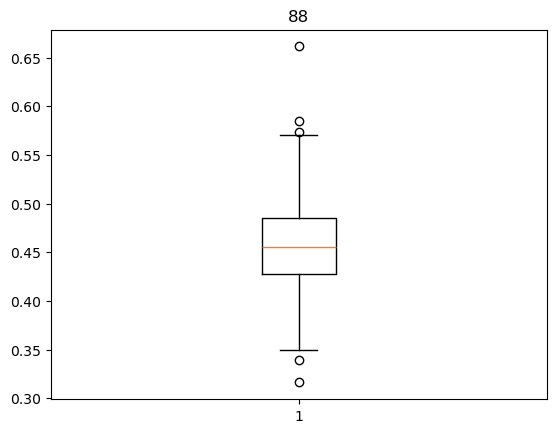

89


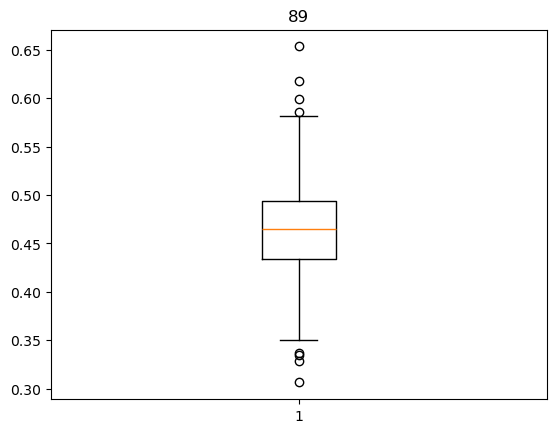

90


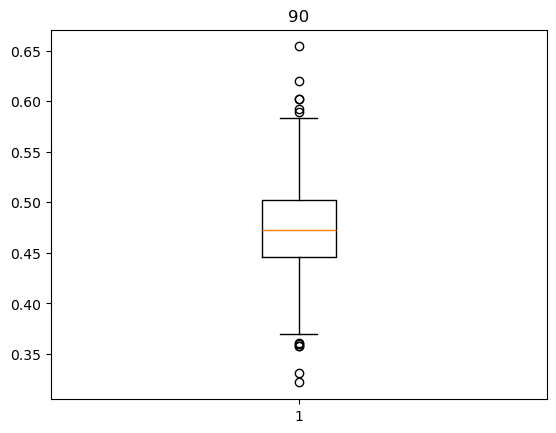

91


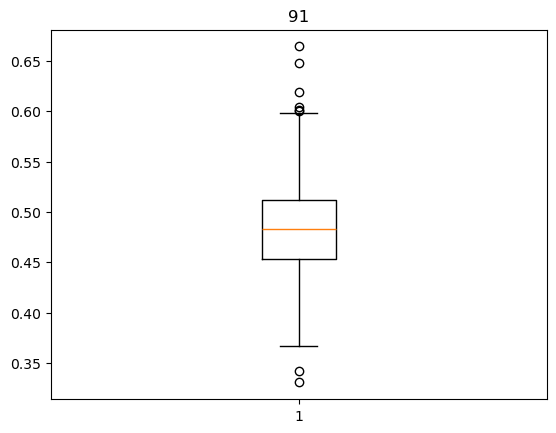

92


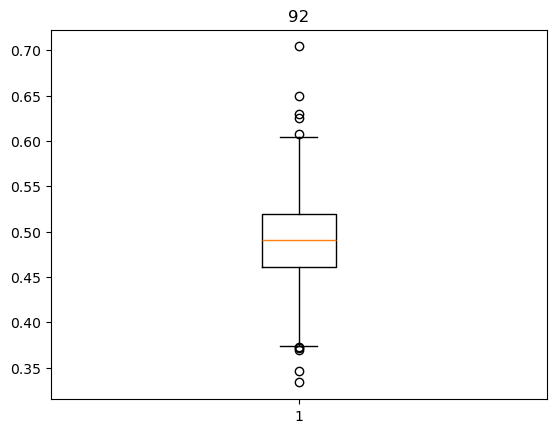

93


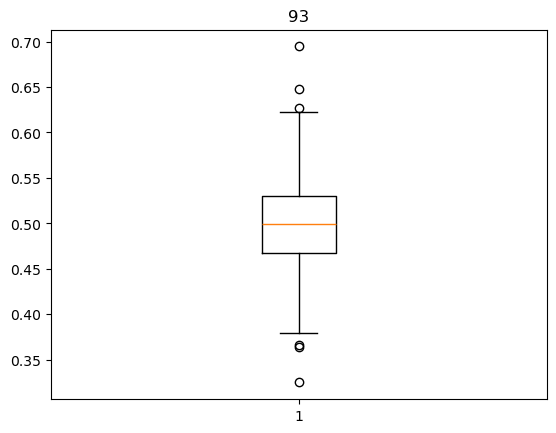

94


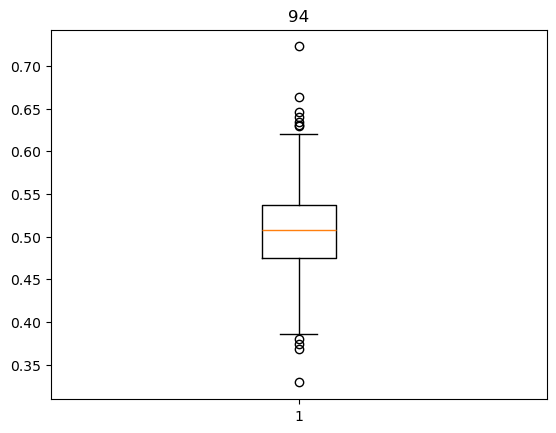

95


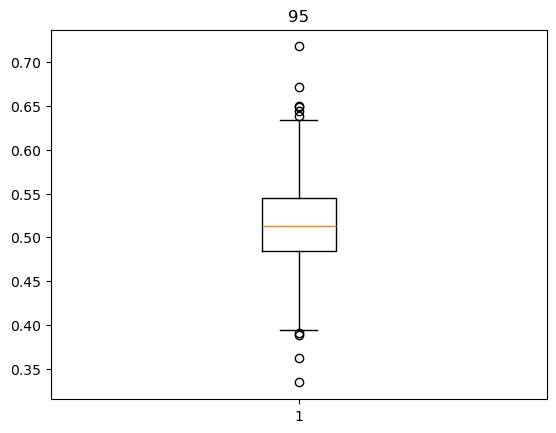

96


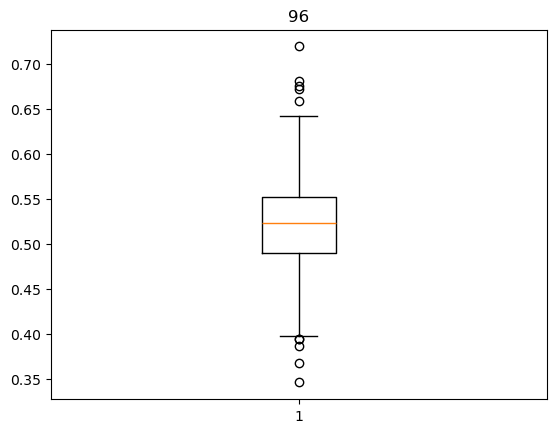

97


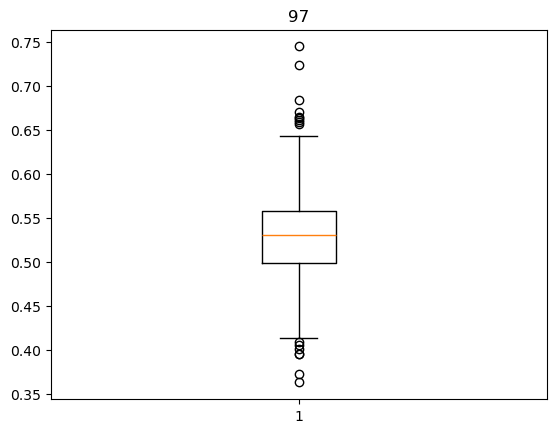

98


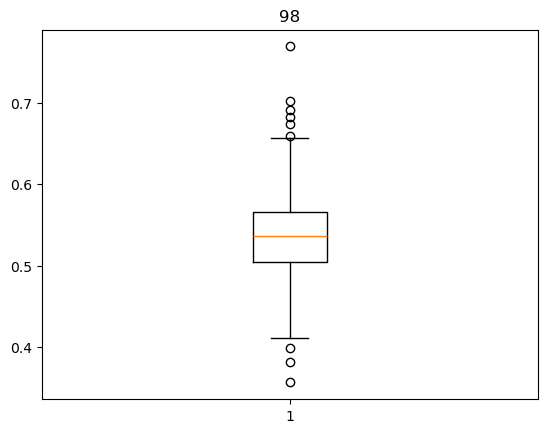

99


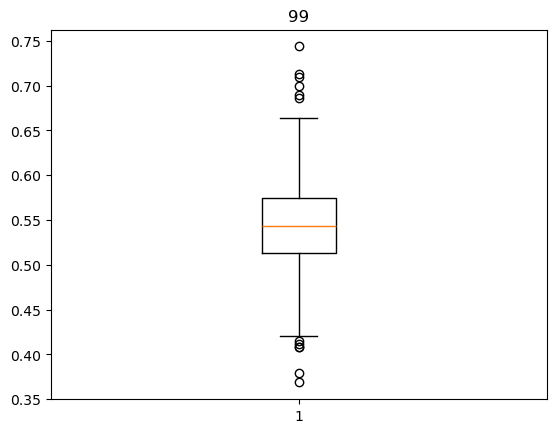

100


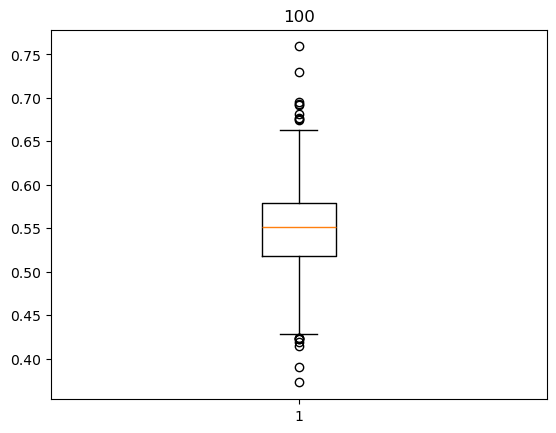

101


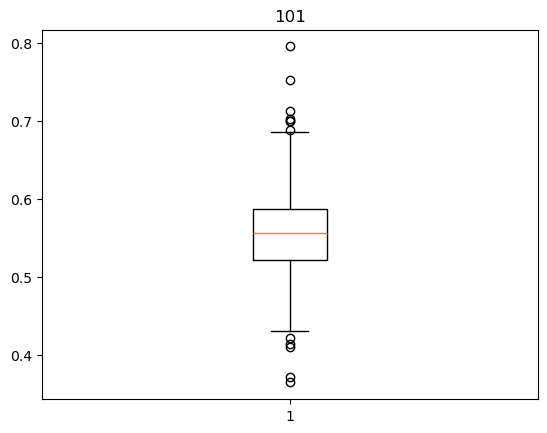

102


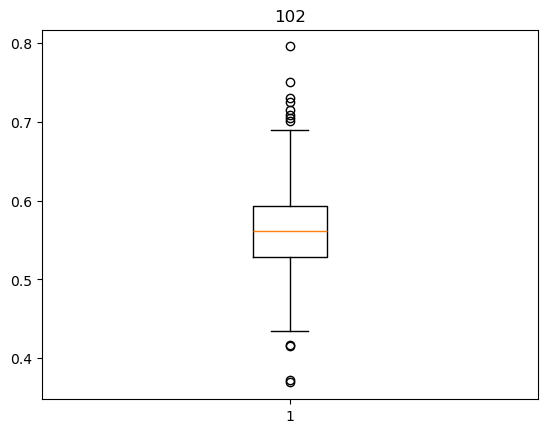

103


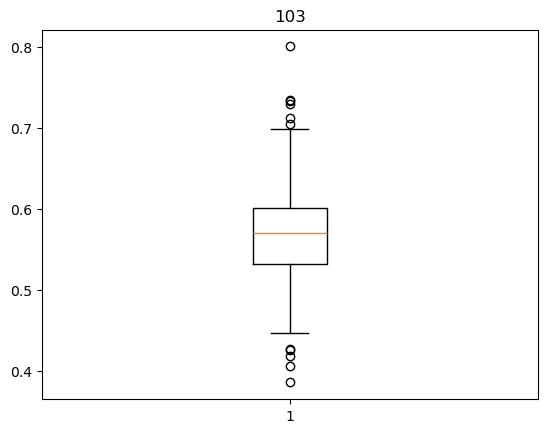

104


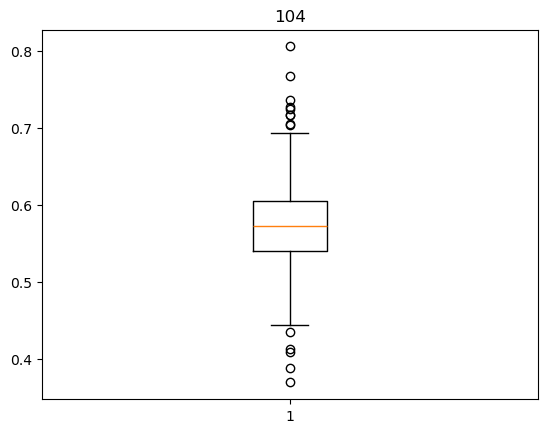

105


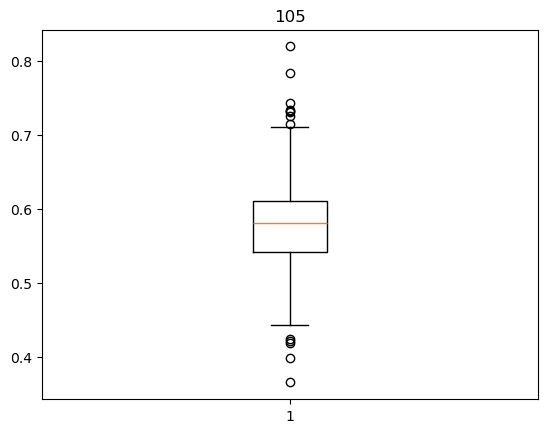

106


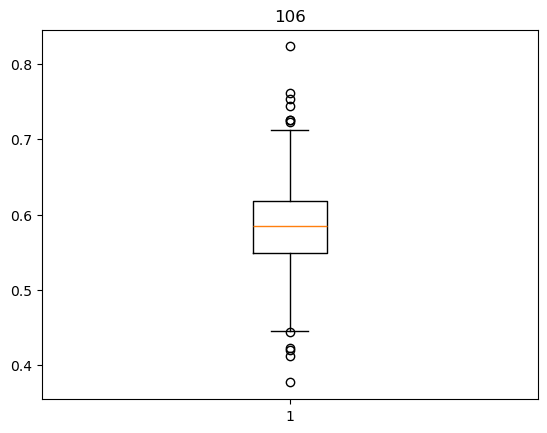

107


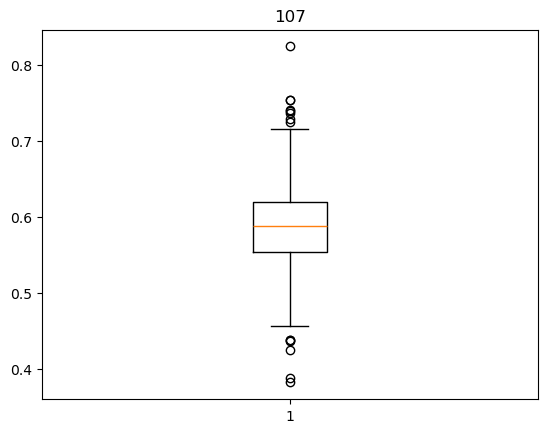

108


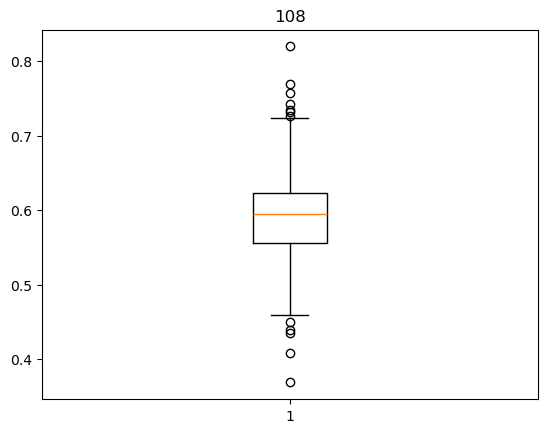

109


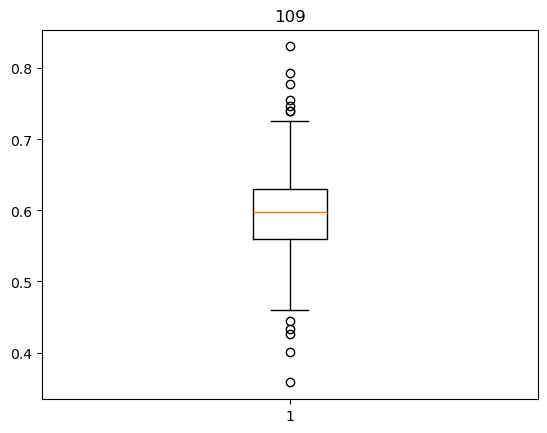

110


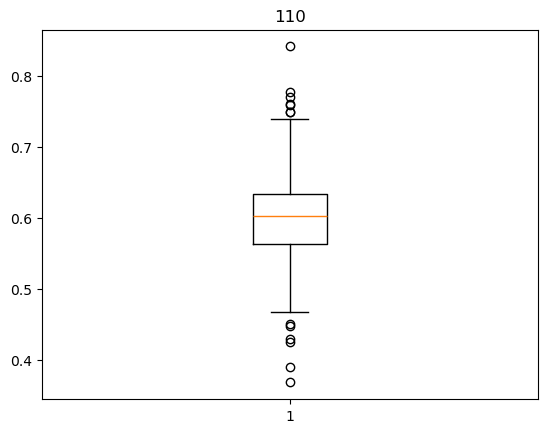

111


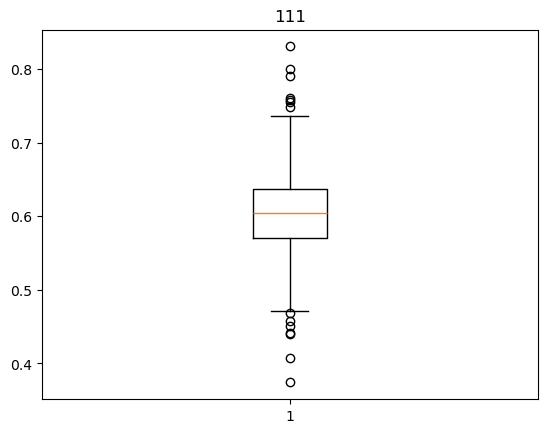

112


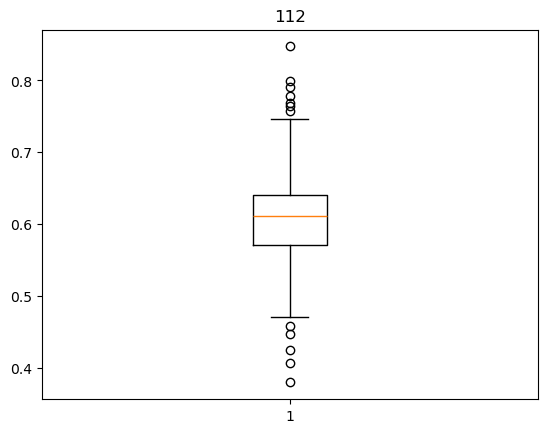

113


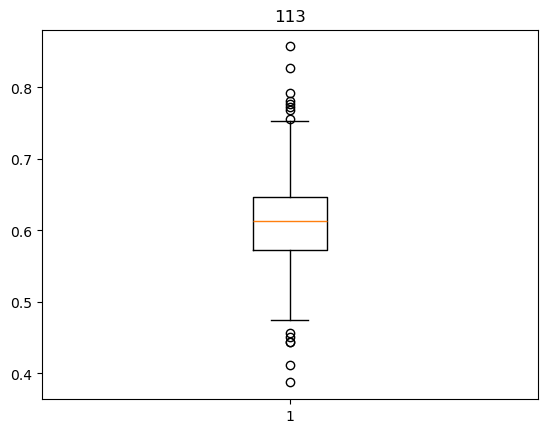

114


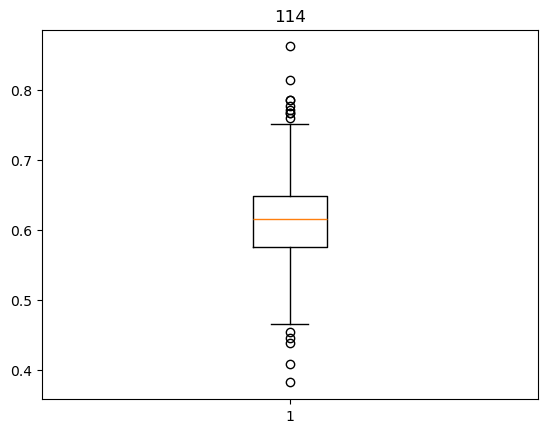

115


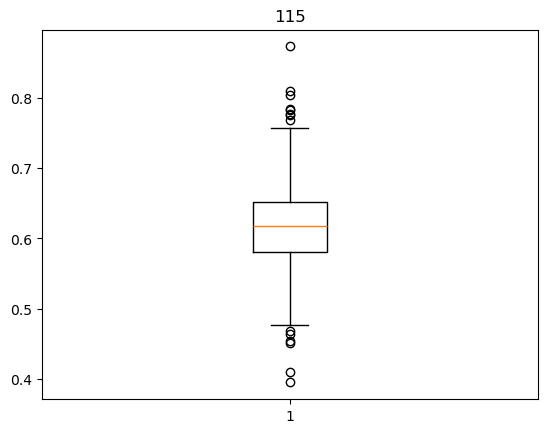

116


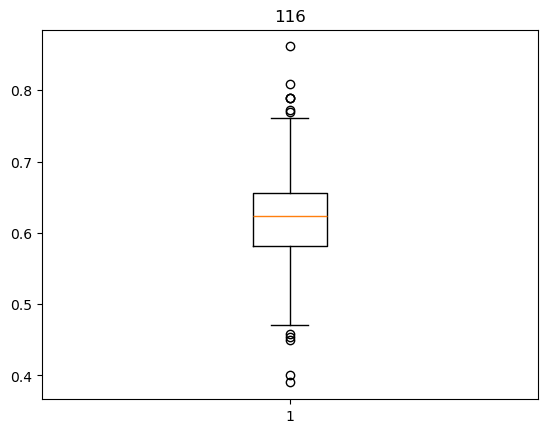

117


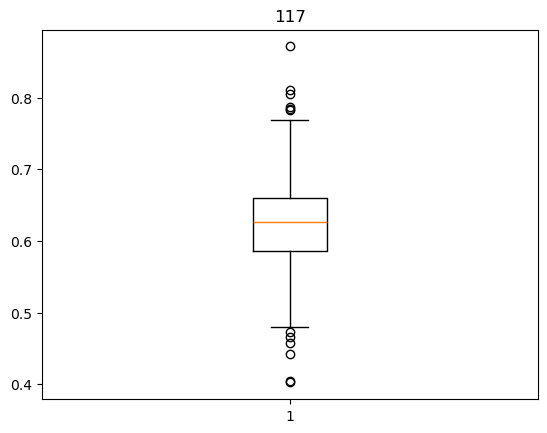

118


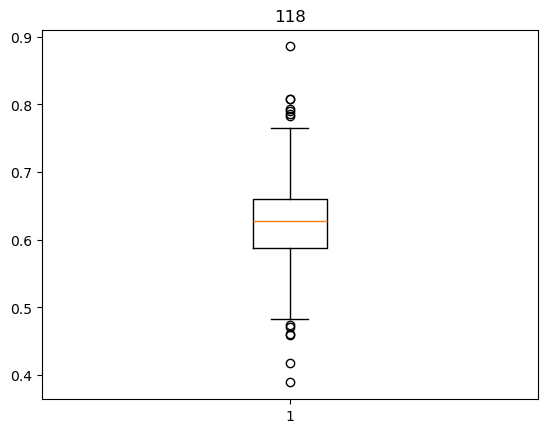

119


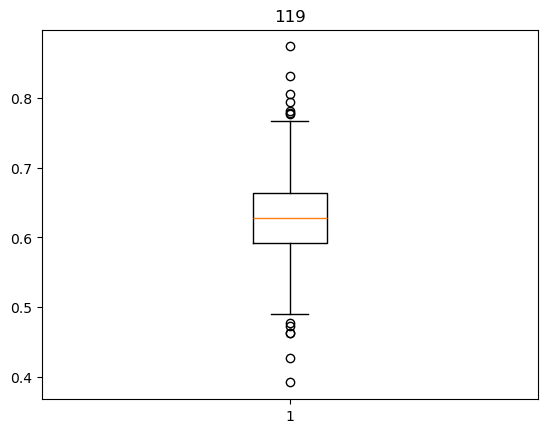

120


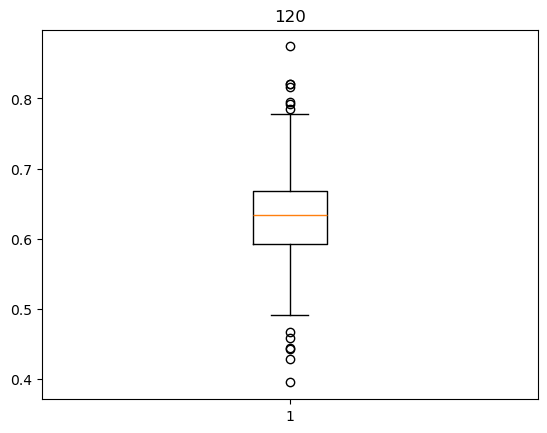

121


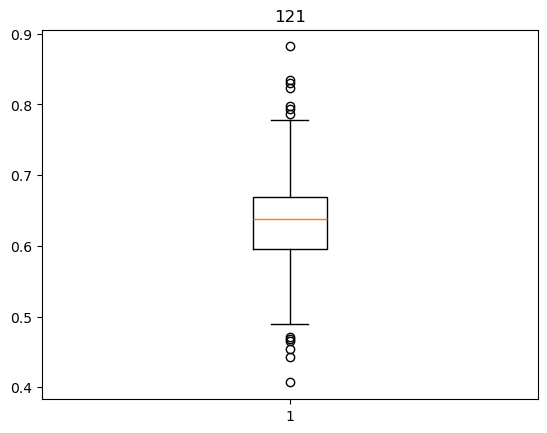

122


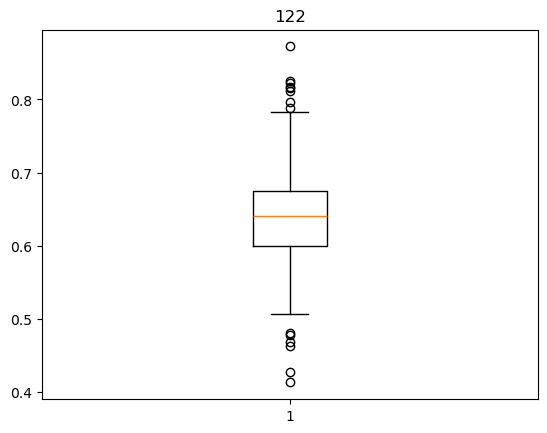

123


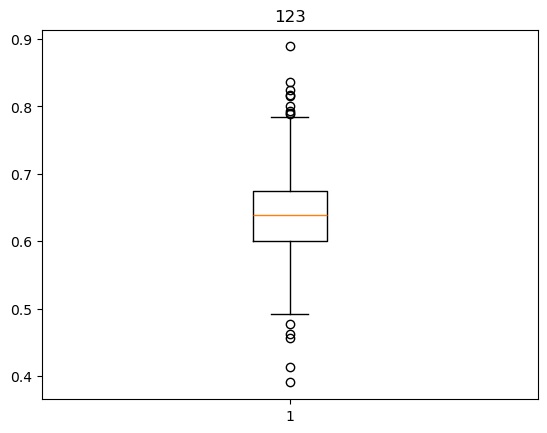

124


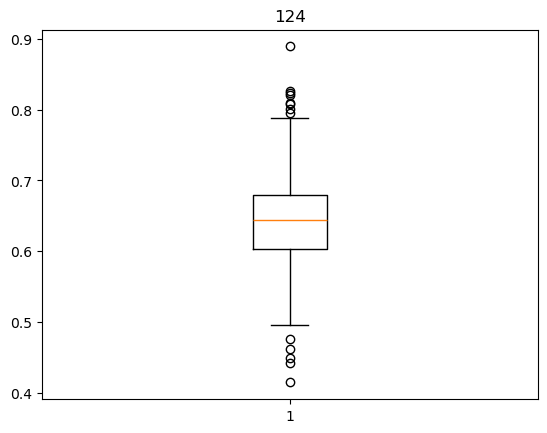

125


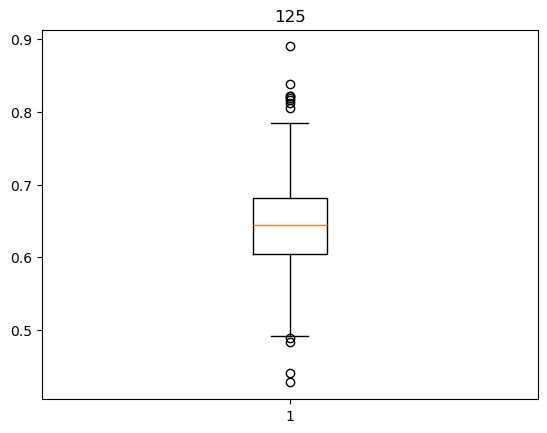

126


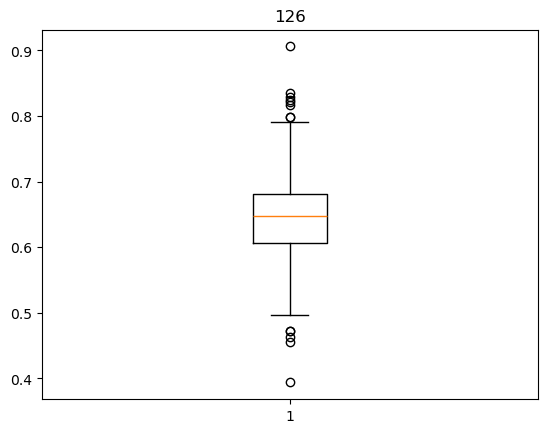

127


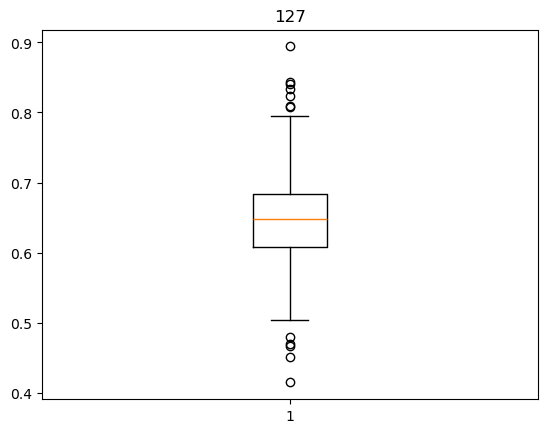

128


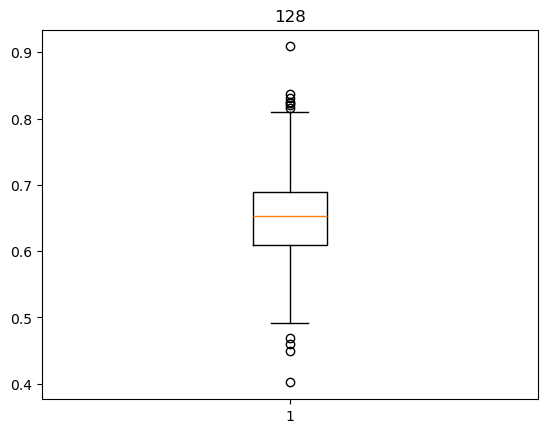

129


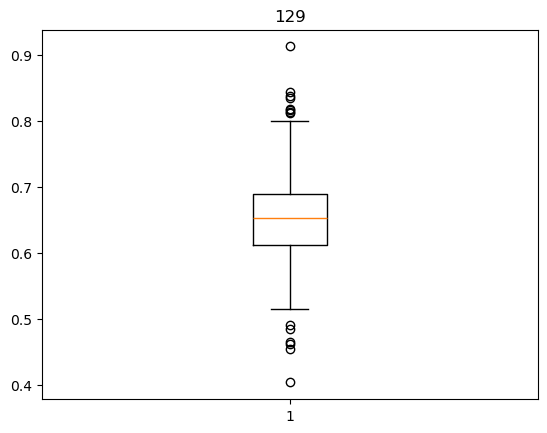

130


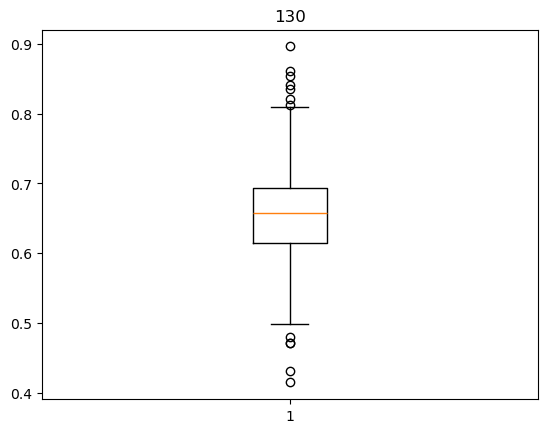

131


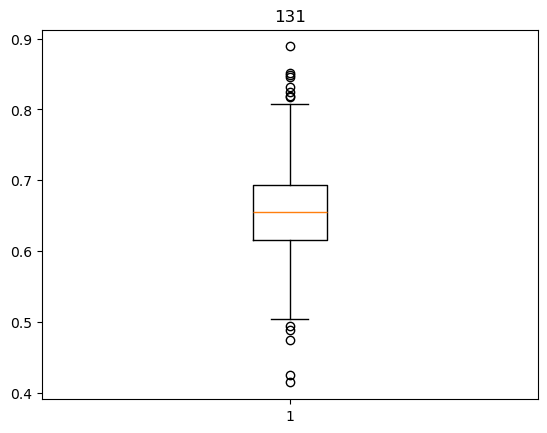

132


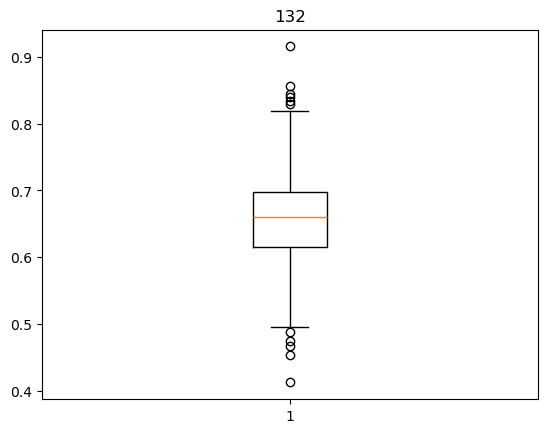

133


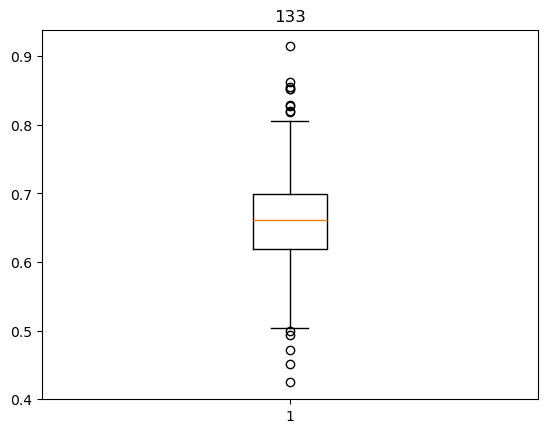

134


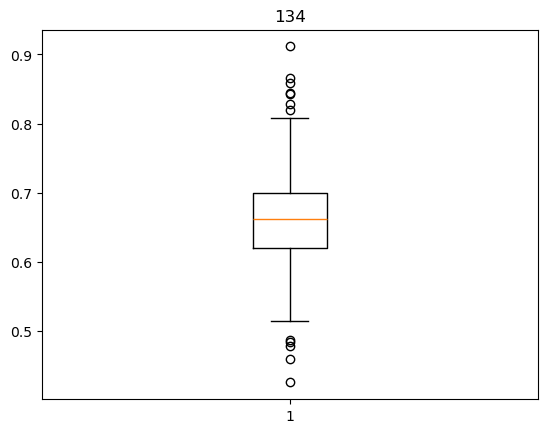

135


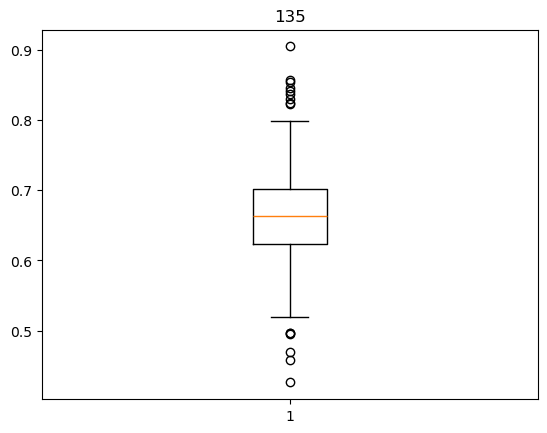

136


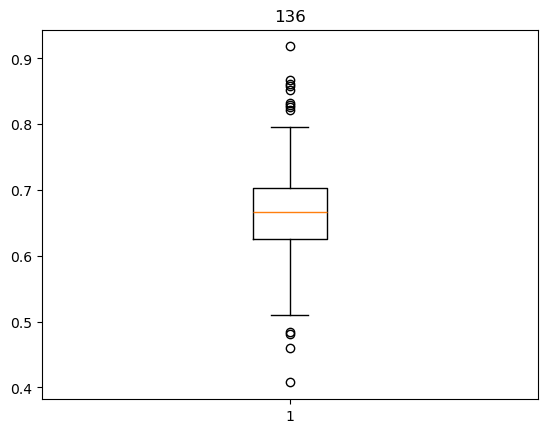

137


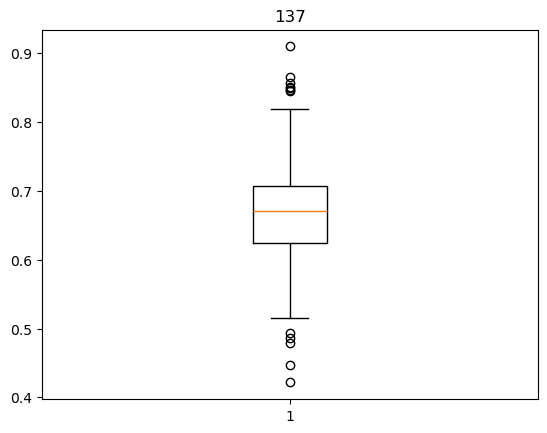

138


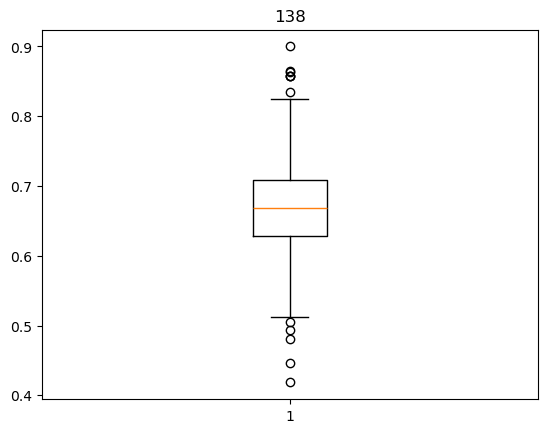

139


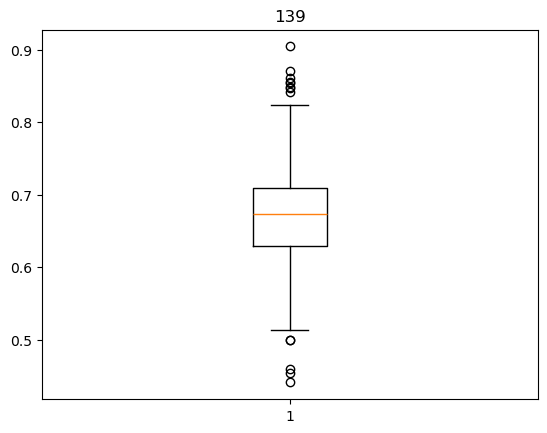

140


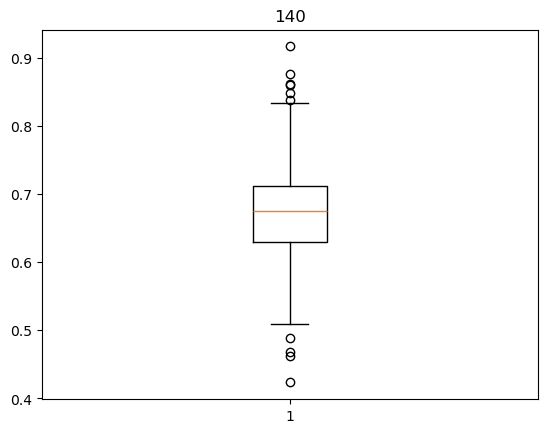

141


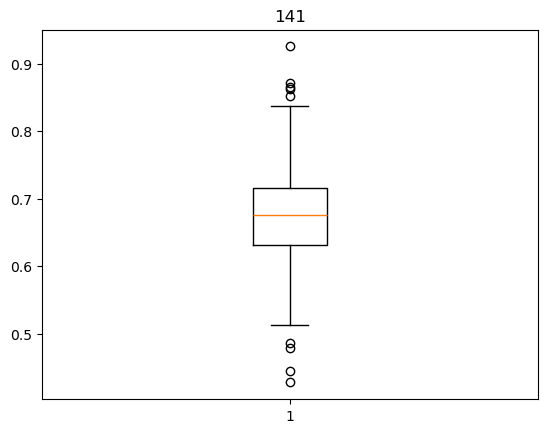

142


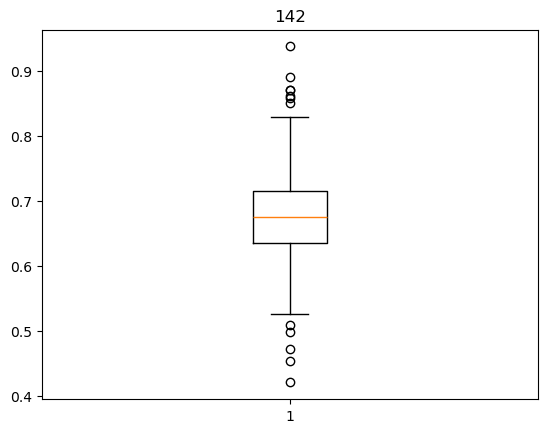

143


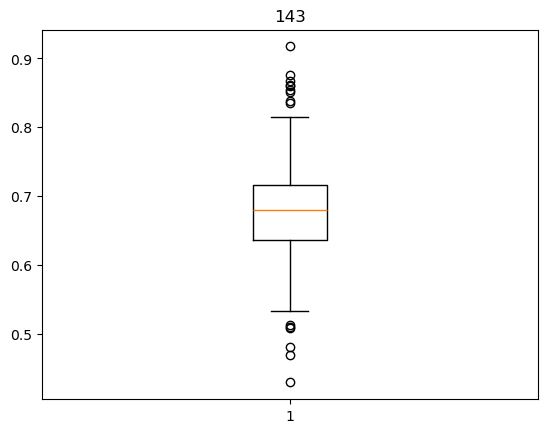

144


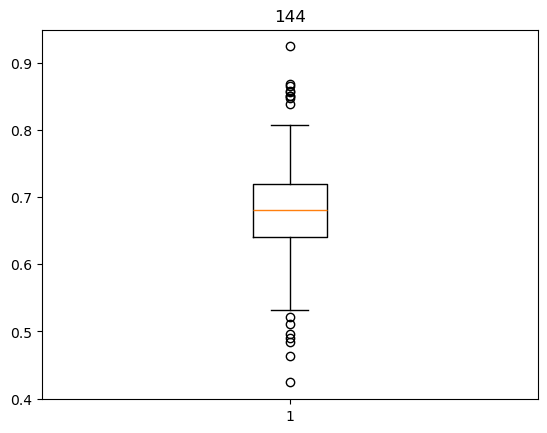

145


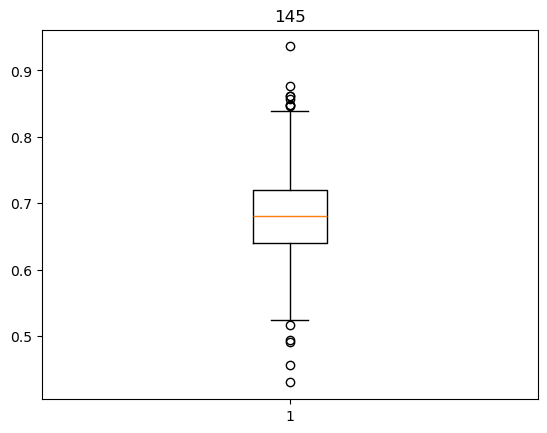

146


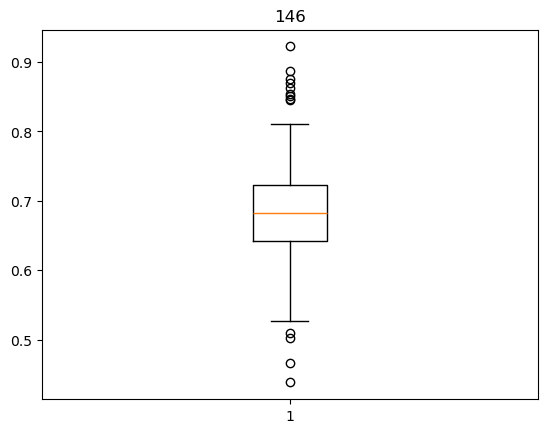

147


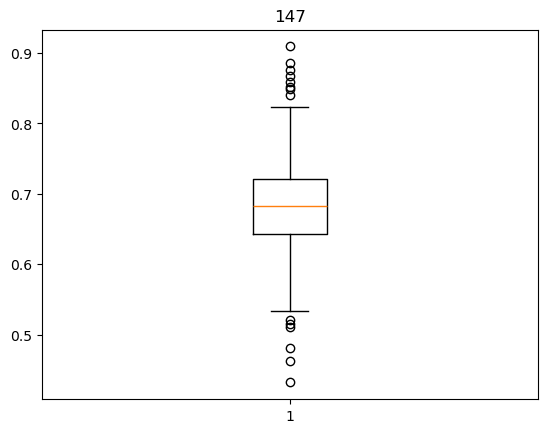

148


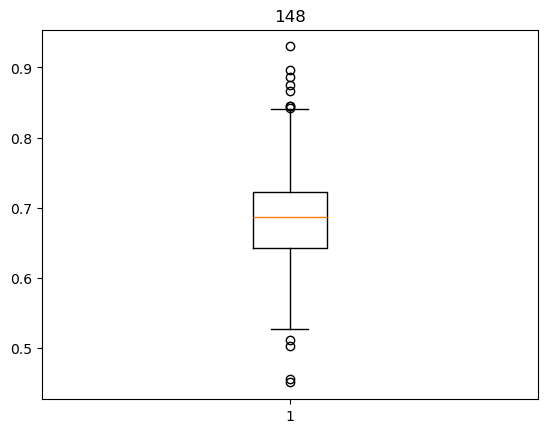

149


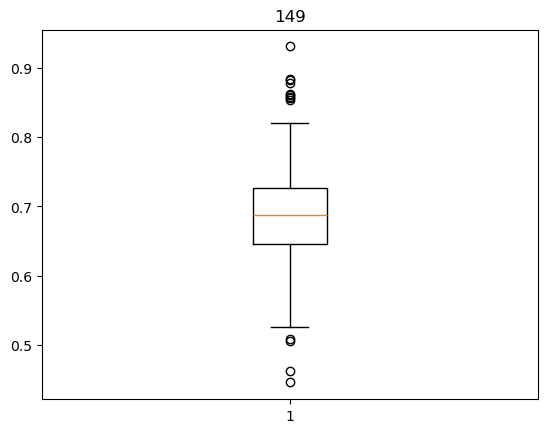

150


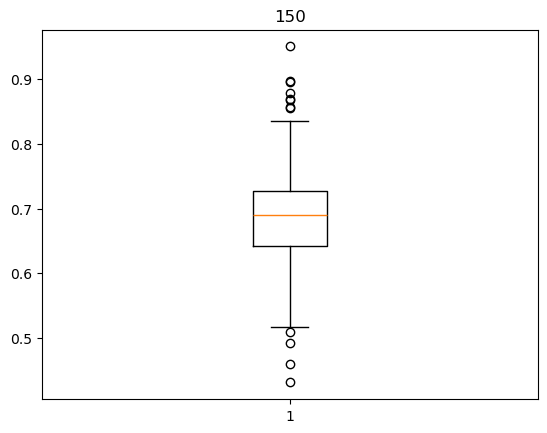

151


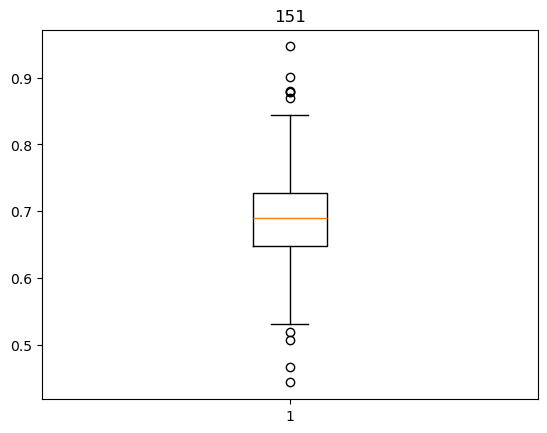

152


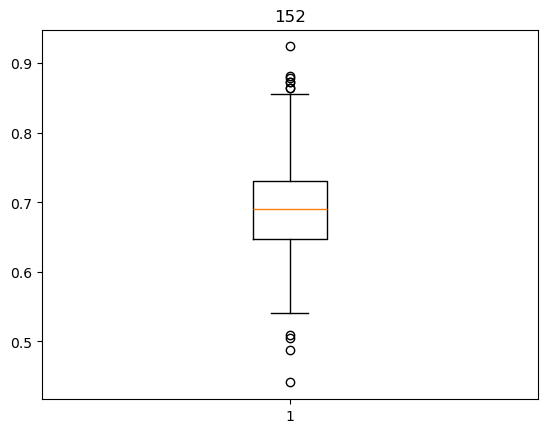

153


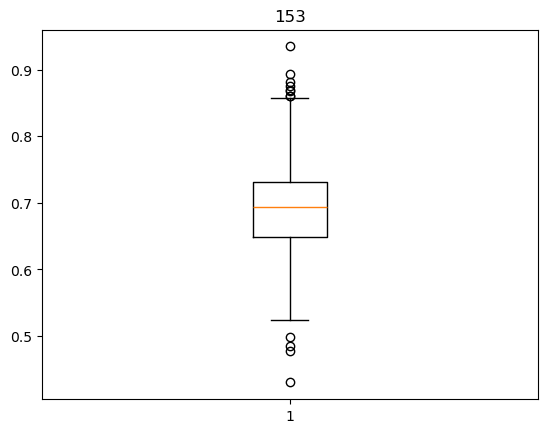

154


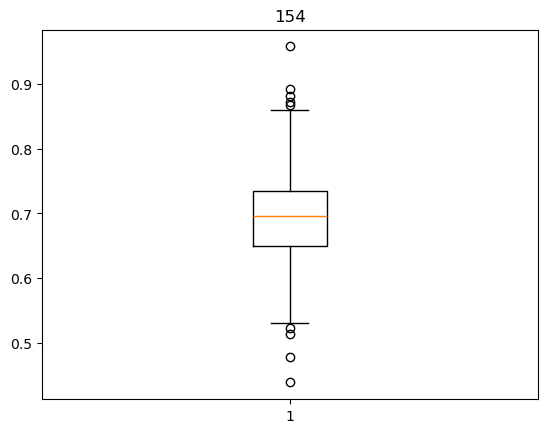

155


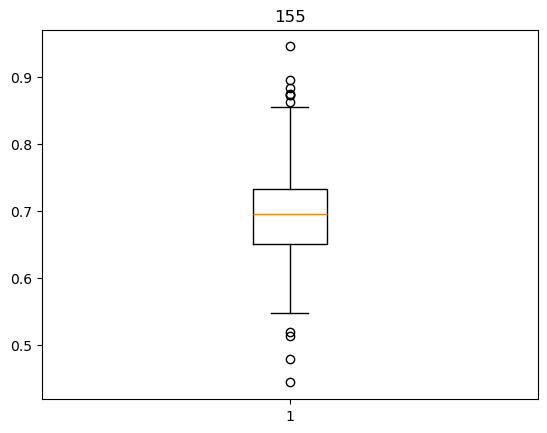

156


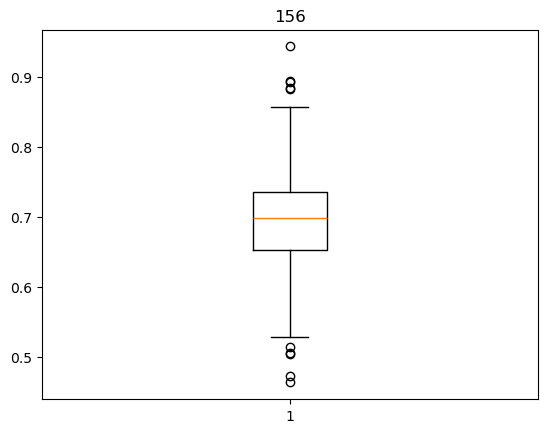

157


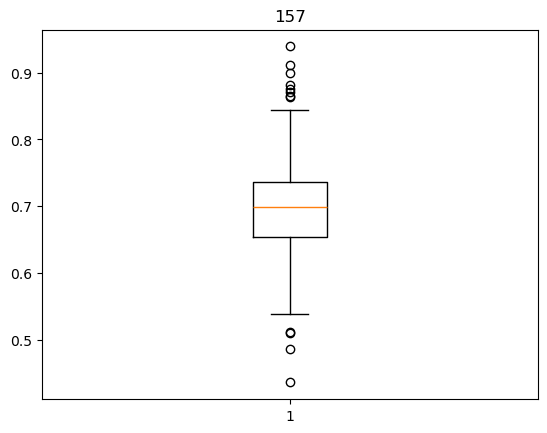

158


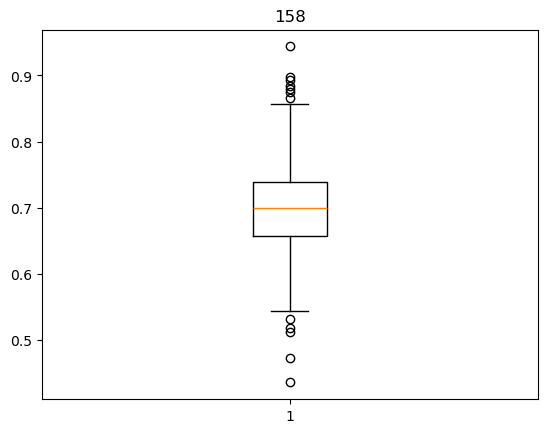

159


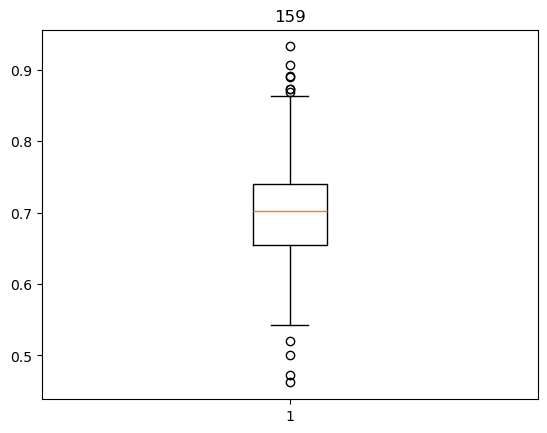

160


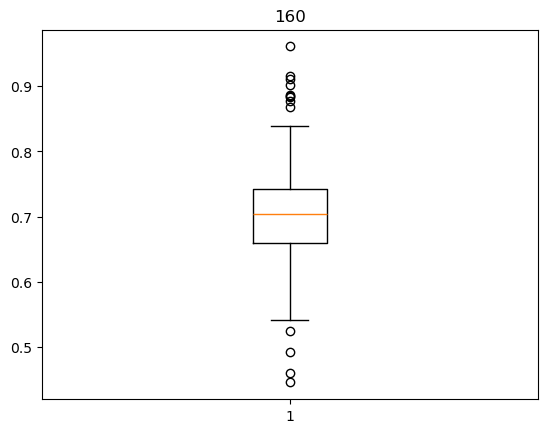

161


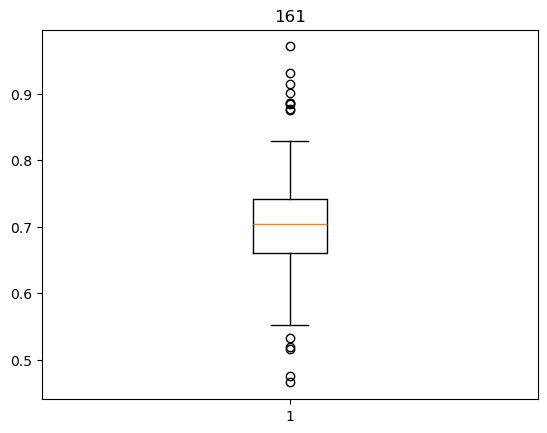

162


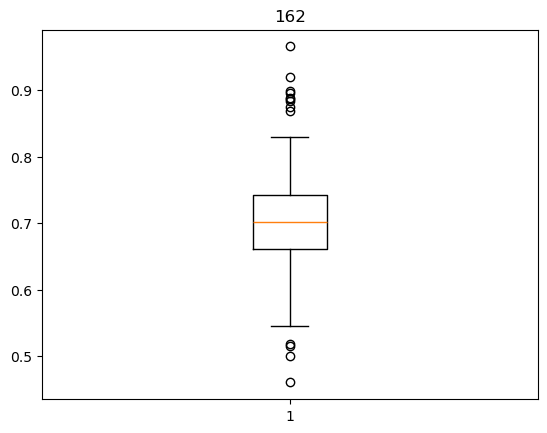

163


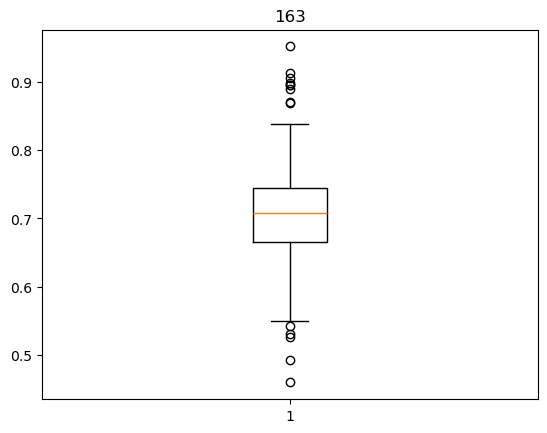

164


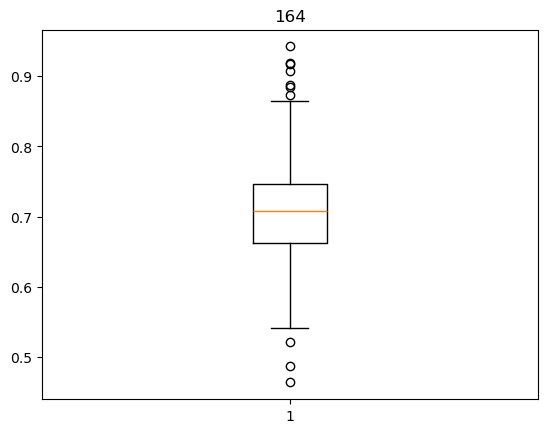

165


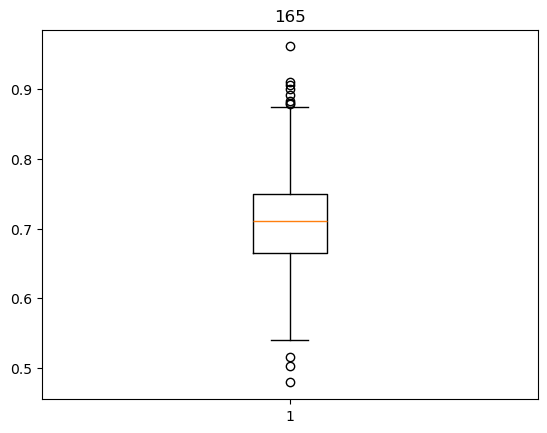

166


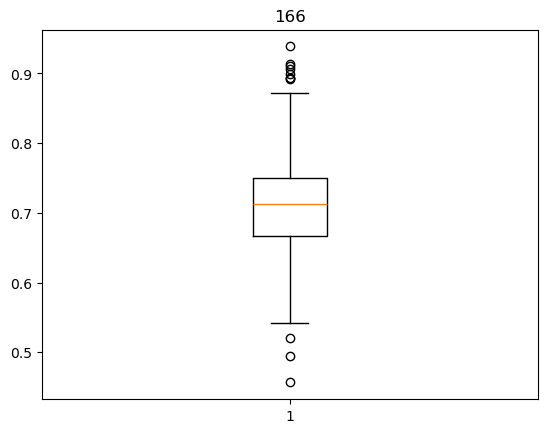

167


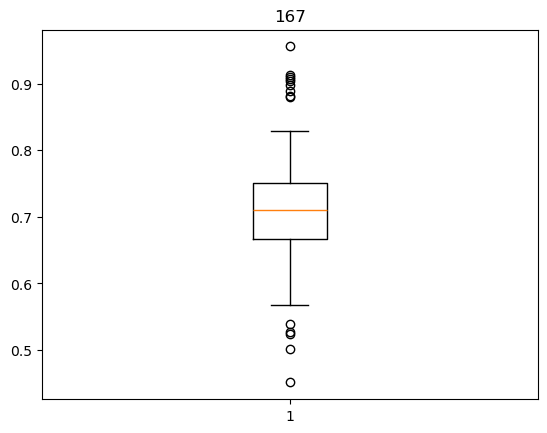

168


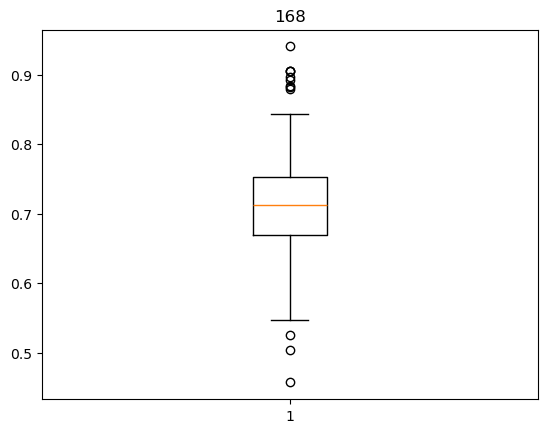

169


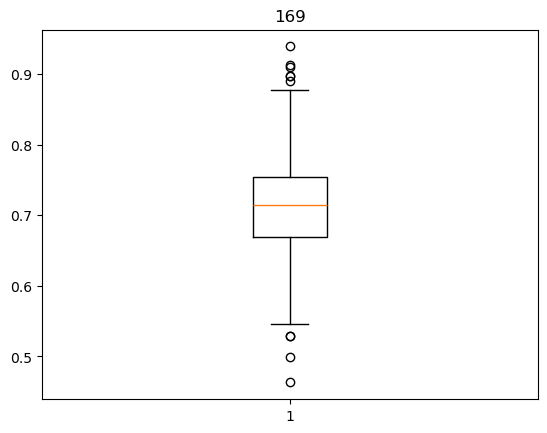

170


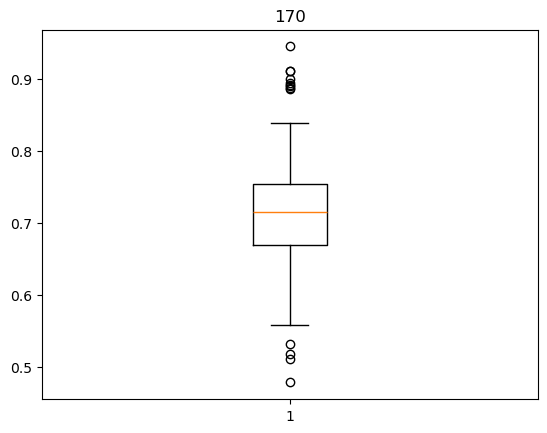

171


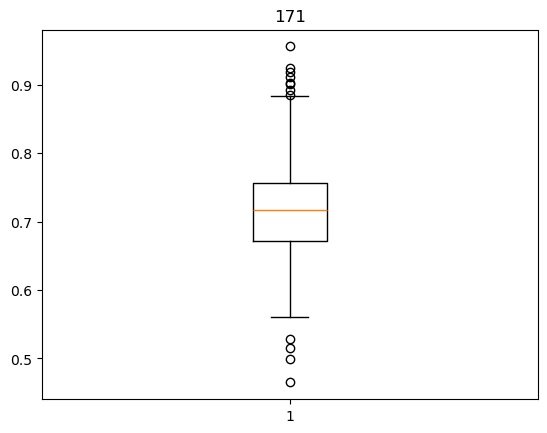

172


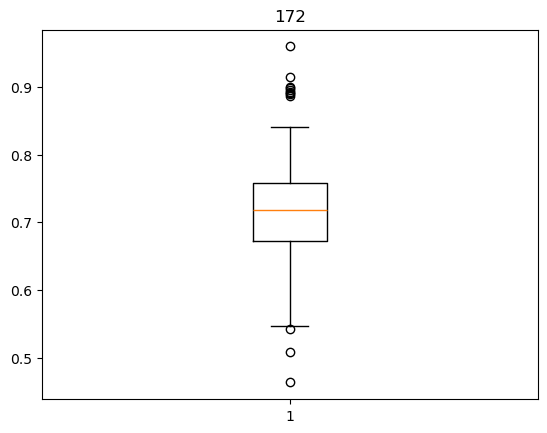

173


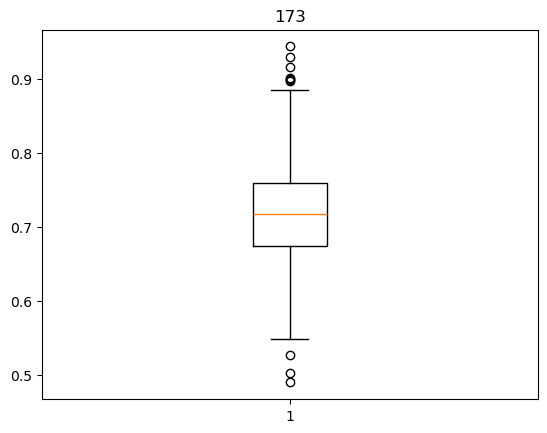

174


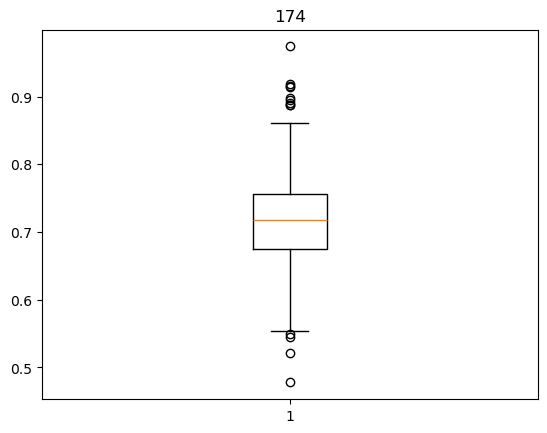

175


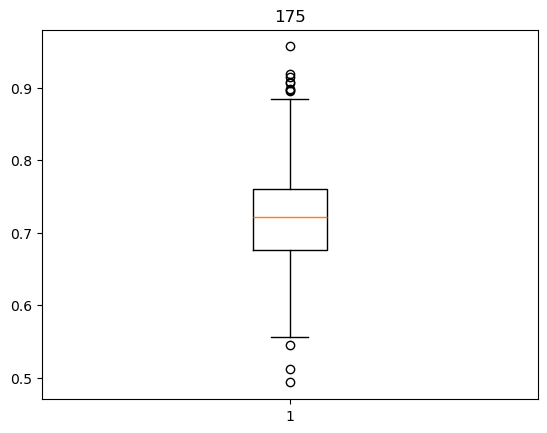

176


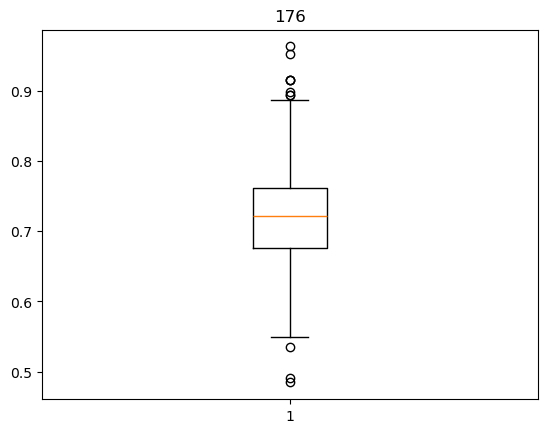

177


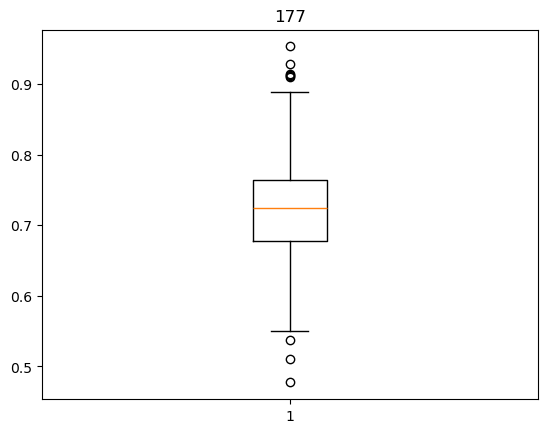

178


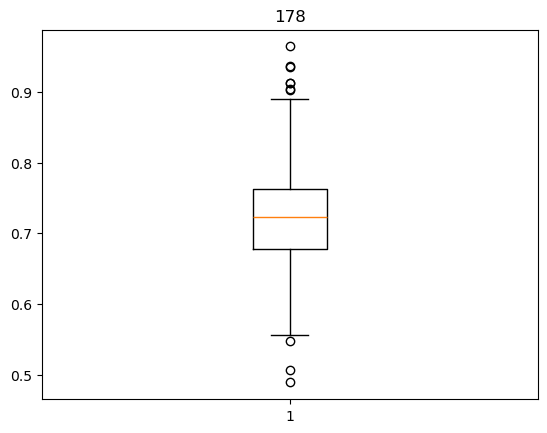

179


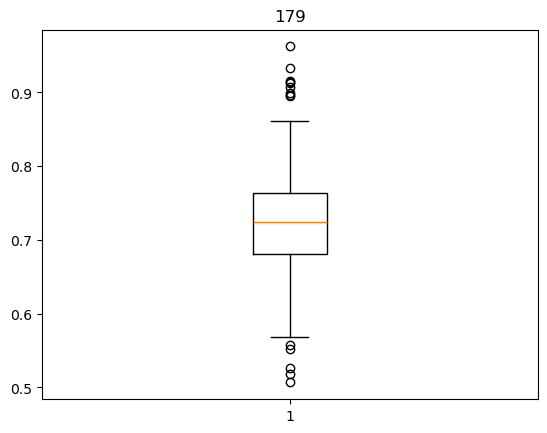

180


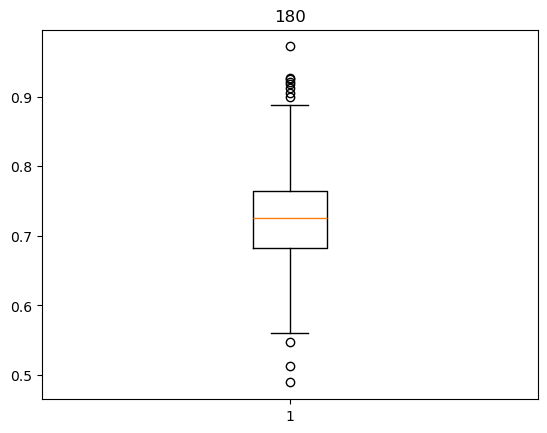

181


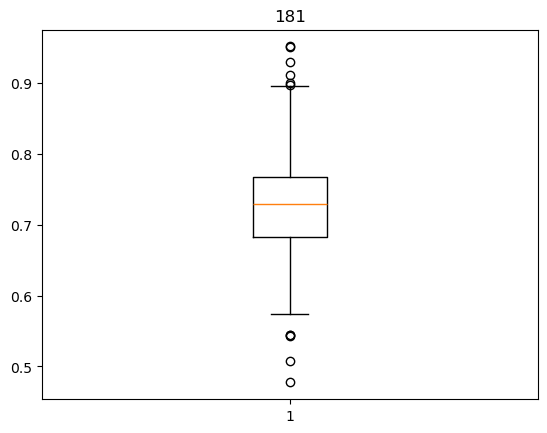

182


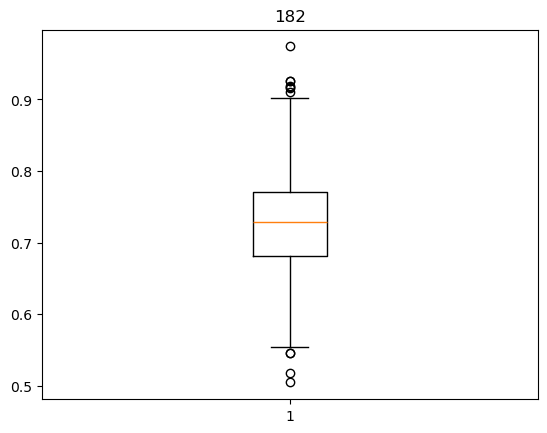

183


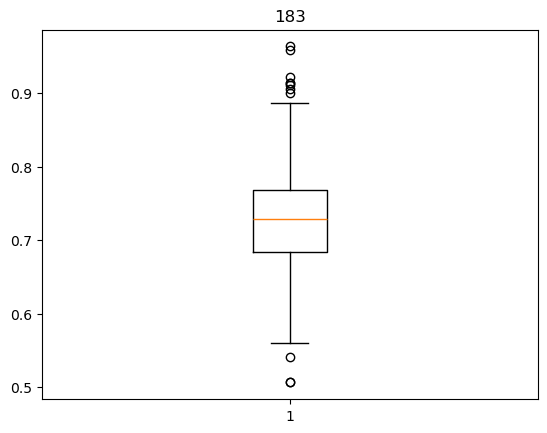

184


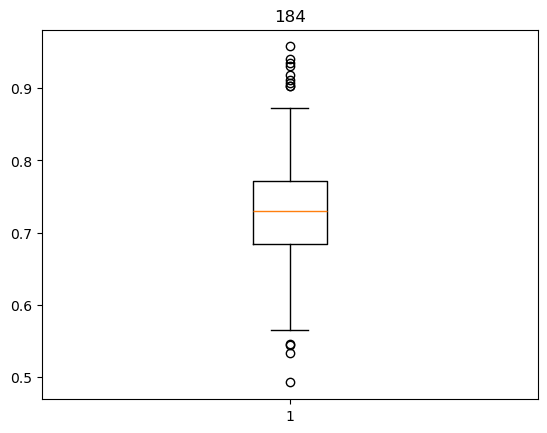

185


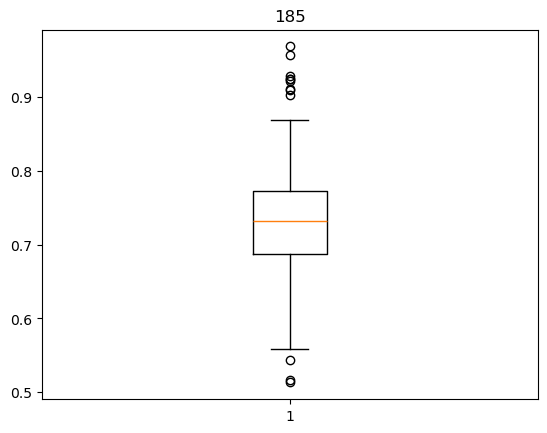

186


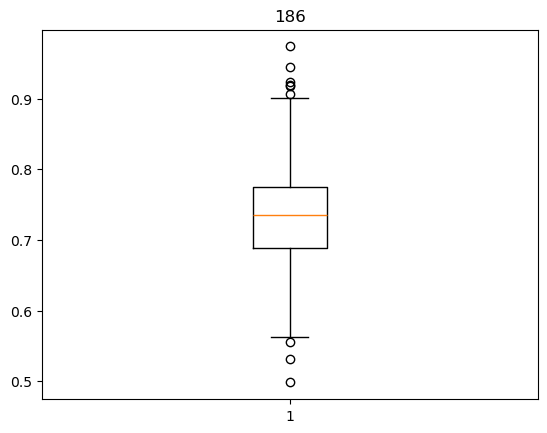

187


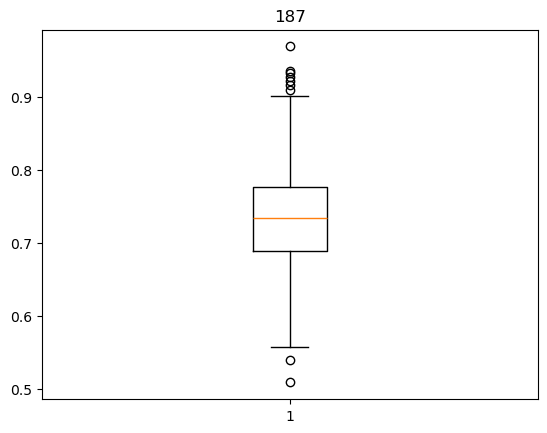

188


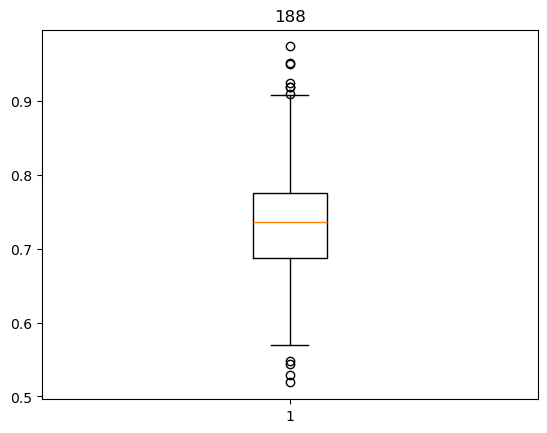

189


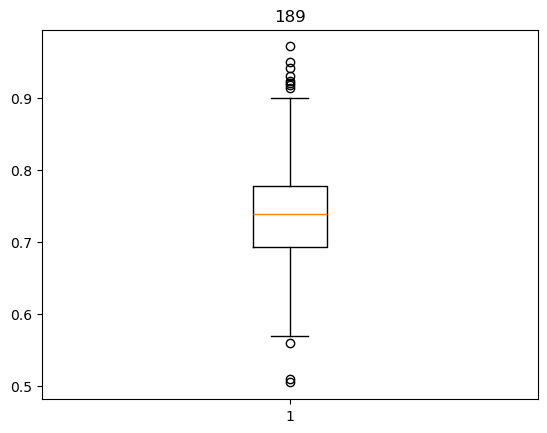

190


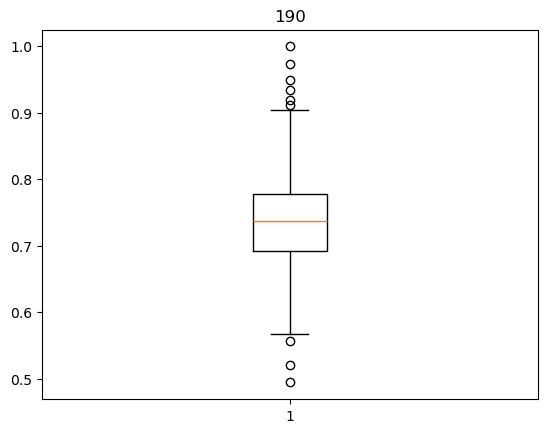

191


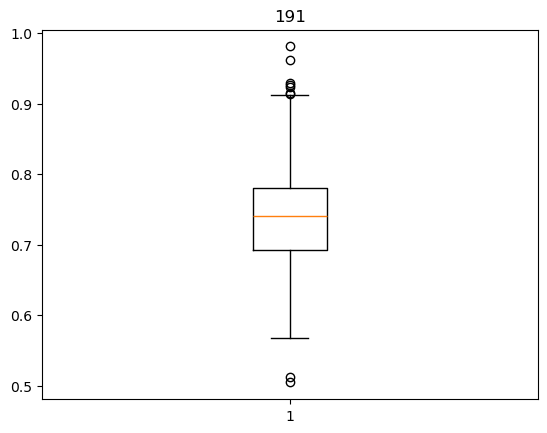

192


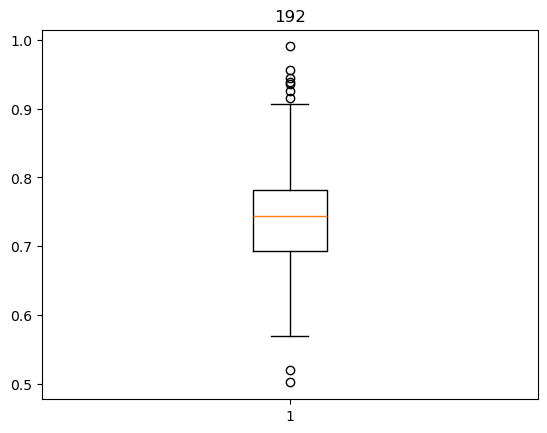

193


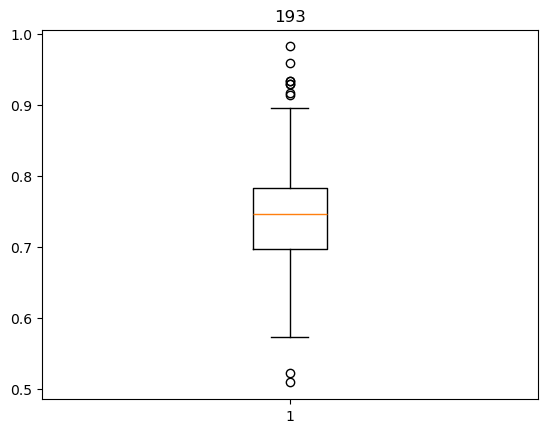

194


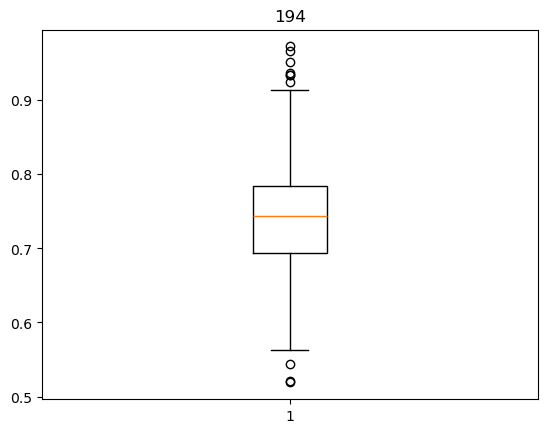

195


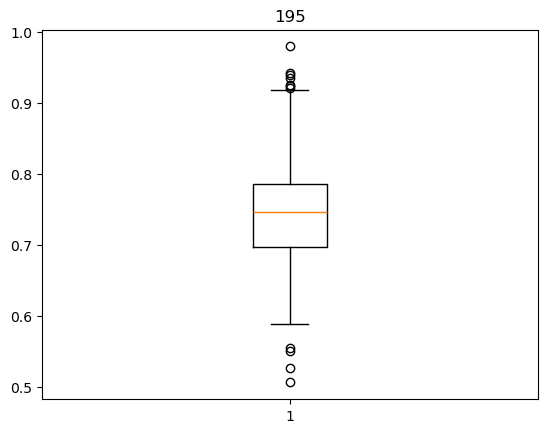

196


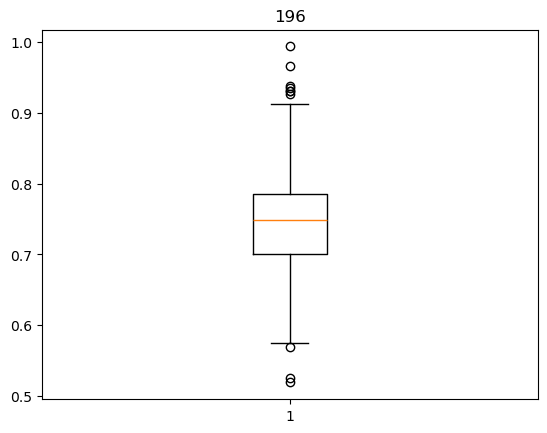

197


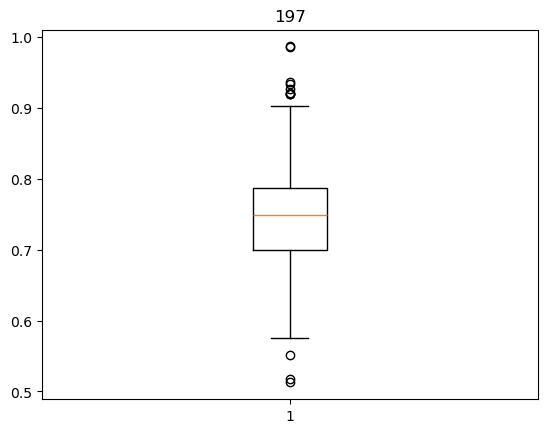

198


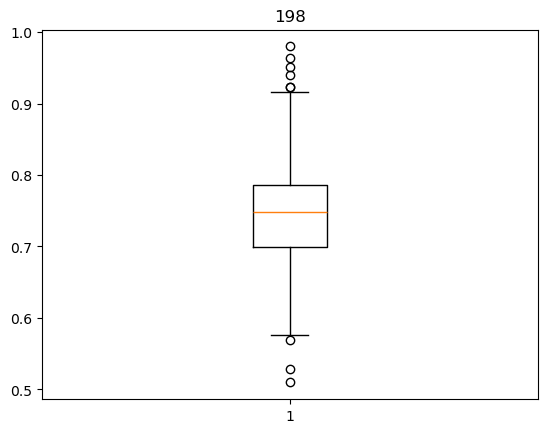

199


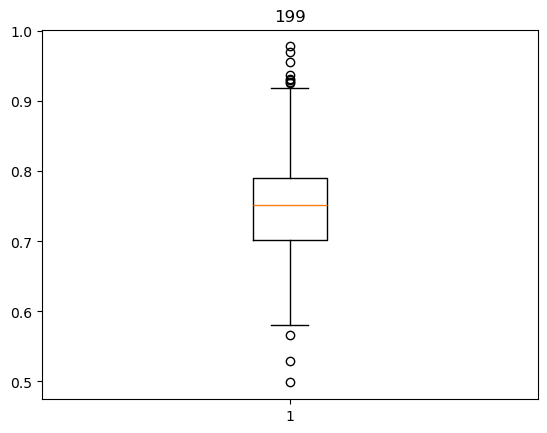

200


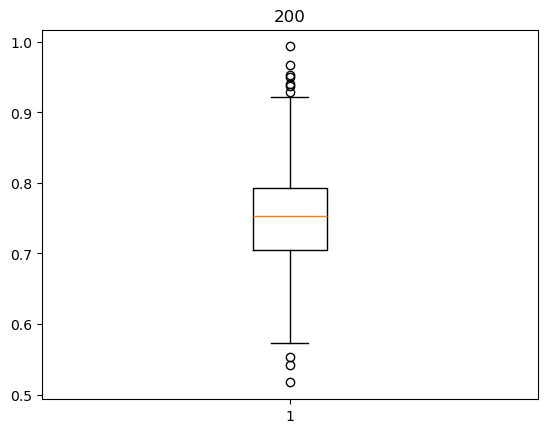

201


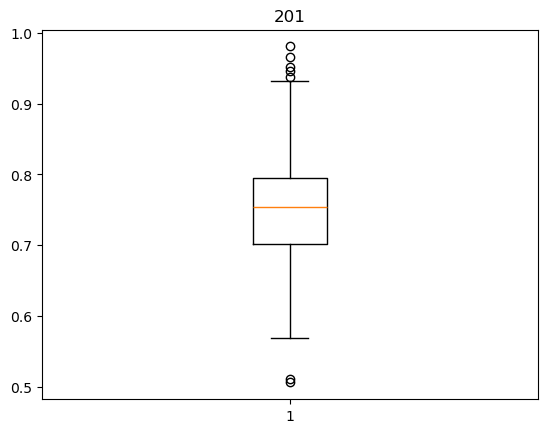

202


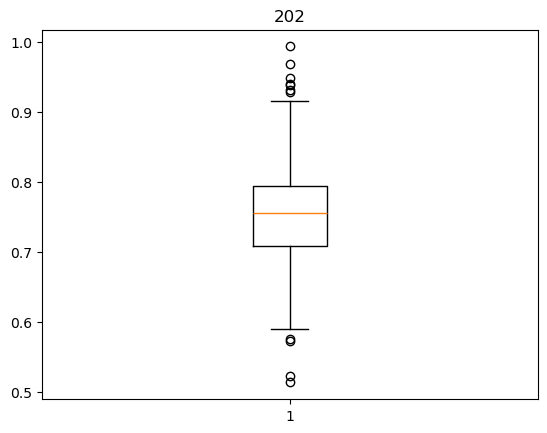

203


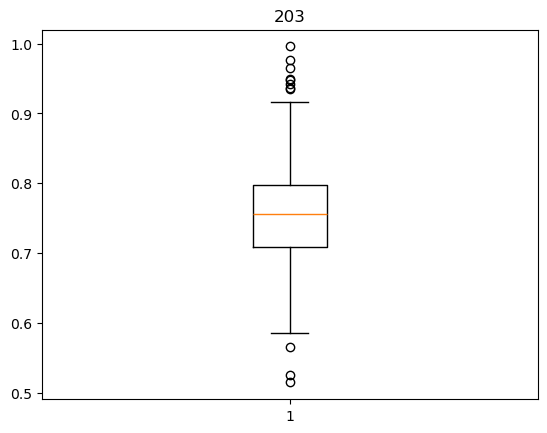

204


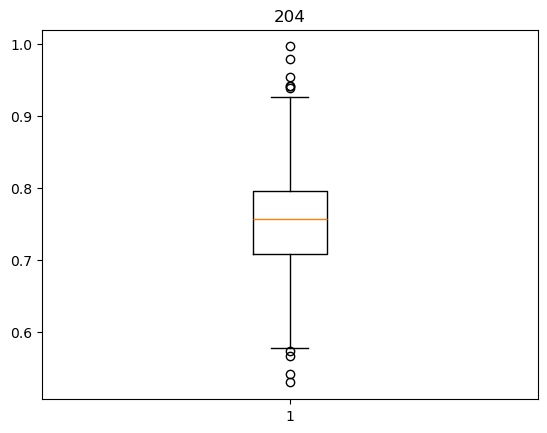

205


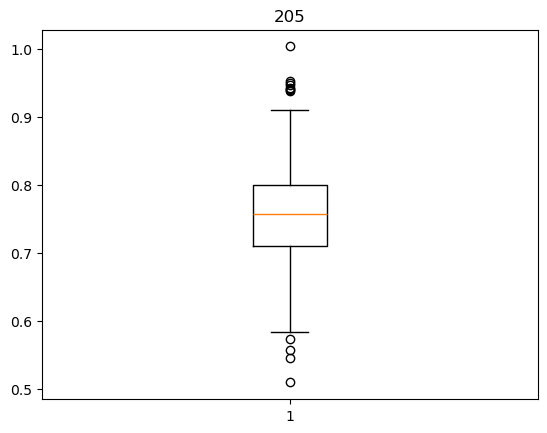

206


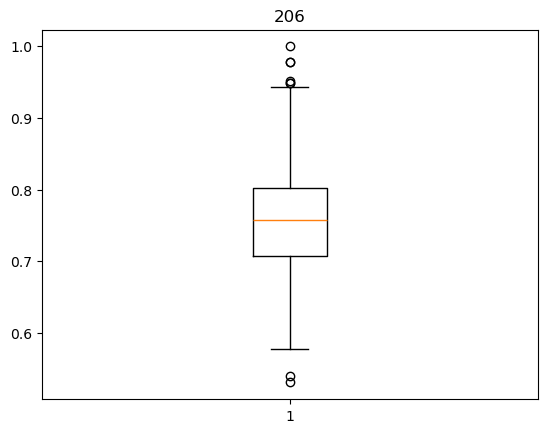

207


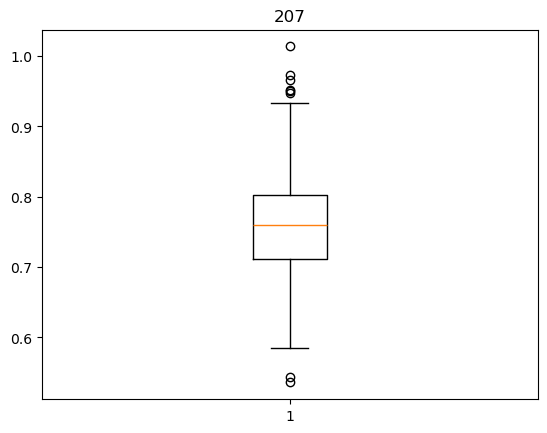

208


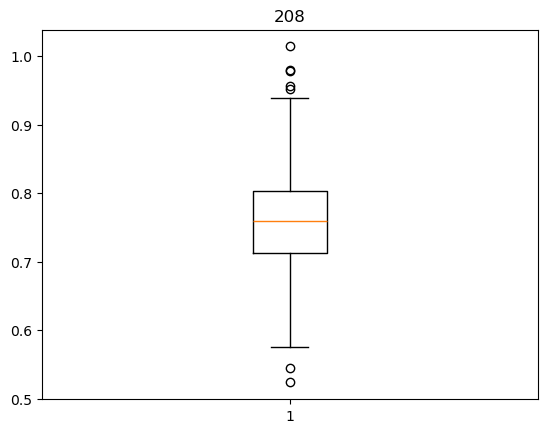

209


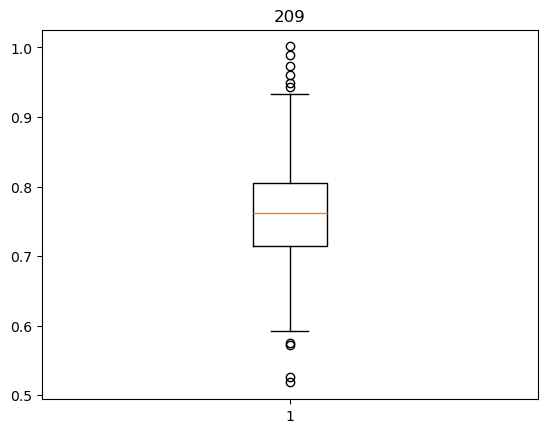

210


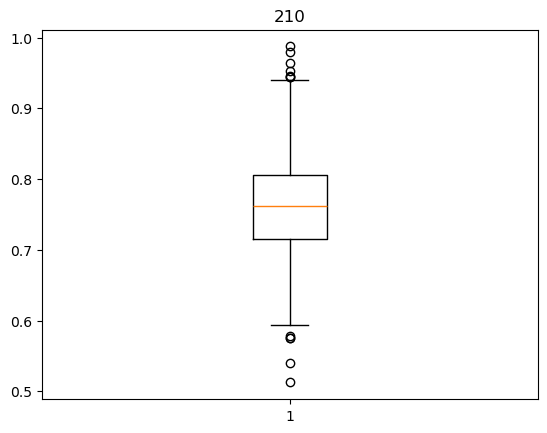

211


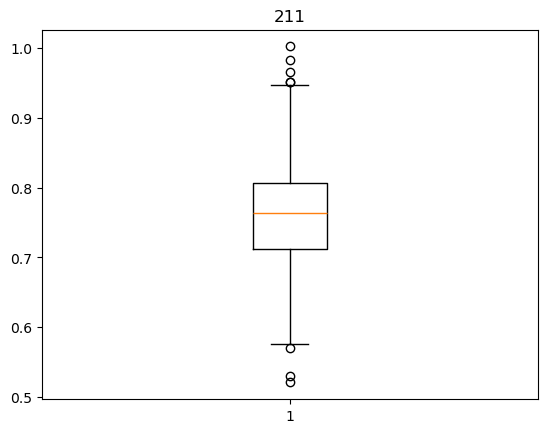

212


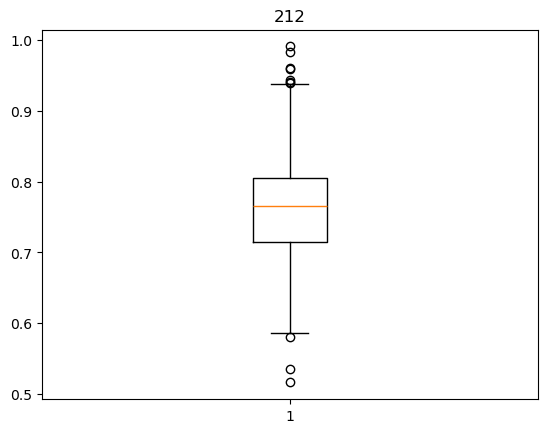

213


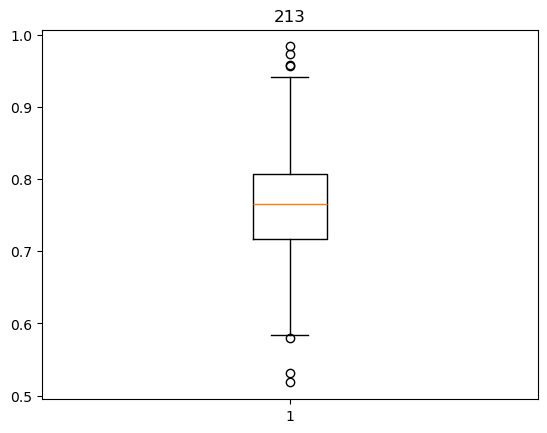

214


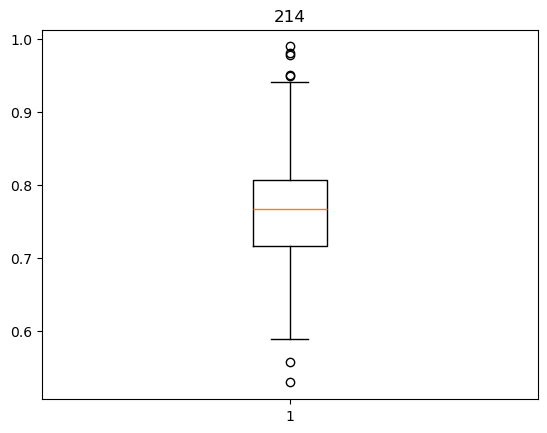

215


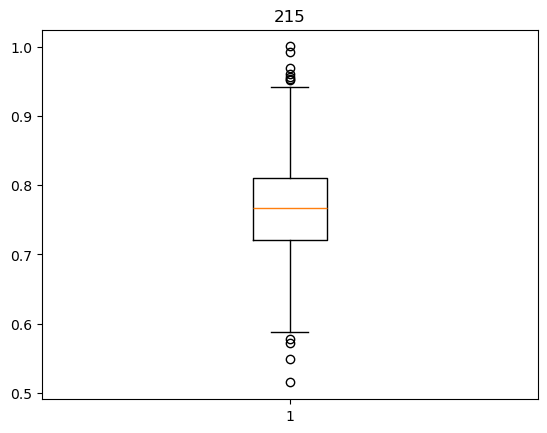

216


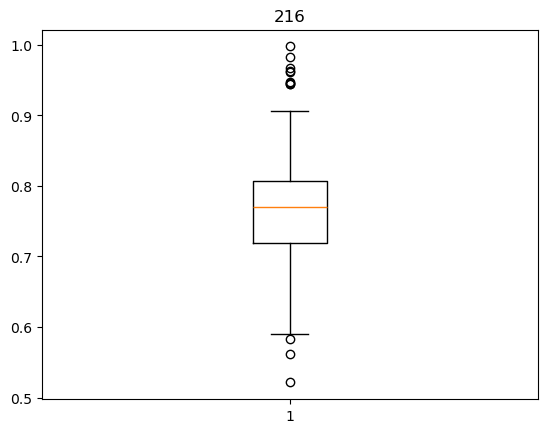

217


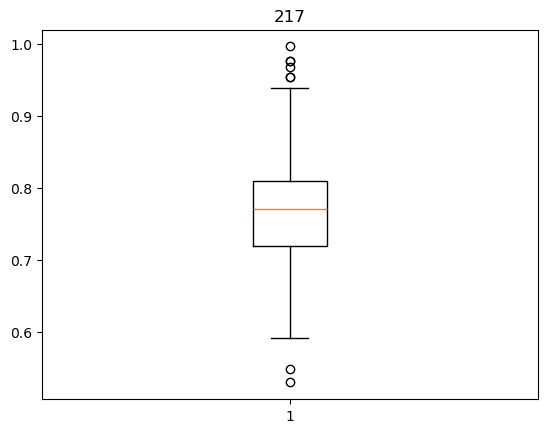

218


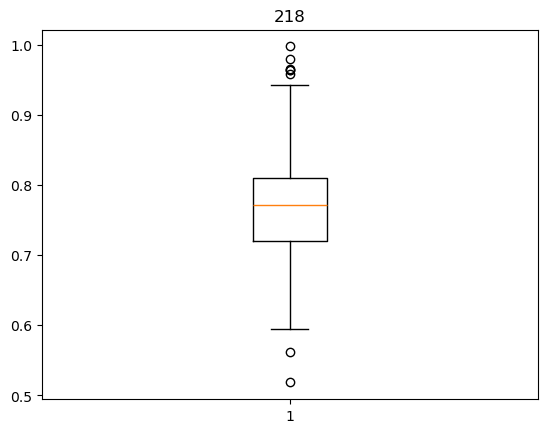

219


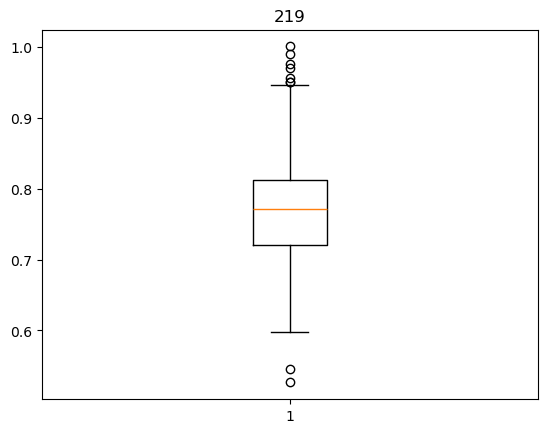

220


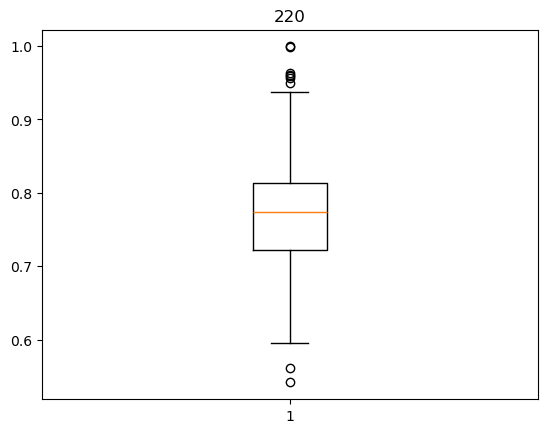

221


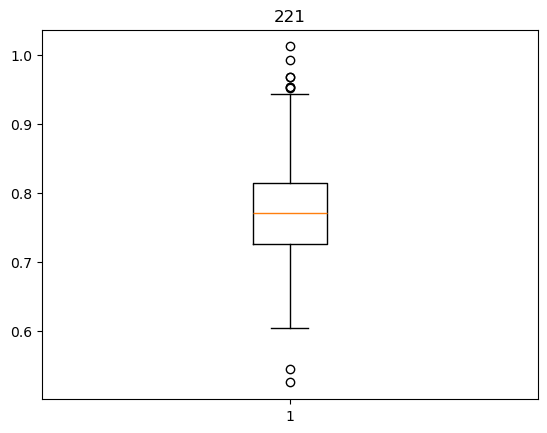

222


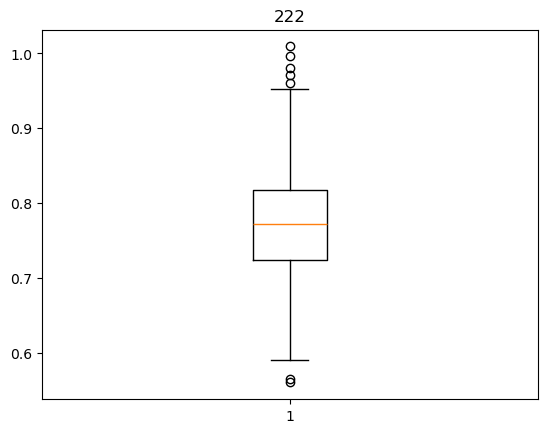

223


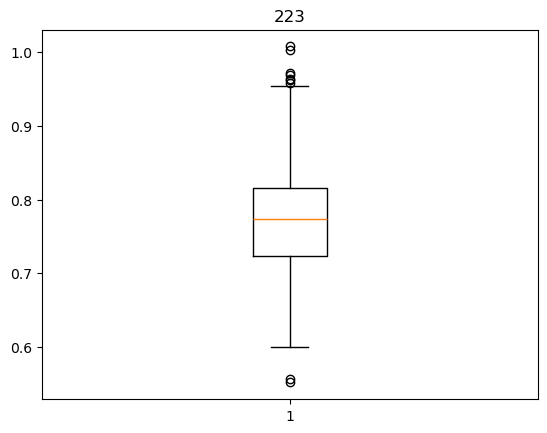

224


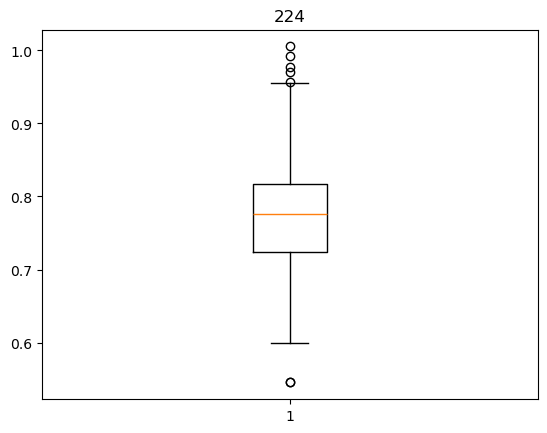

225


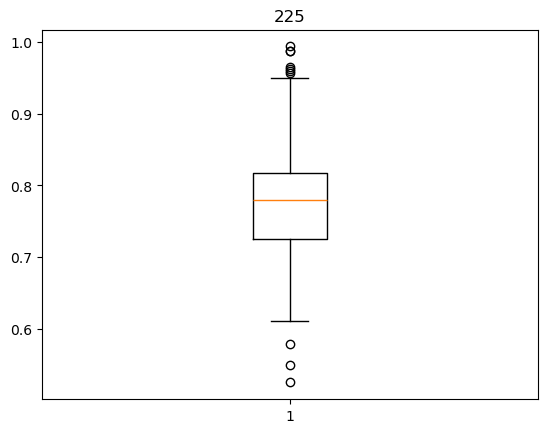

226


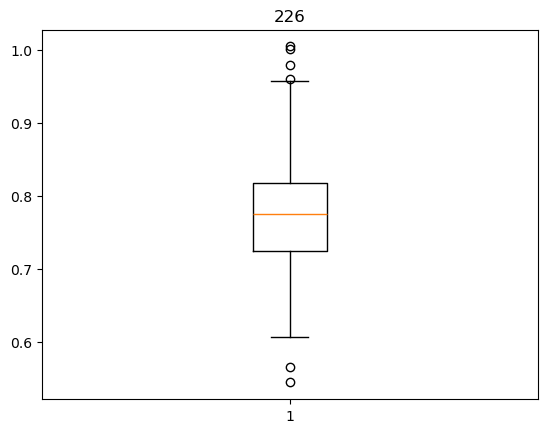

227


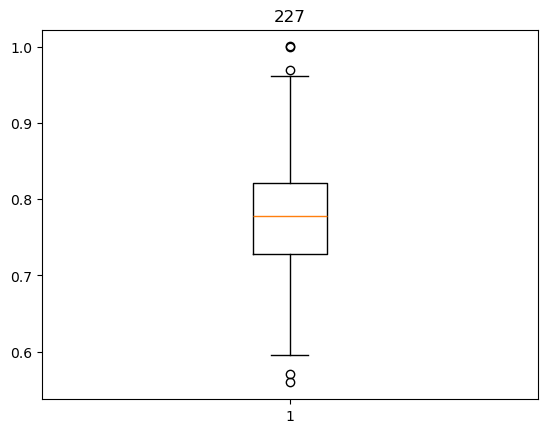

228


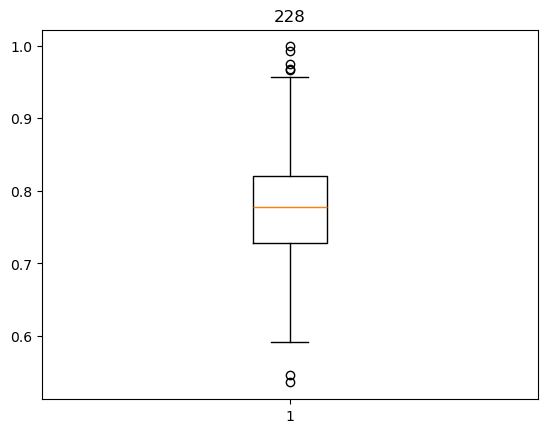

229


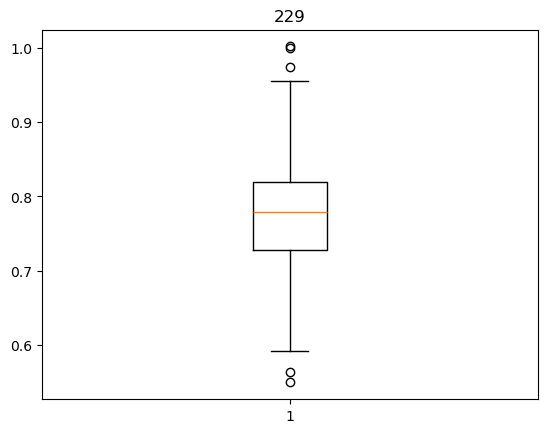

230


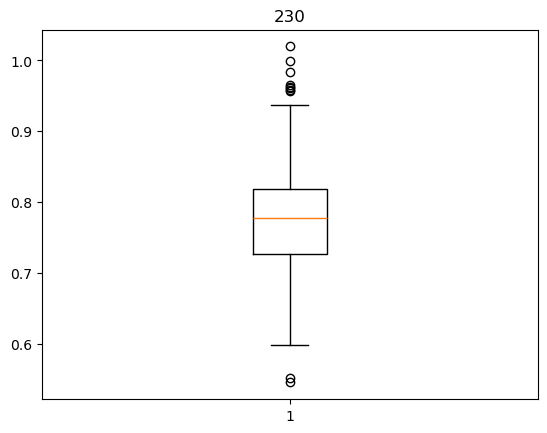

231


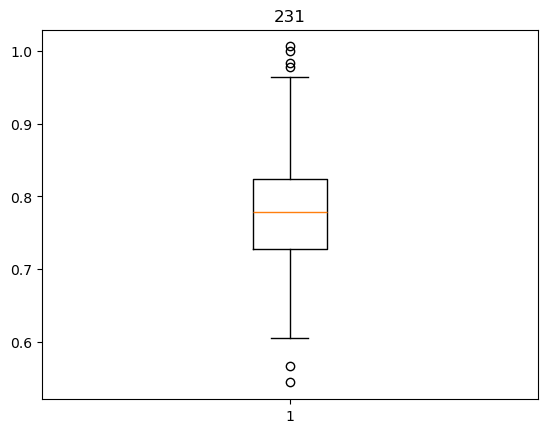

232


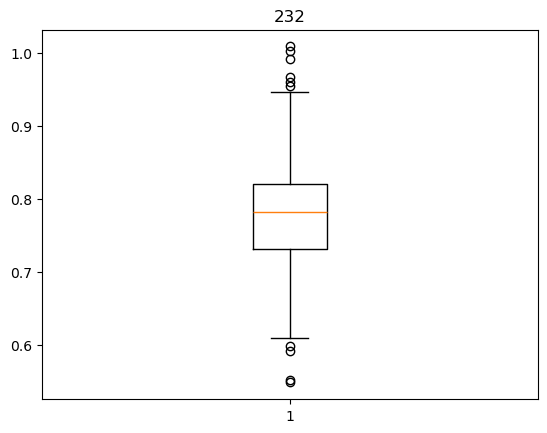

233


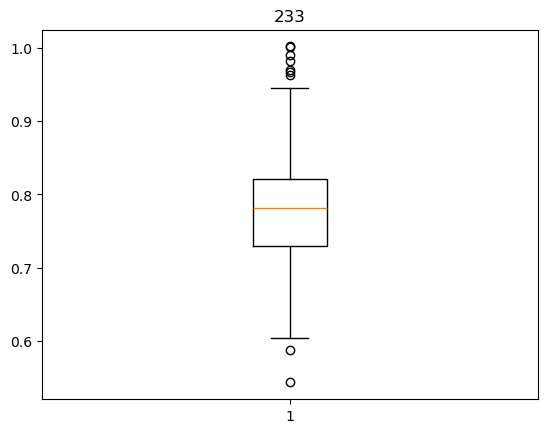

234


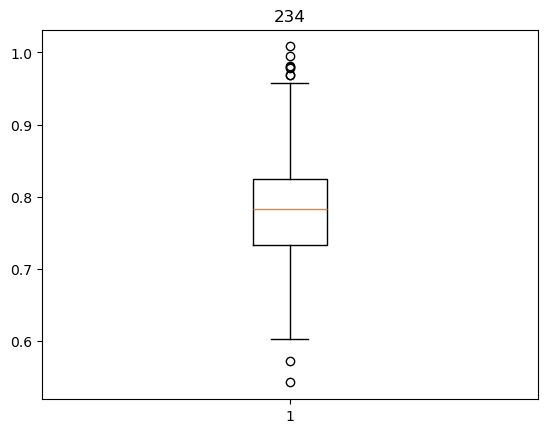

235


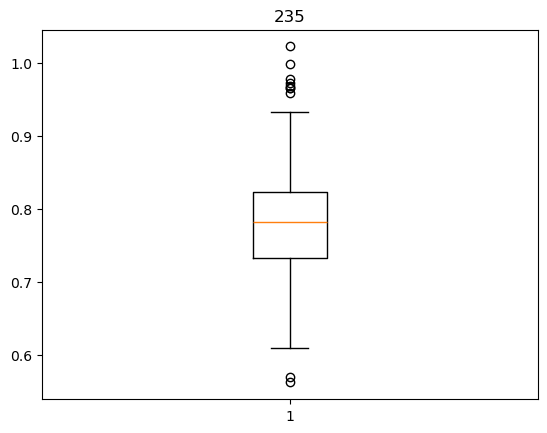

236


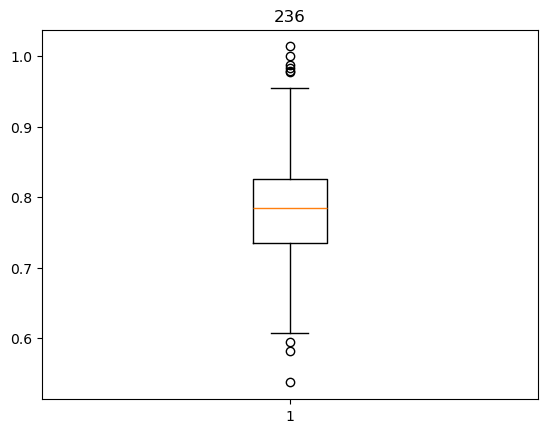

237


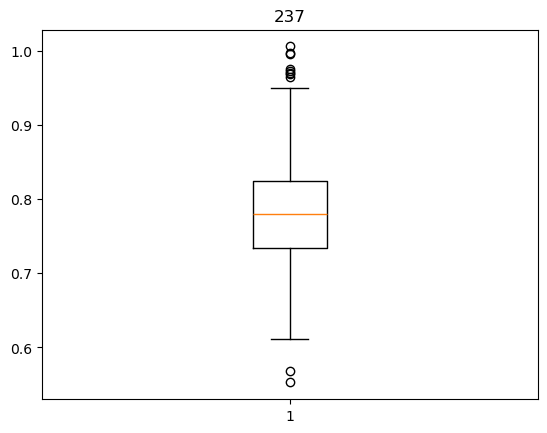

238


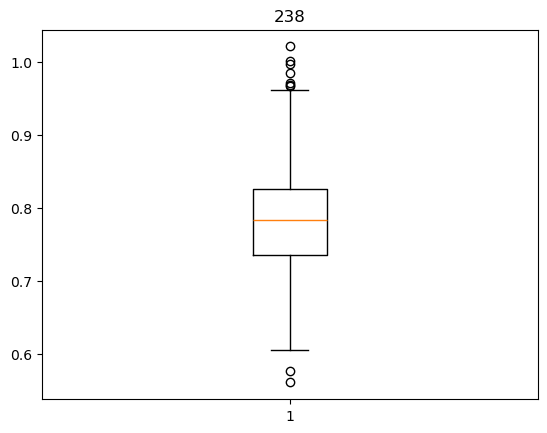

239


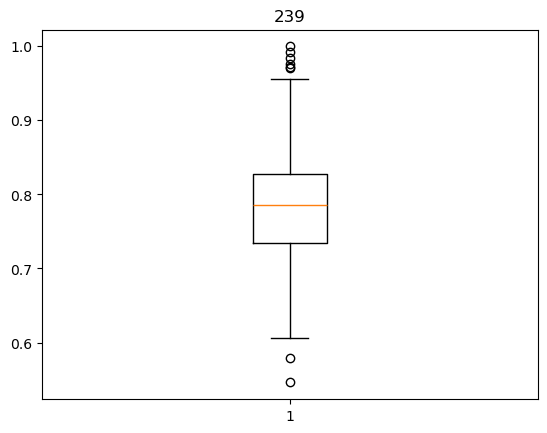

240


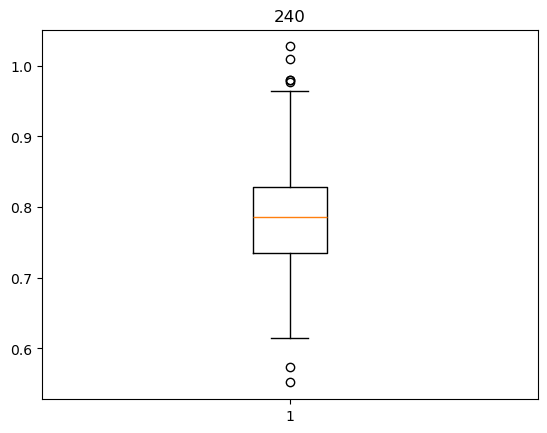

241


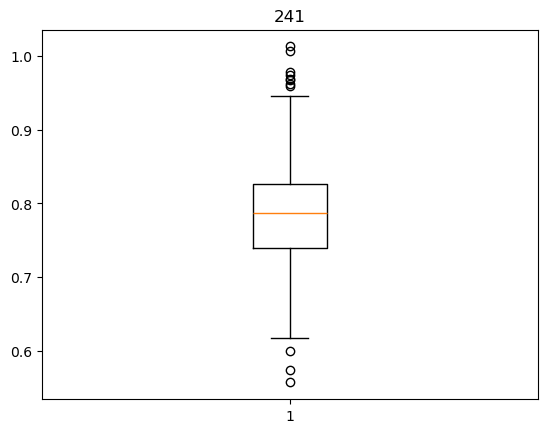

242


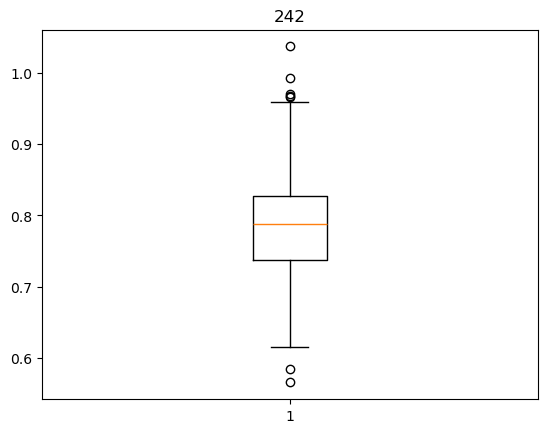

243


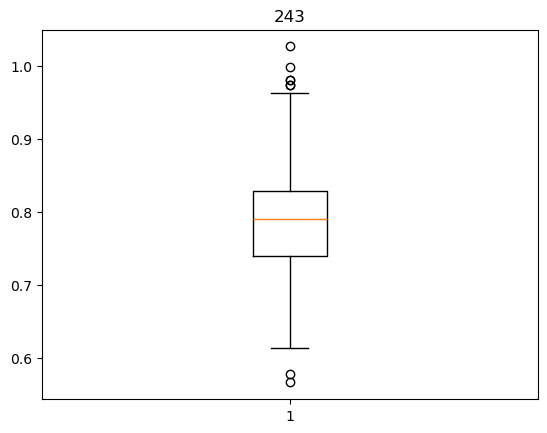

244


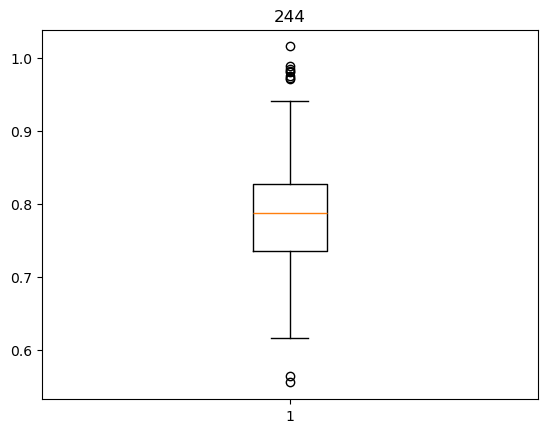

245


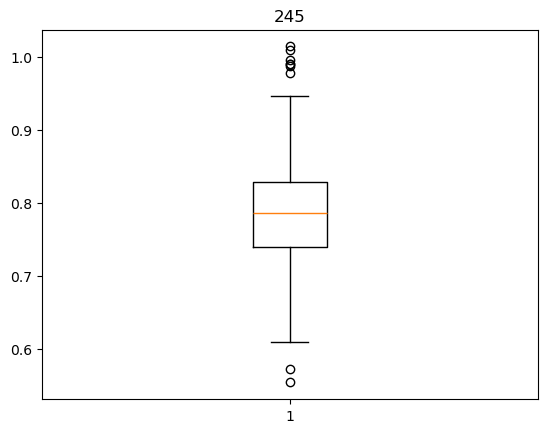

246


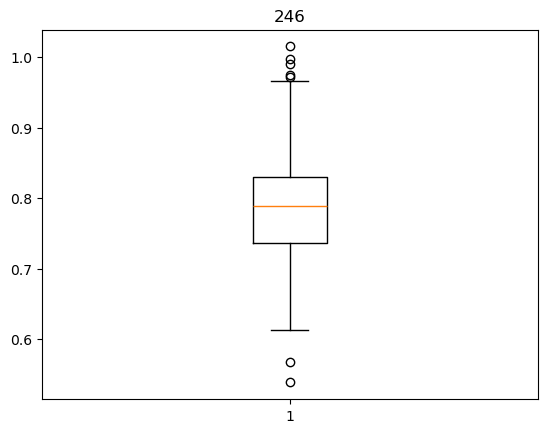

247


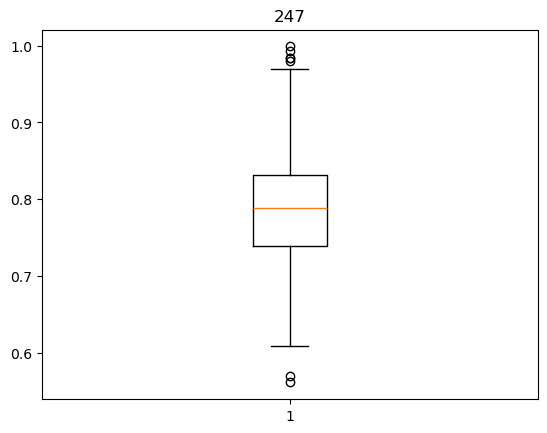

248


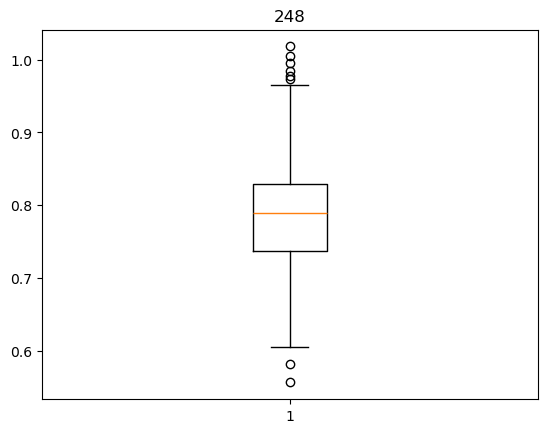

249


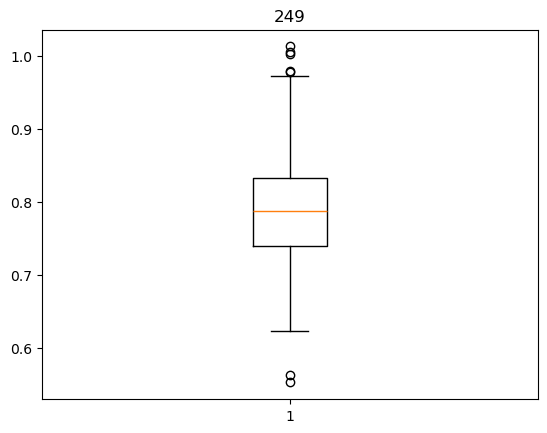

250


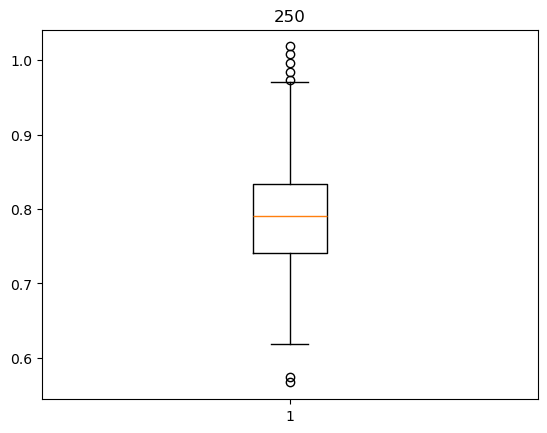

251


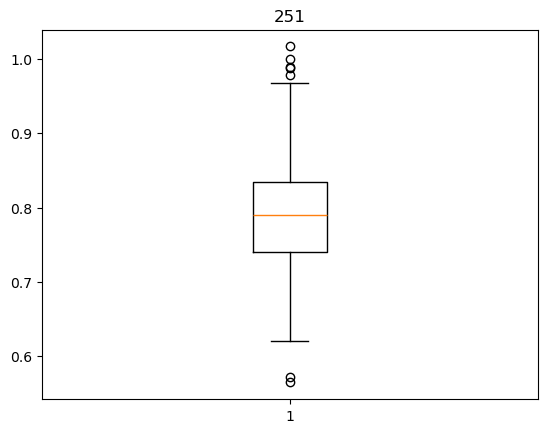

252


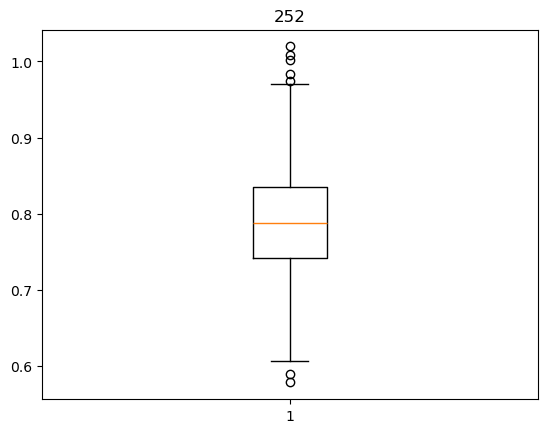

253


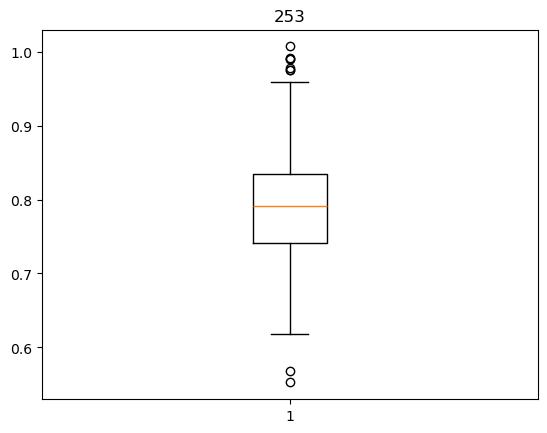

254


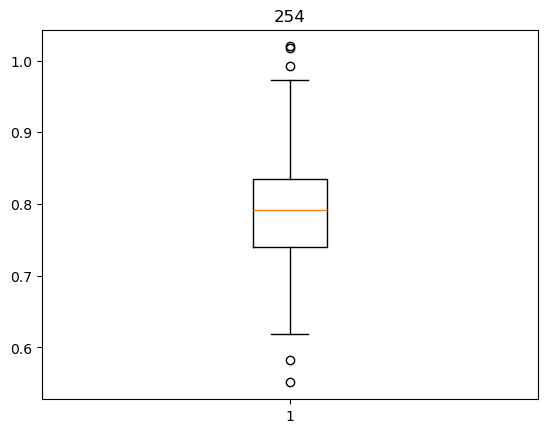

255


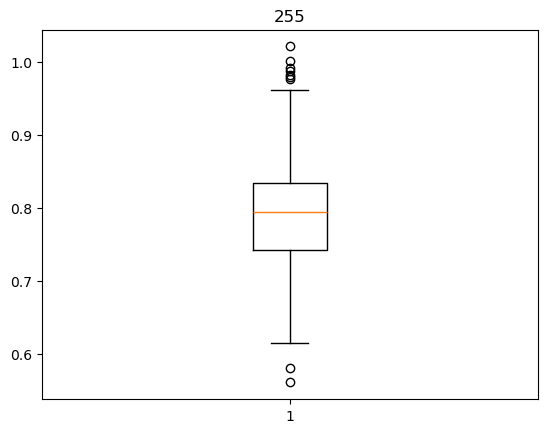

256


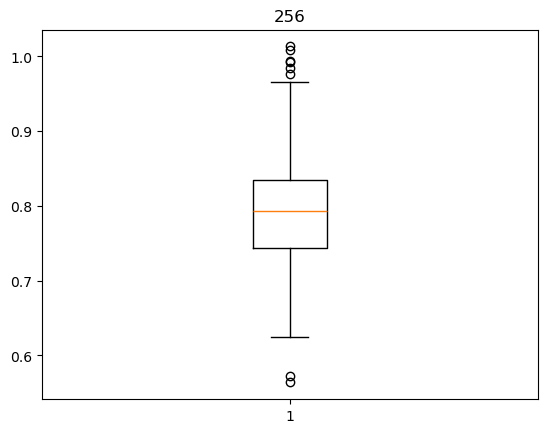

257


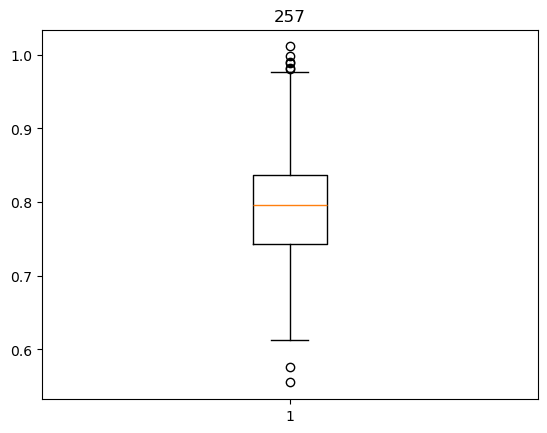

258


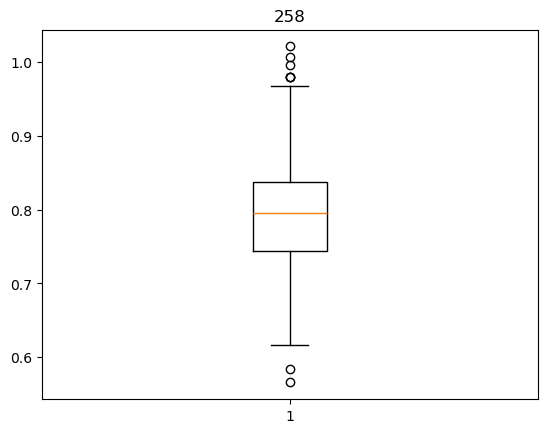

259


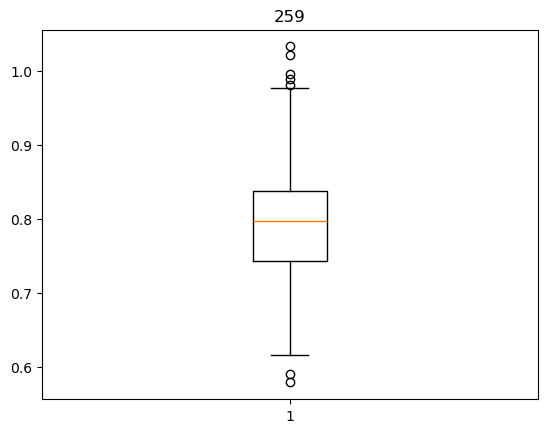

260


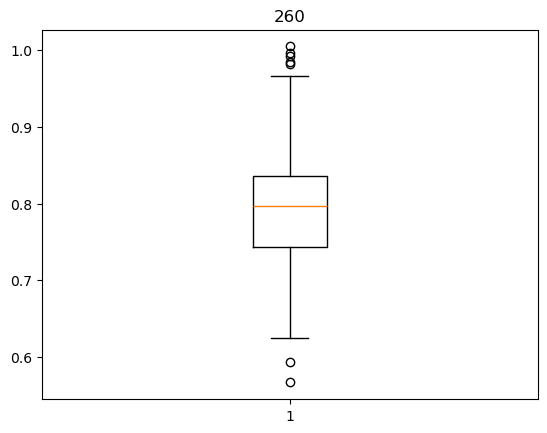

261


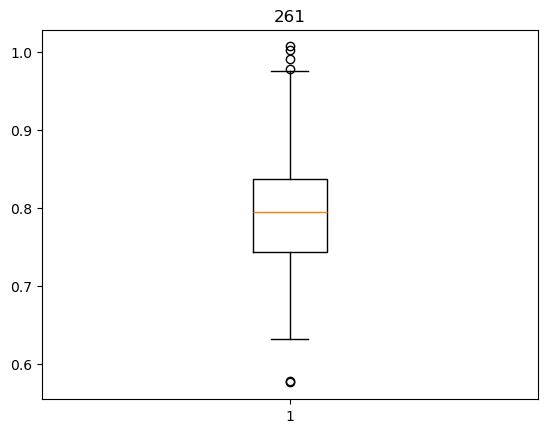

262


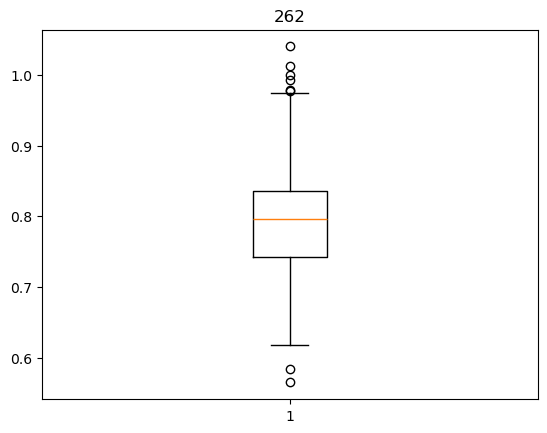

263


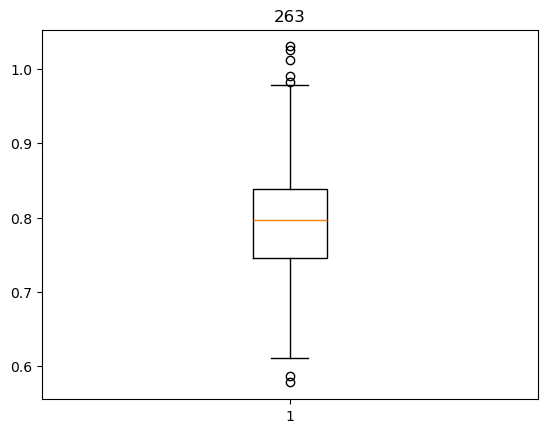

264


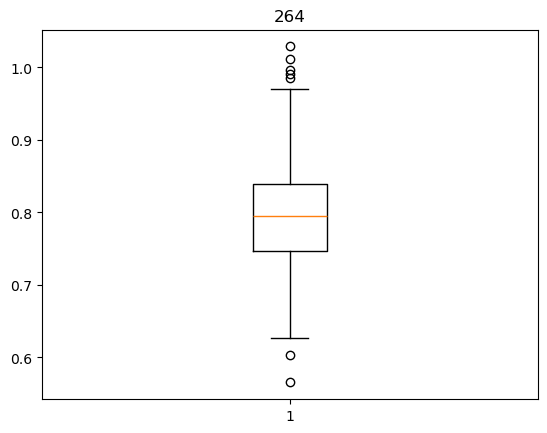

265


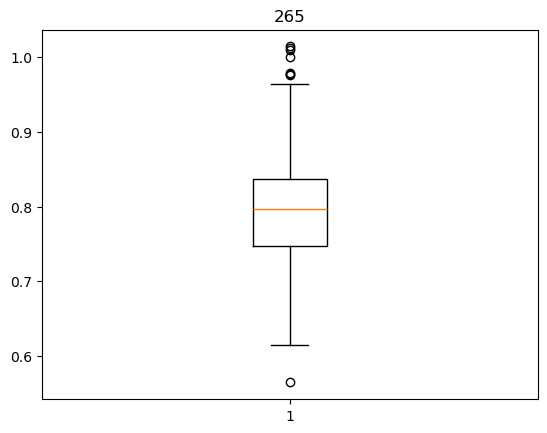

266


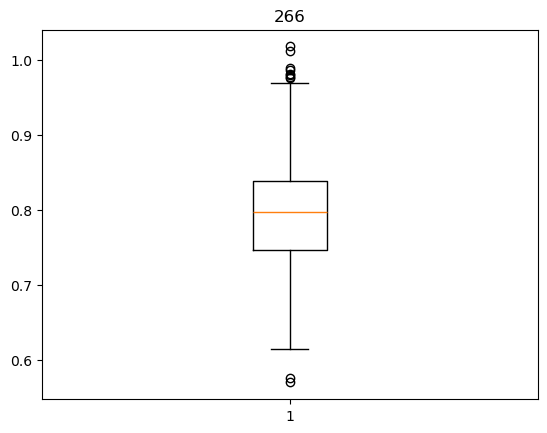

267


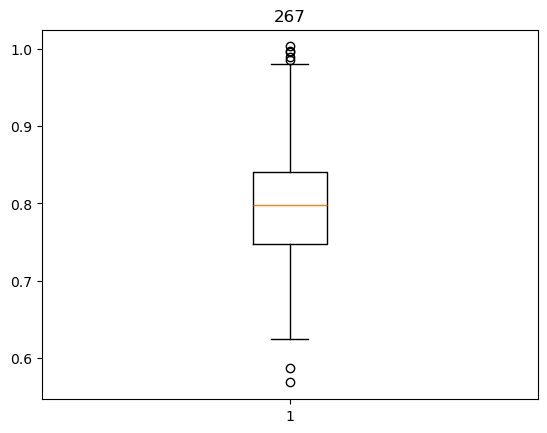

268


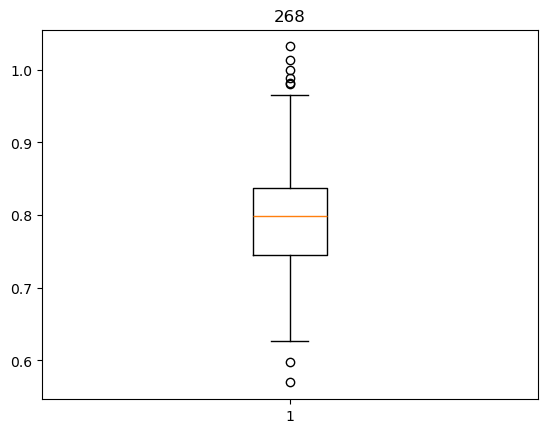

269


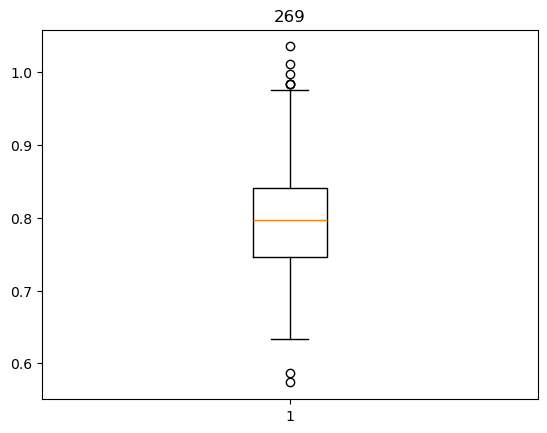

270


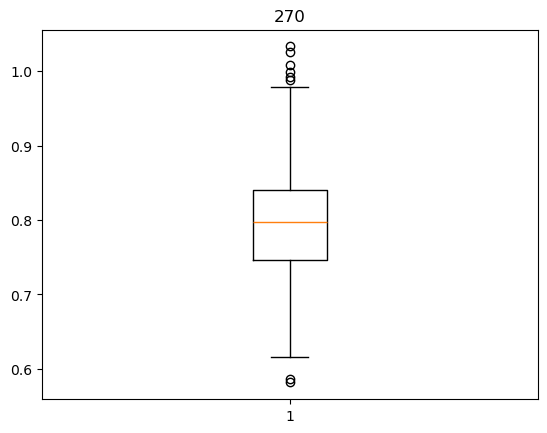

271


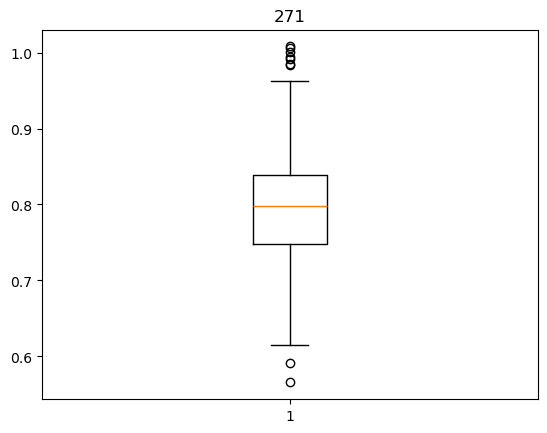

272


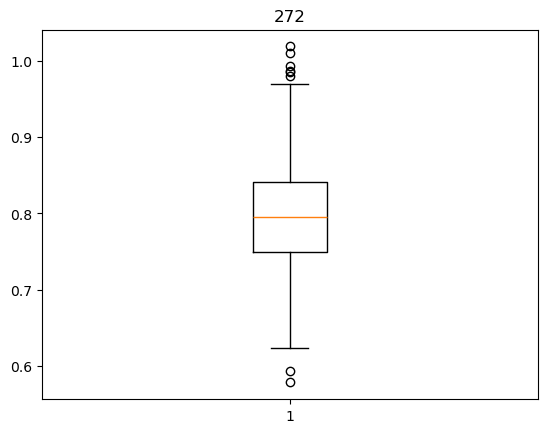

273


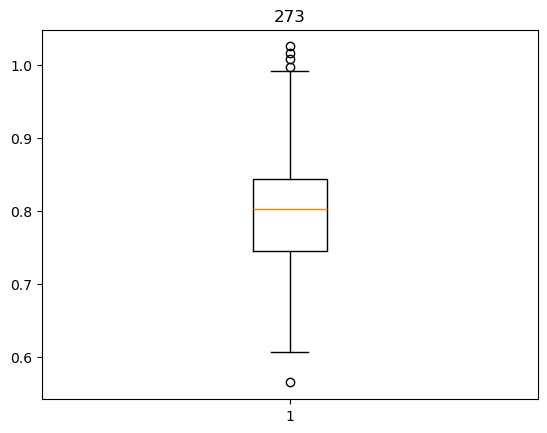

274


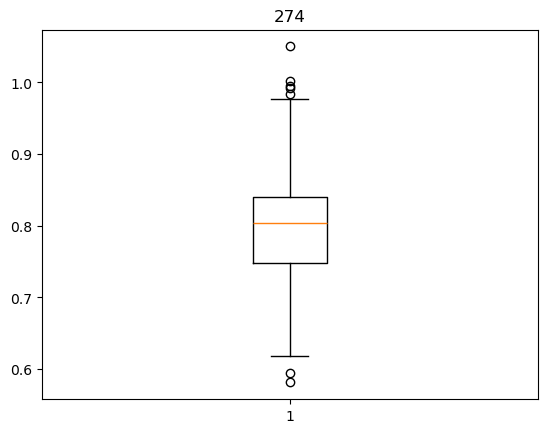

275


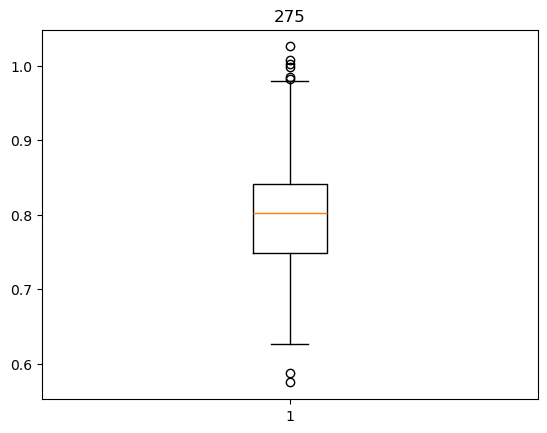

276


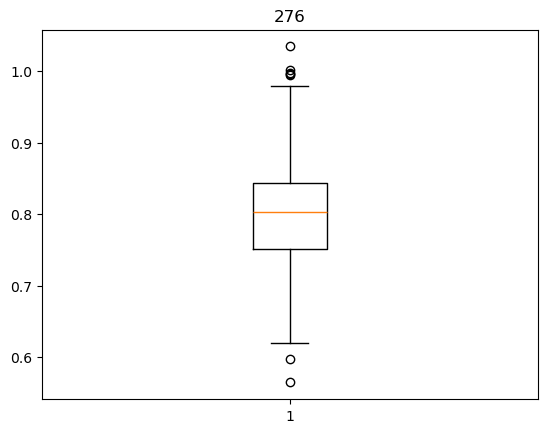

277


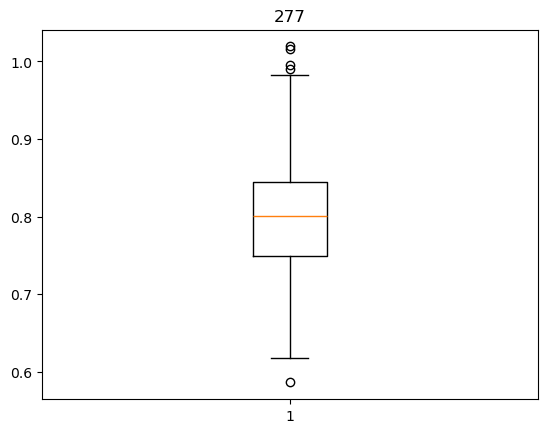

278


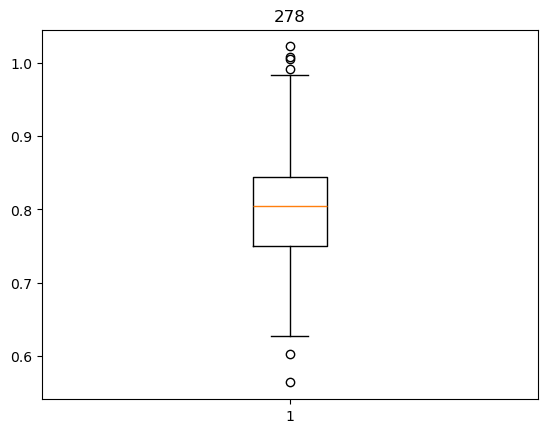

279


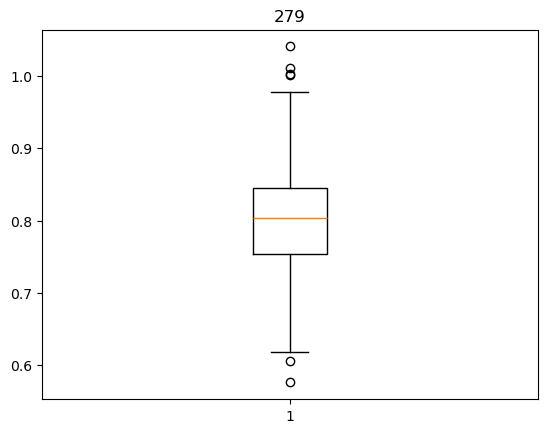

280


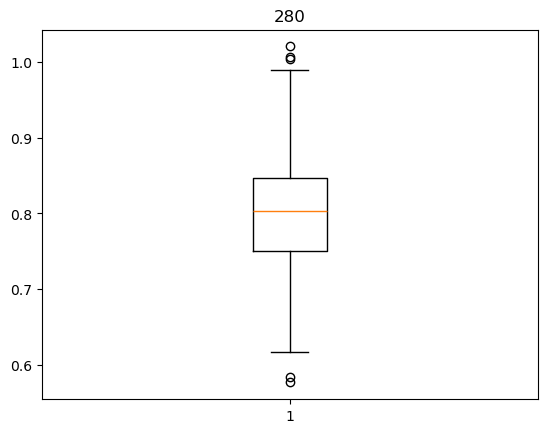

281


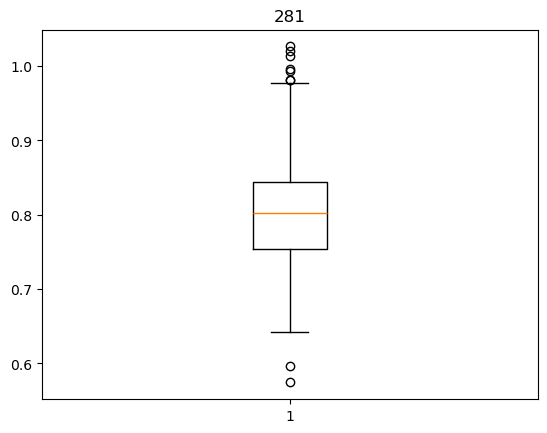

282


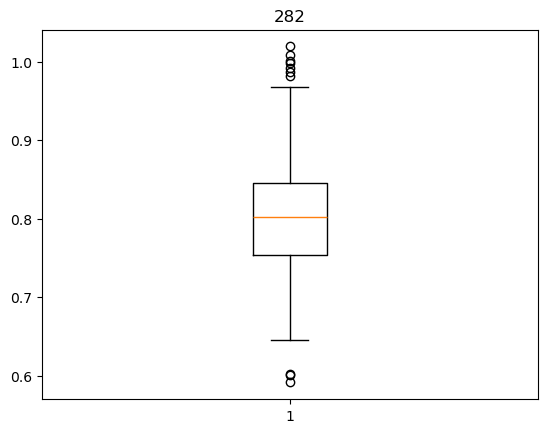

283


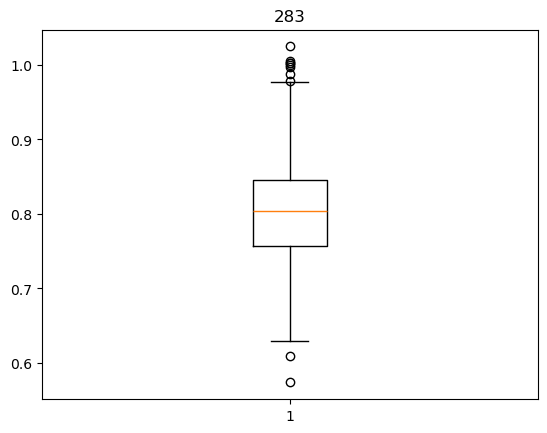

284


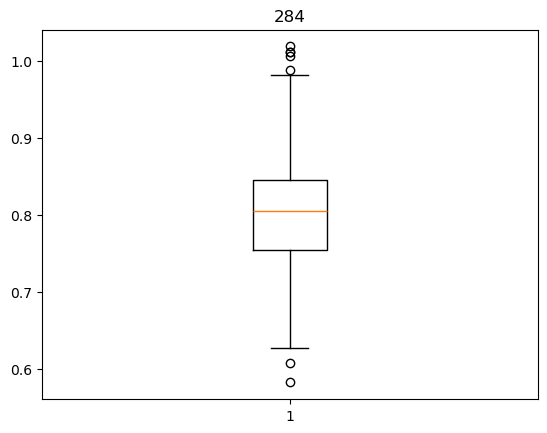

285


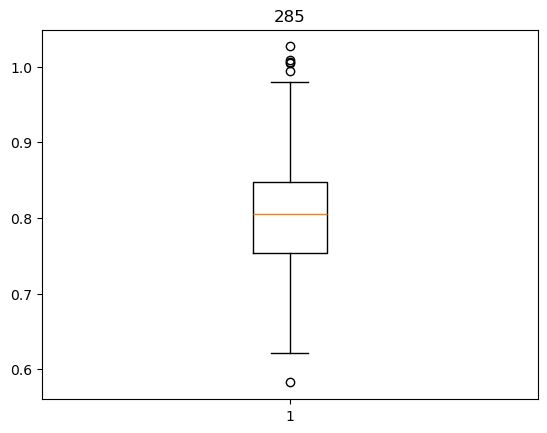

286


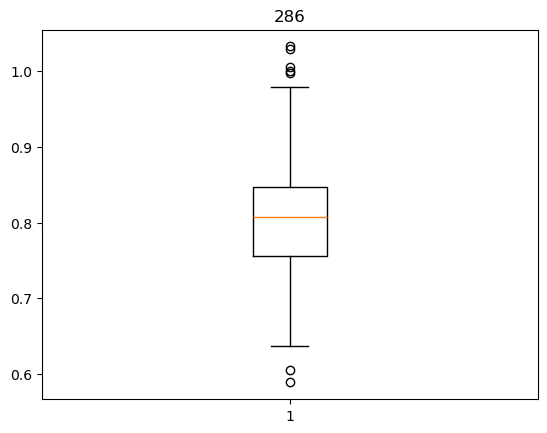

287


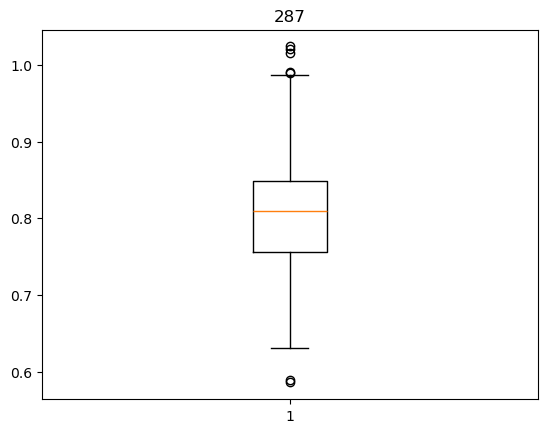

288


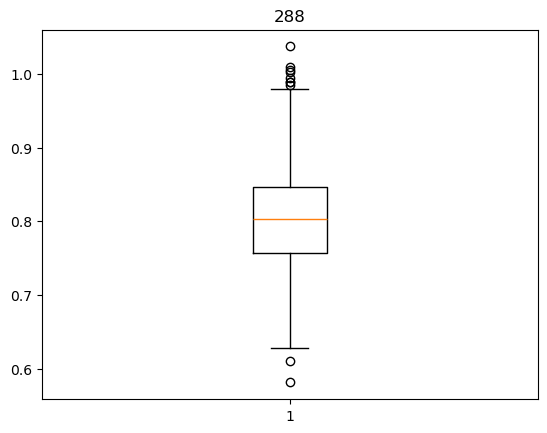

289


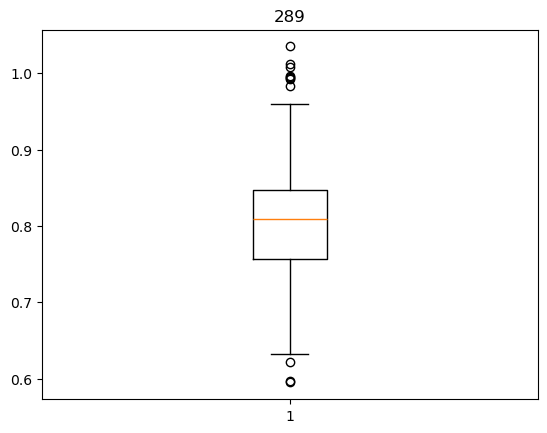

290


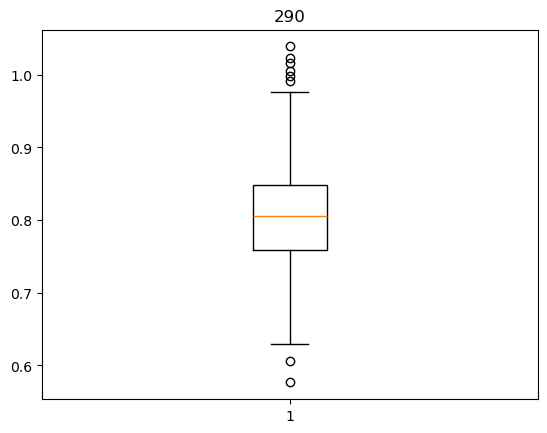

291


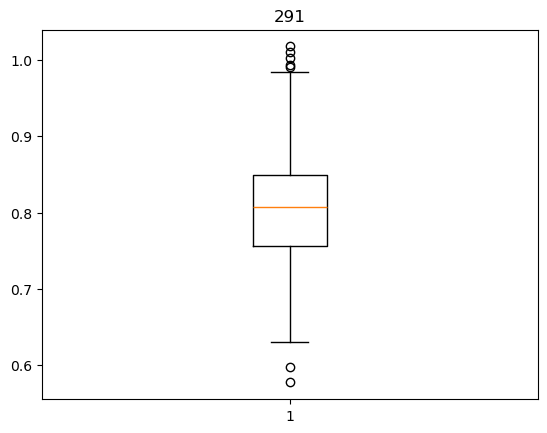

292


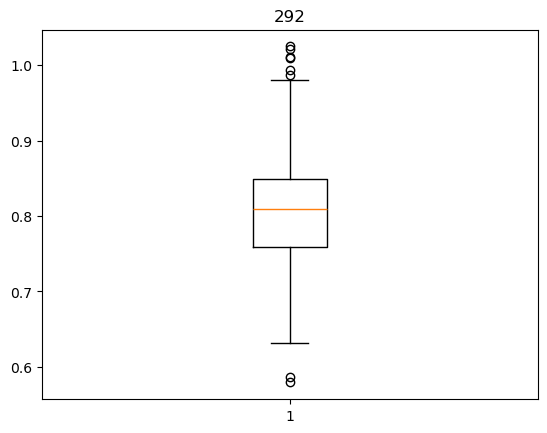

293


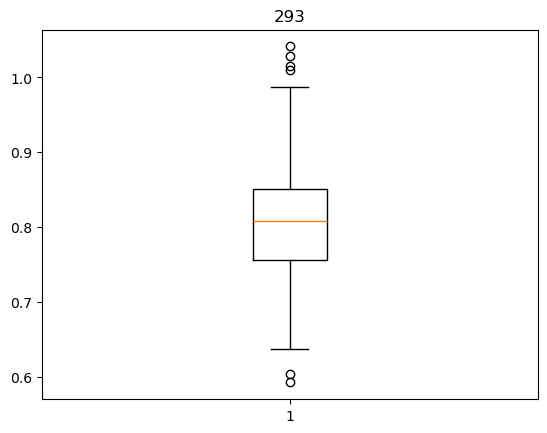

294


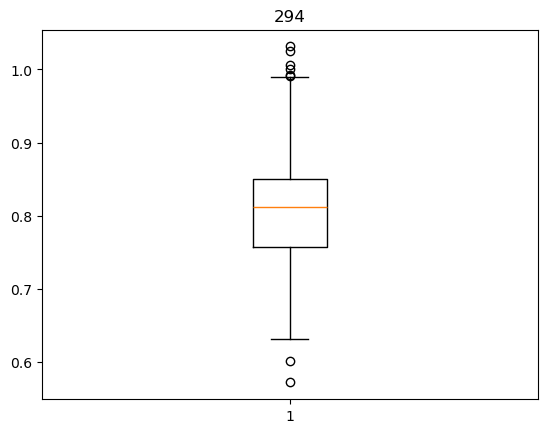

295


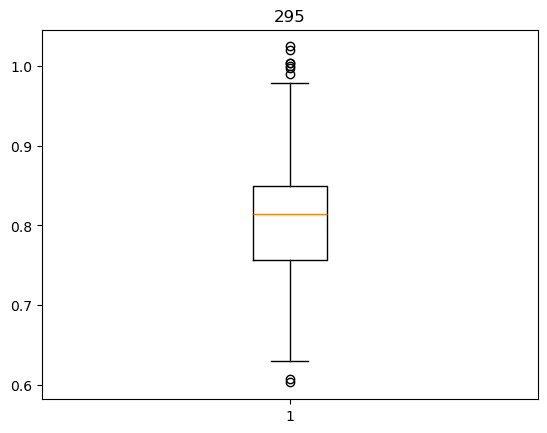

296


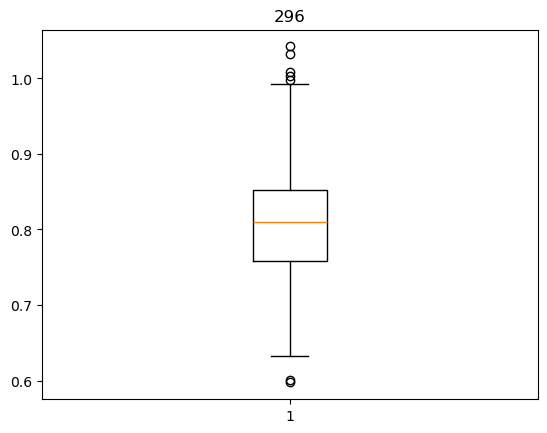

297


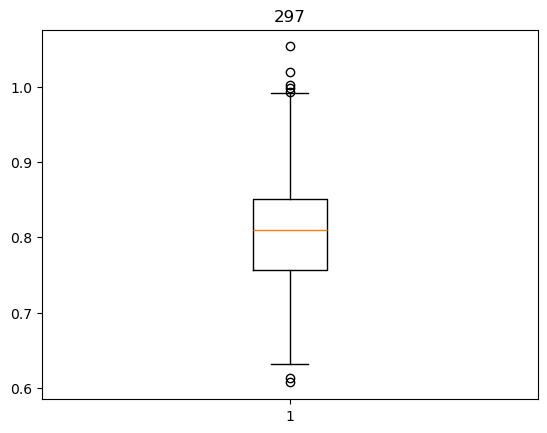

298


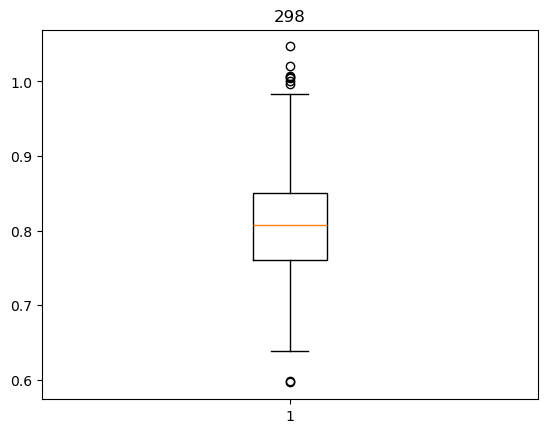

299


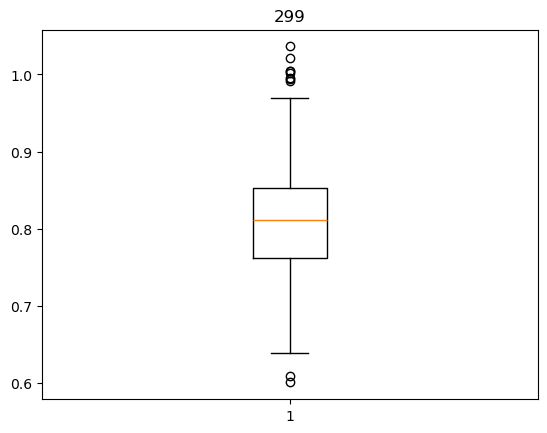

300


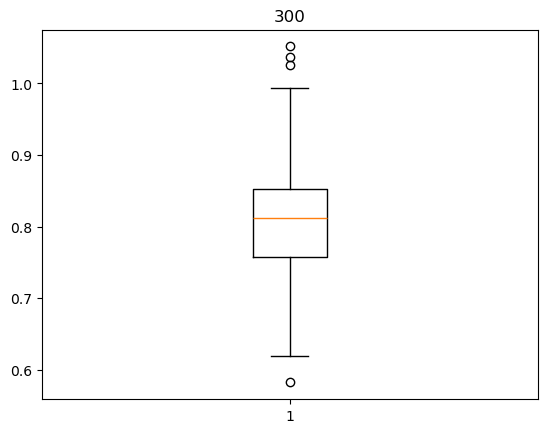

301


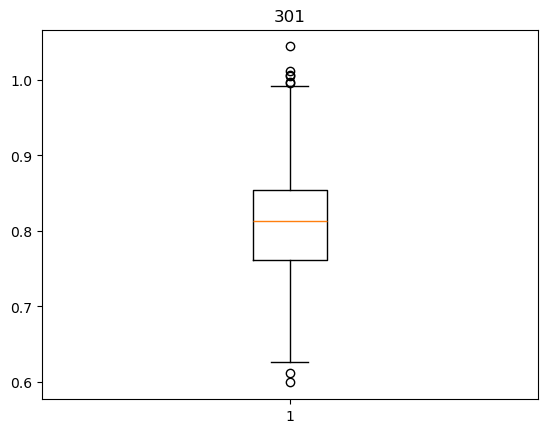

302


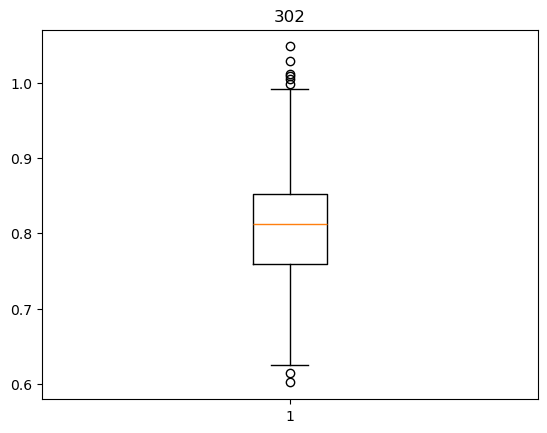

303


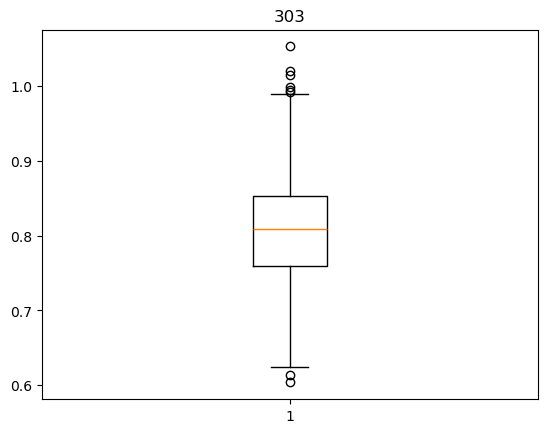

304


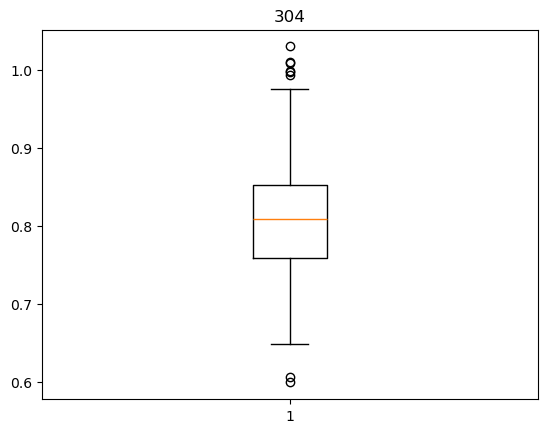

305


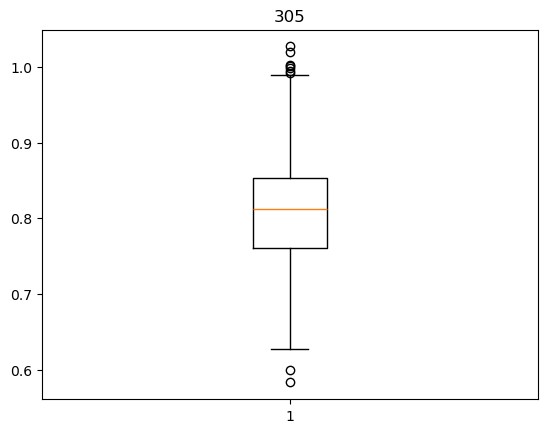

306


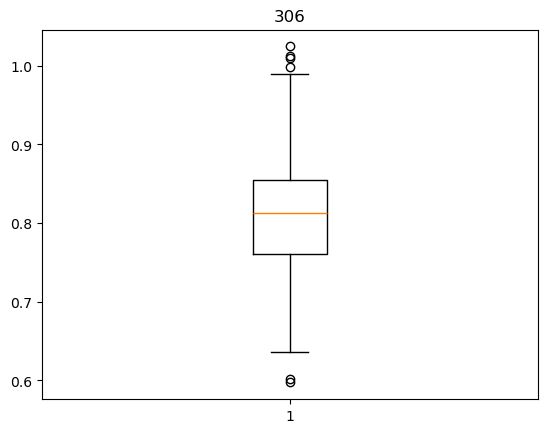

307


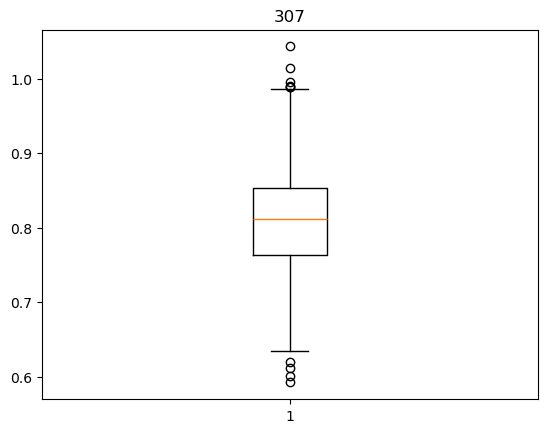

308


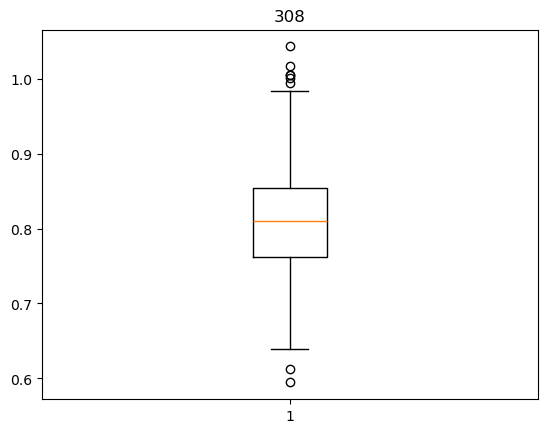

309


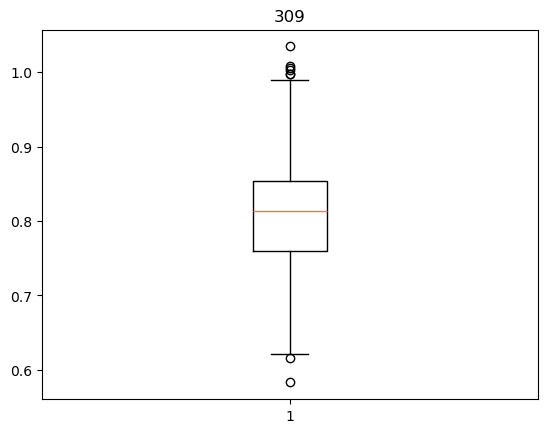

310


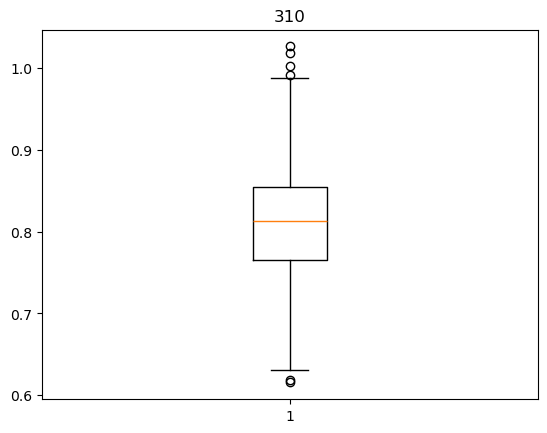

311


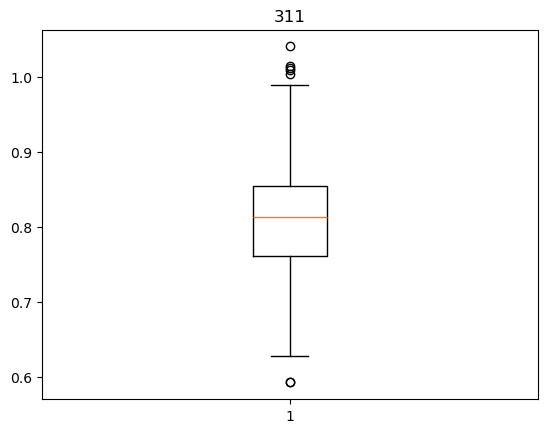

312


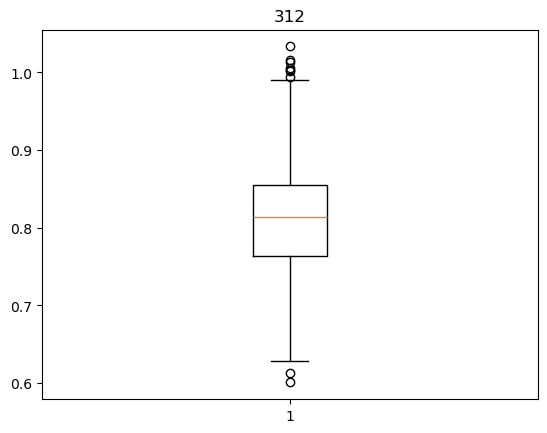

313


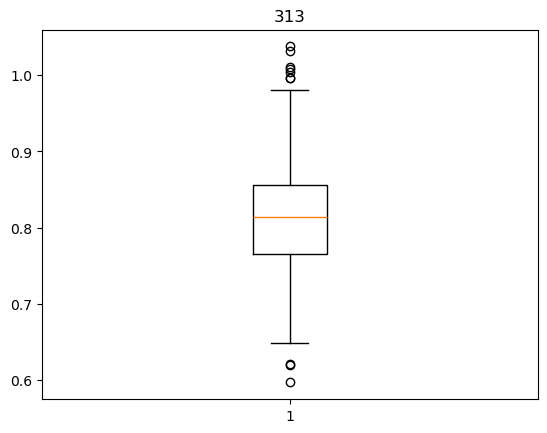

314


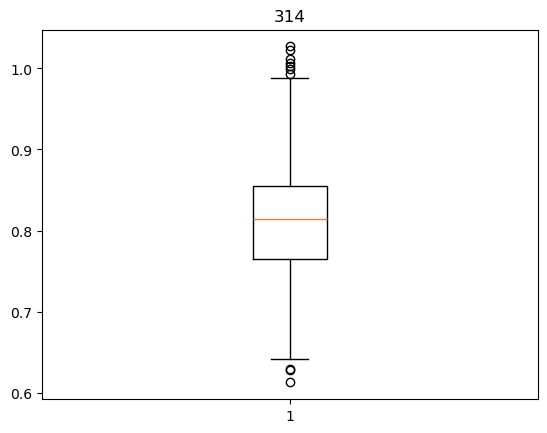

315


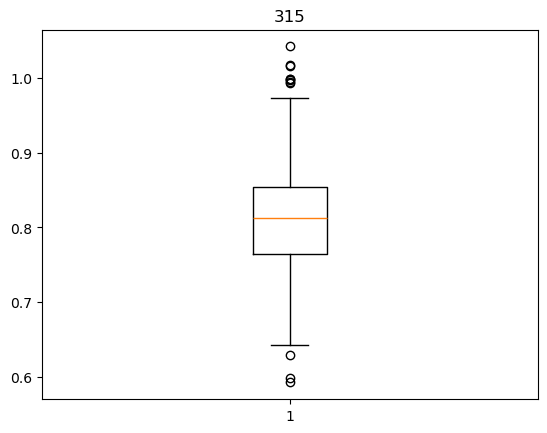

316


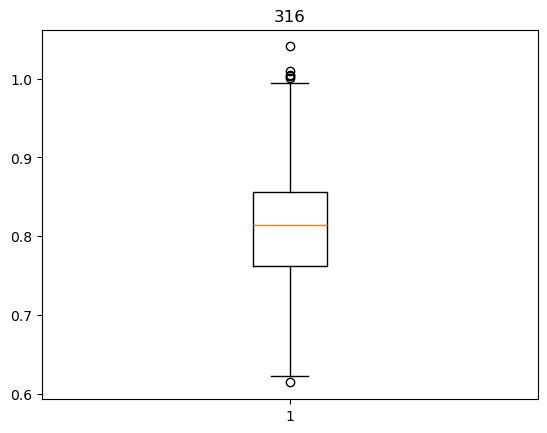

317


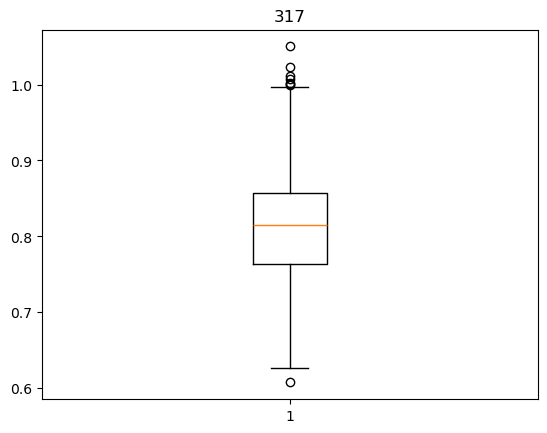

318


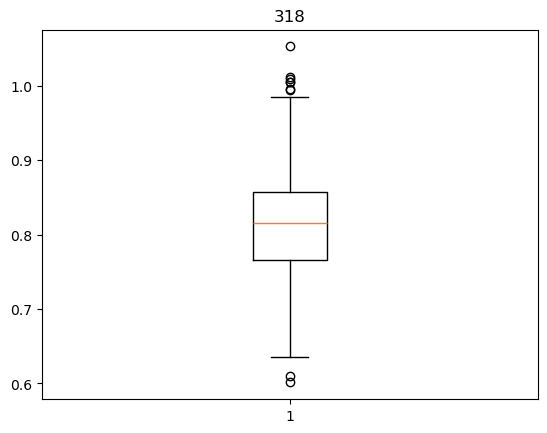

319


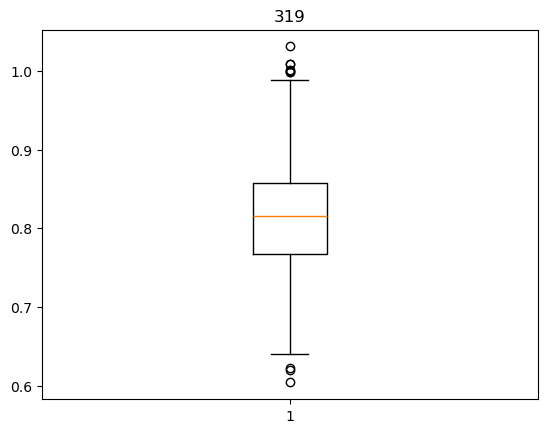

320


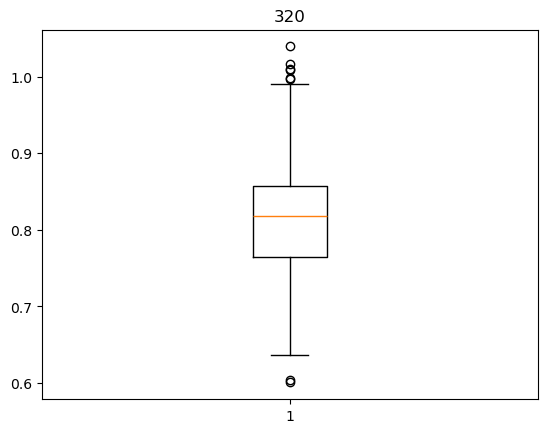

321


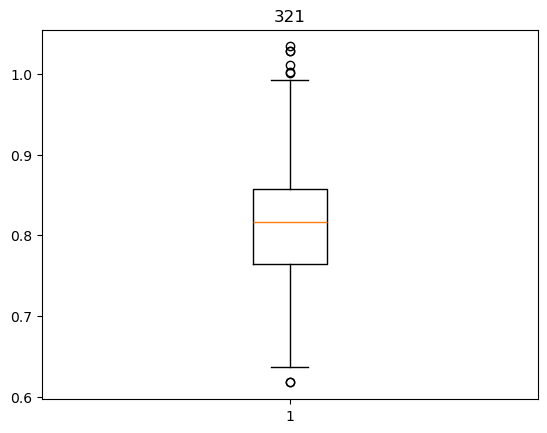

322


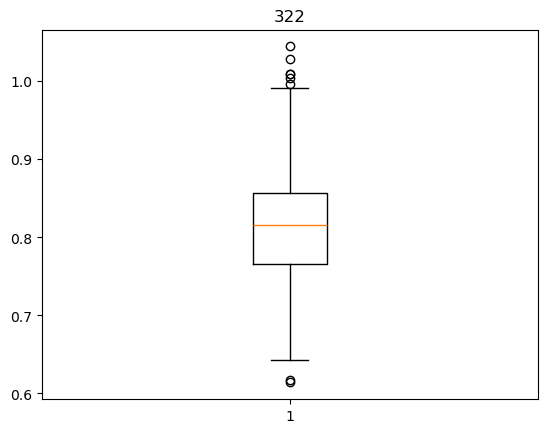

323


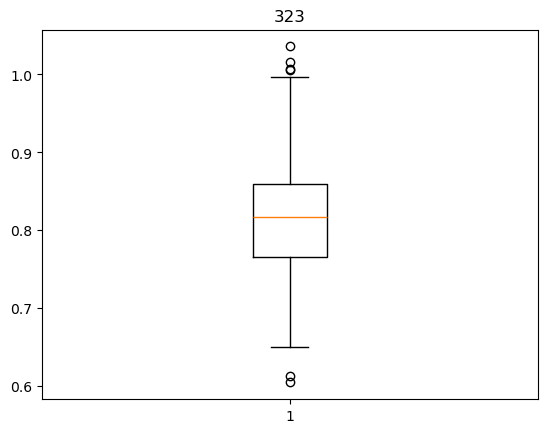

324


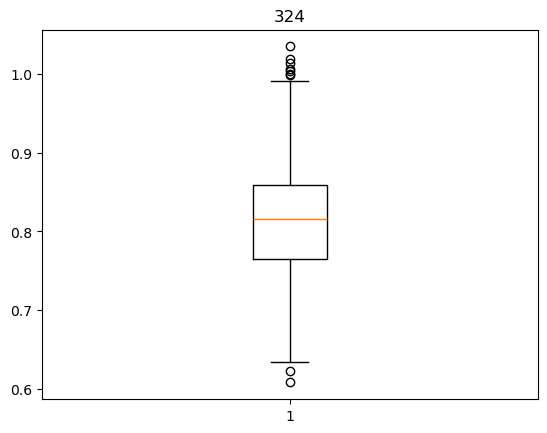

325


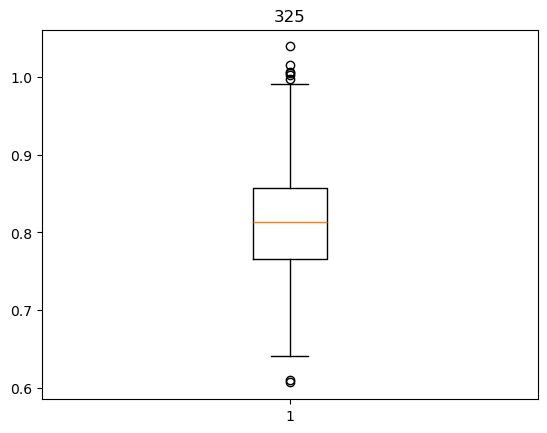

326


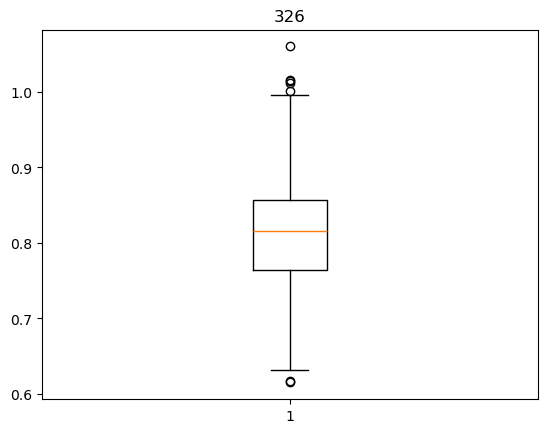

327


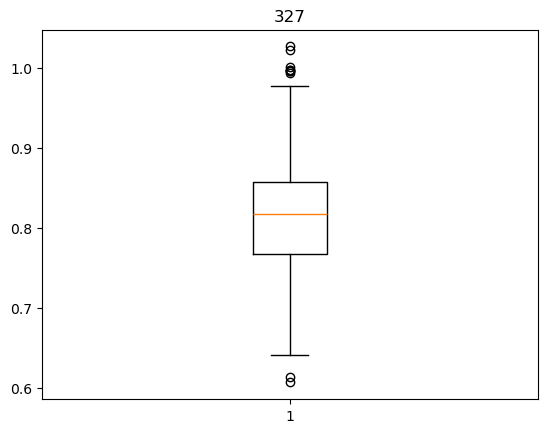

328


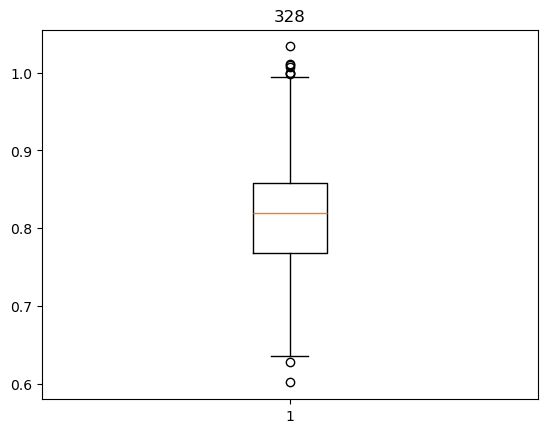

329


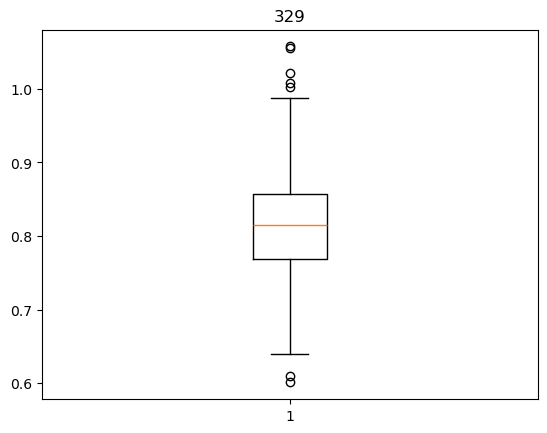

330


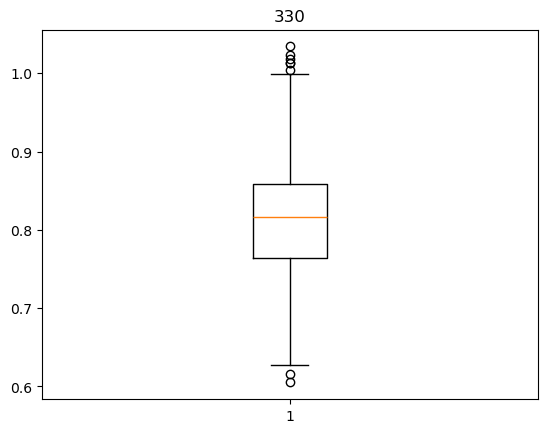

331


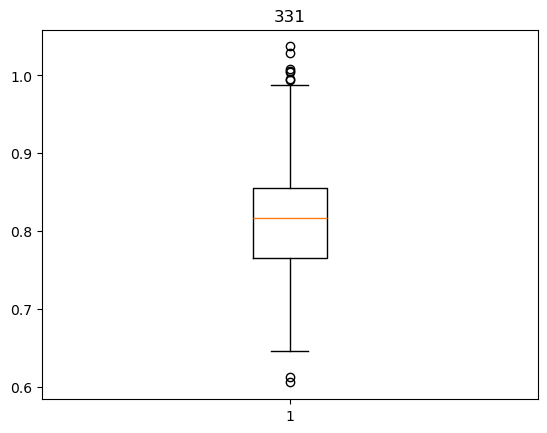

332


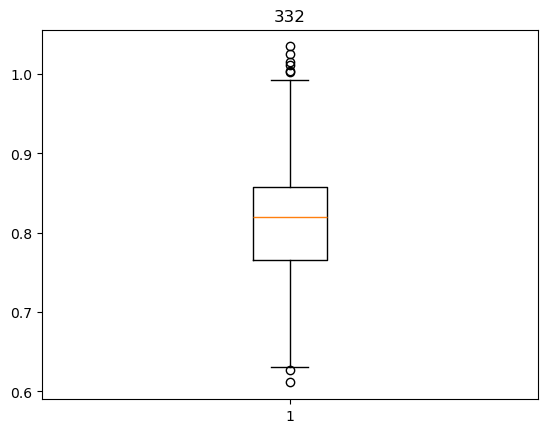

333


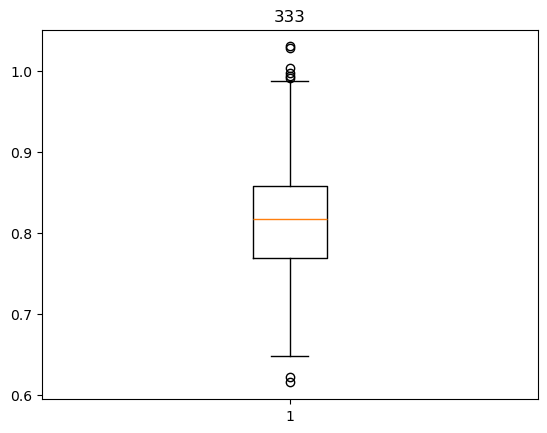

334


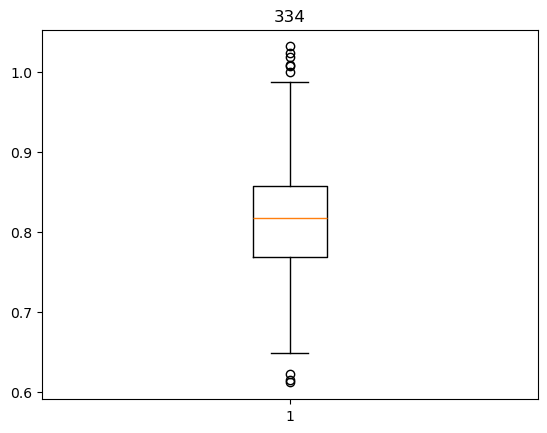

335


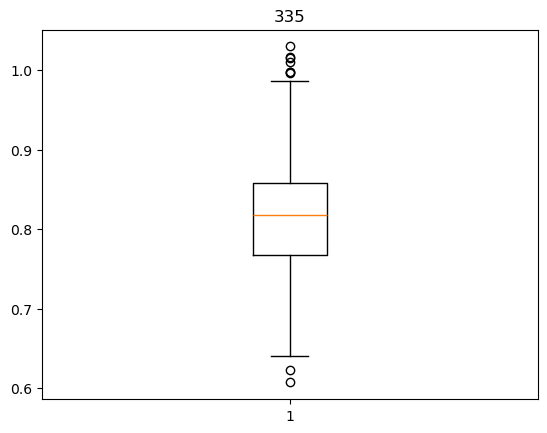

336


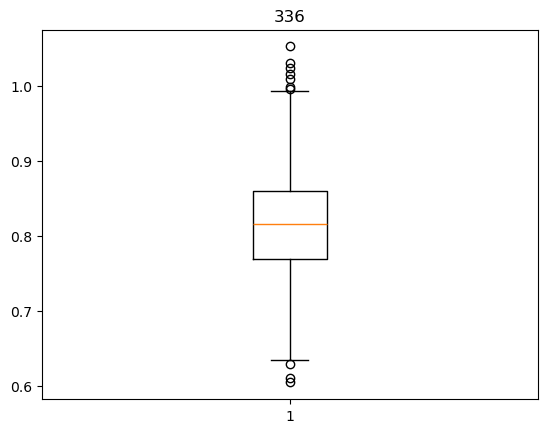

337


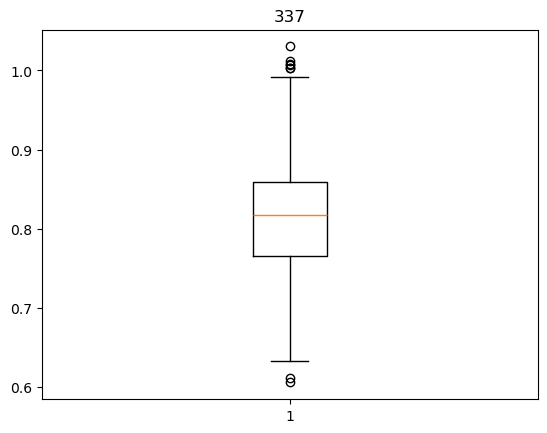

338


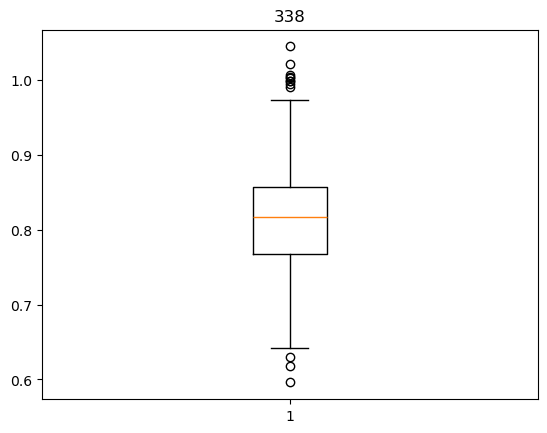

339


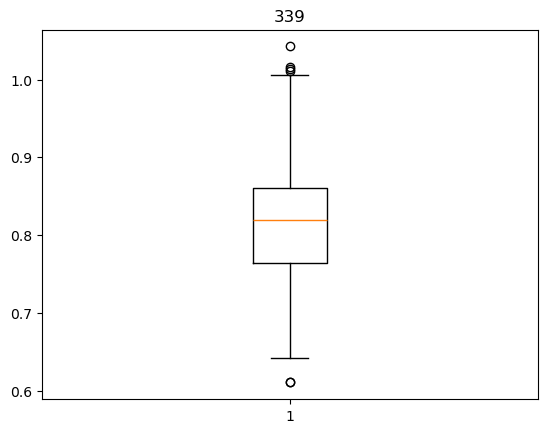

340


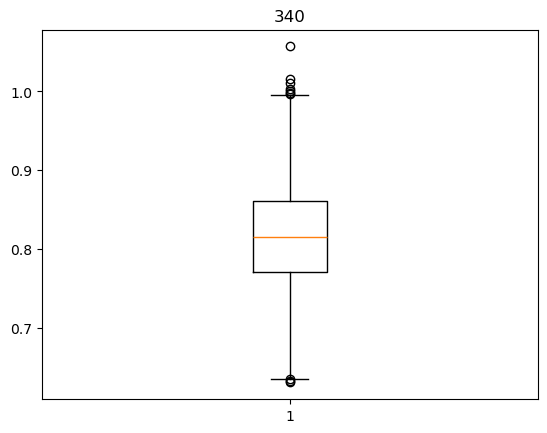

341


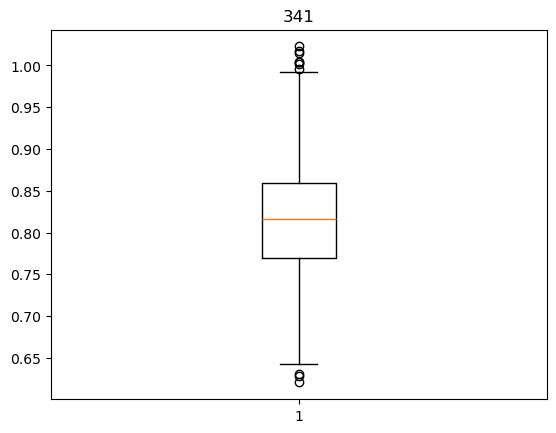

342


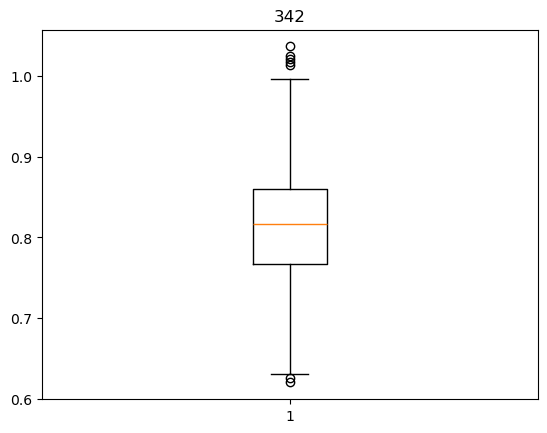

343


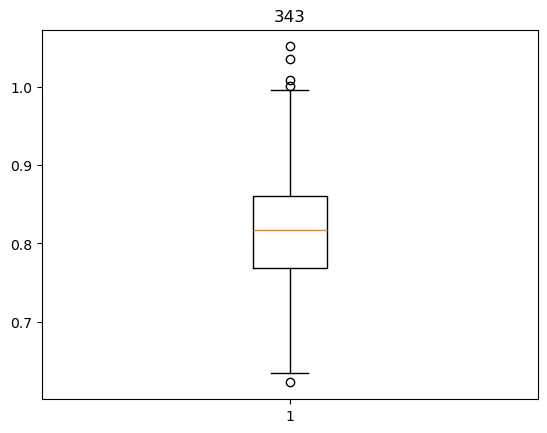

344


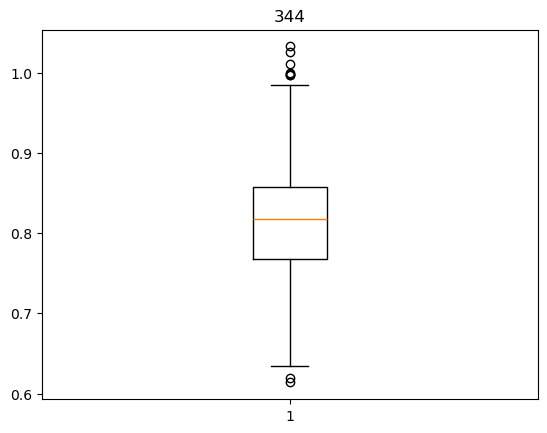

345


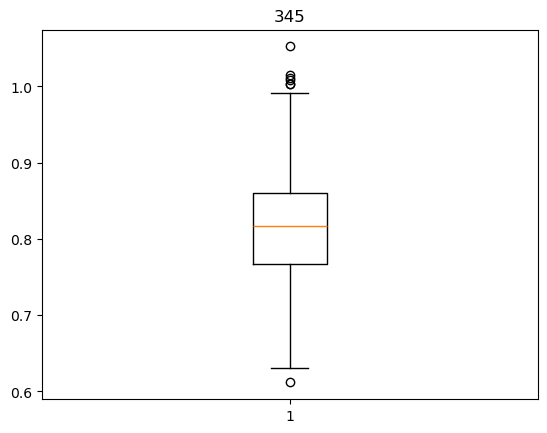

346


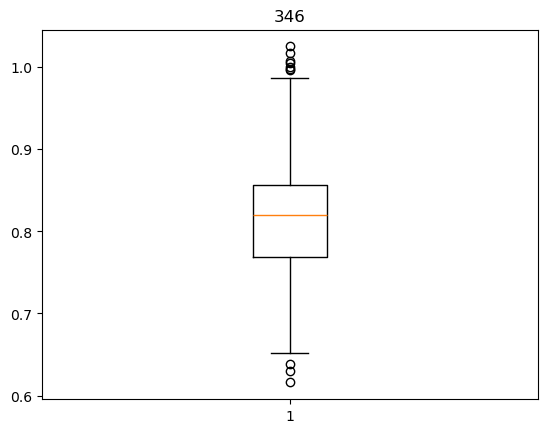

347


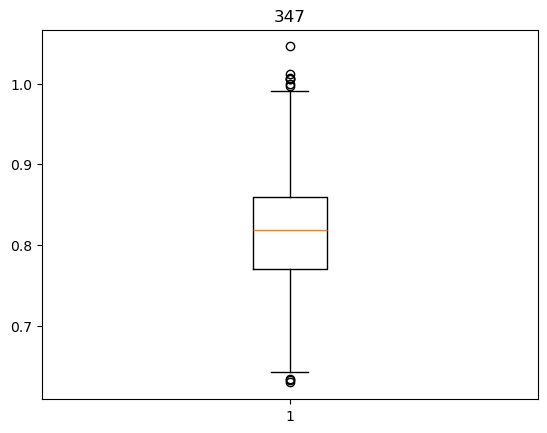

348


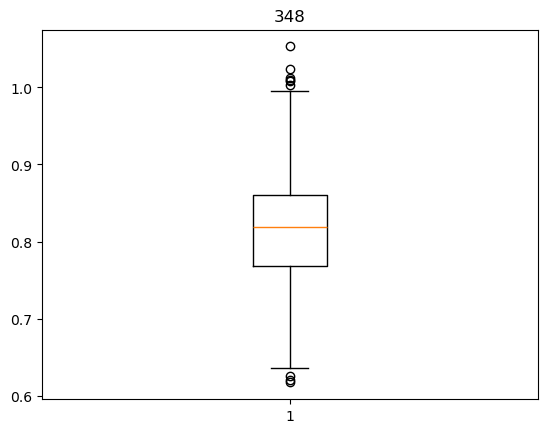

349


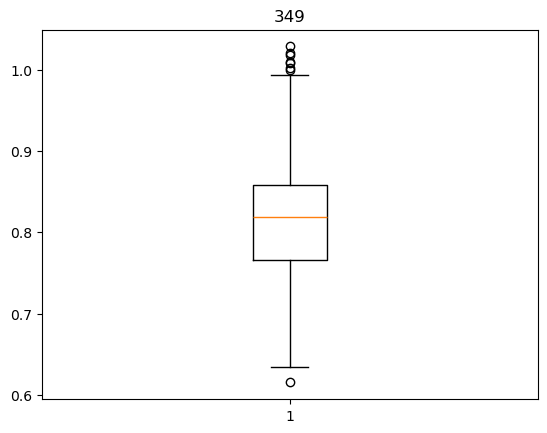

350


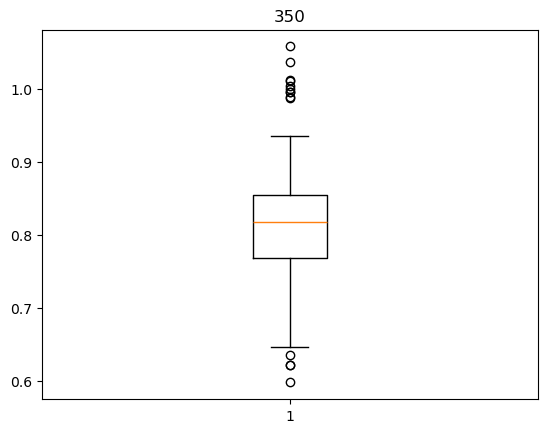

351


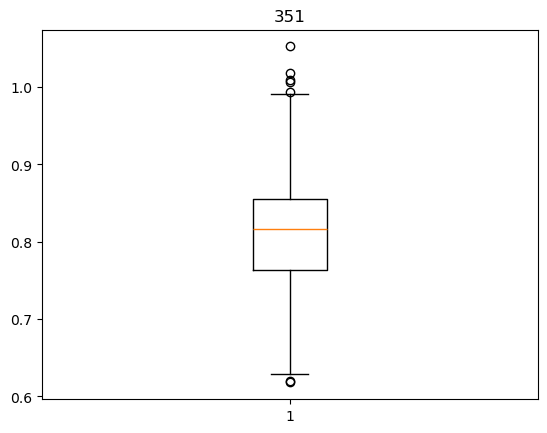

352


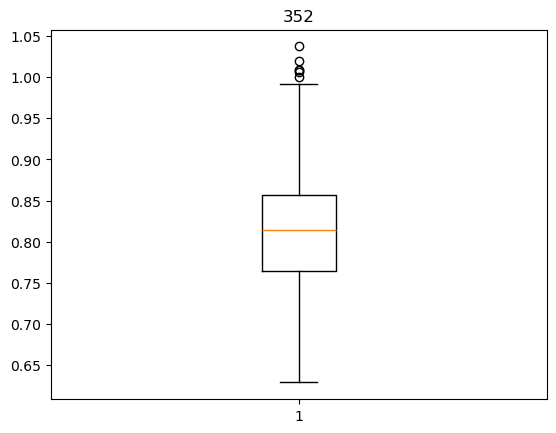

353


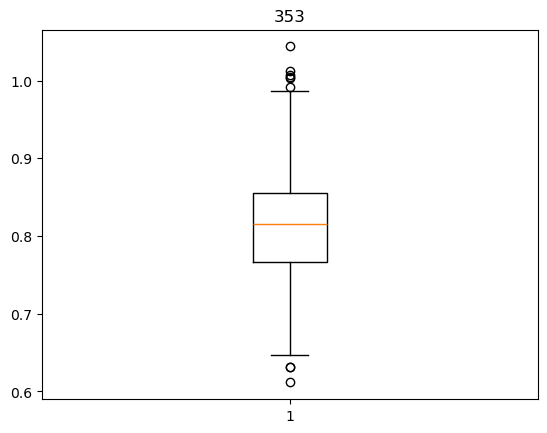

354


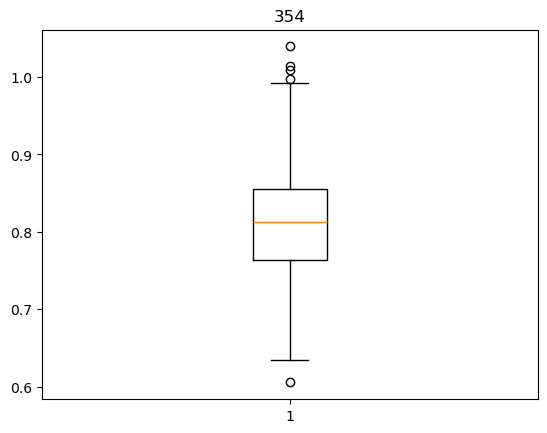

355


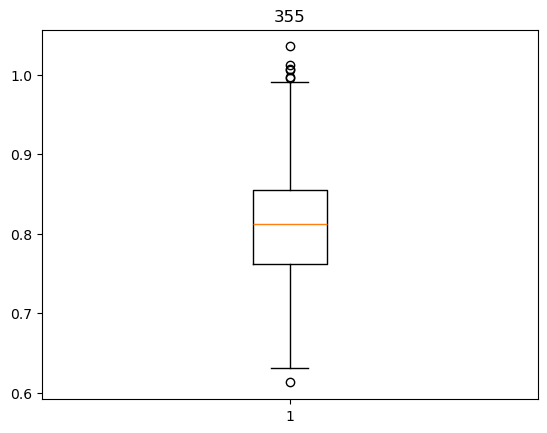

356


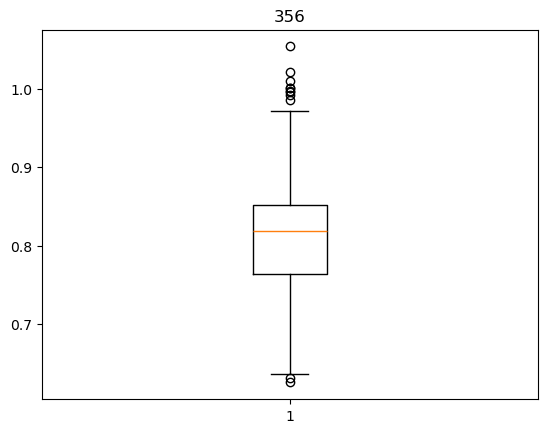

357


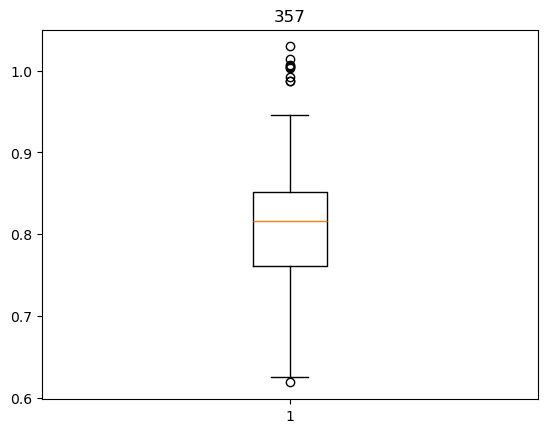

358


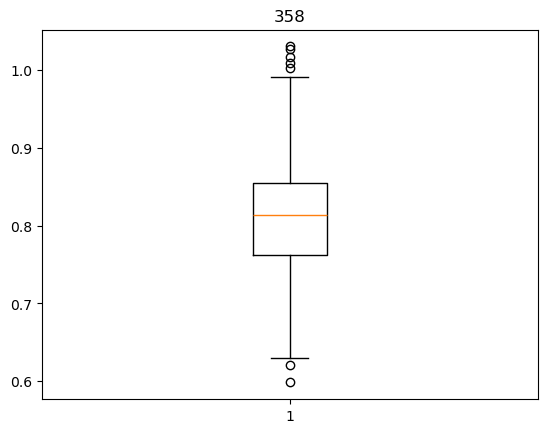

359


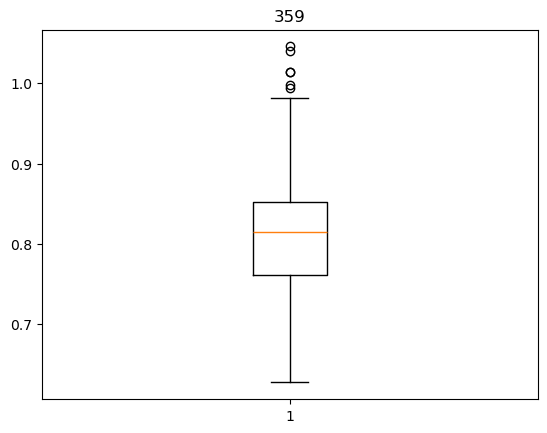

360


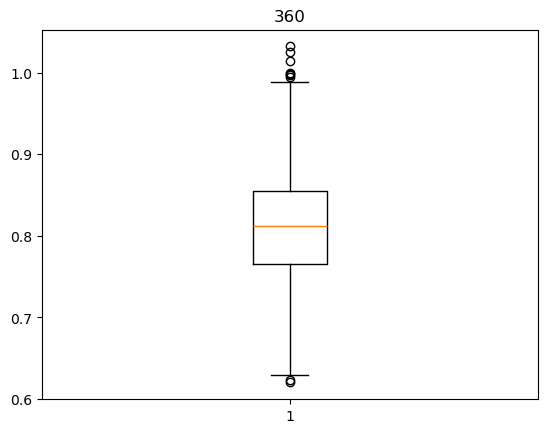

361


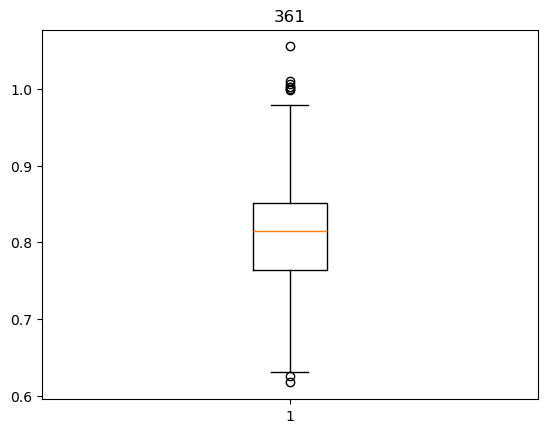

362


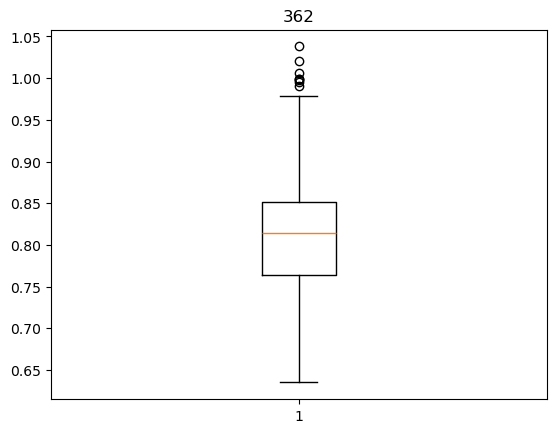

363


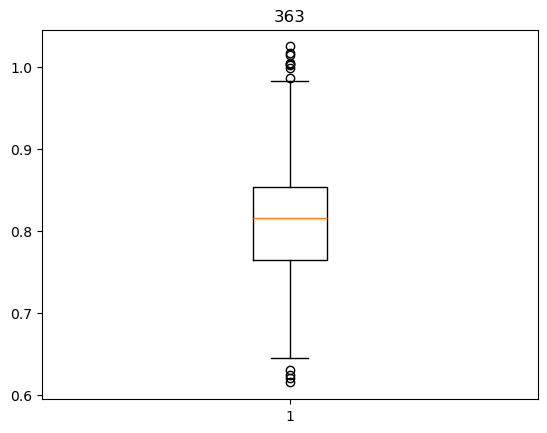

364


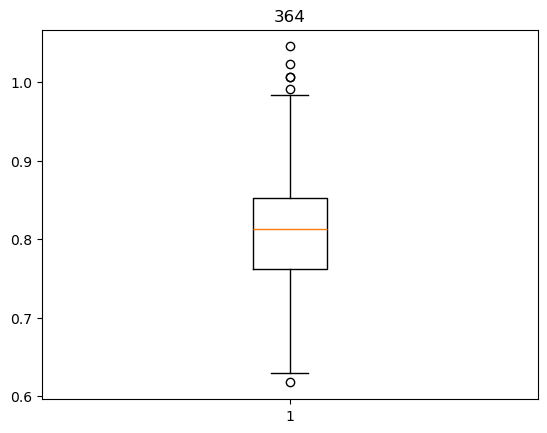

365


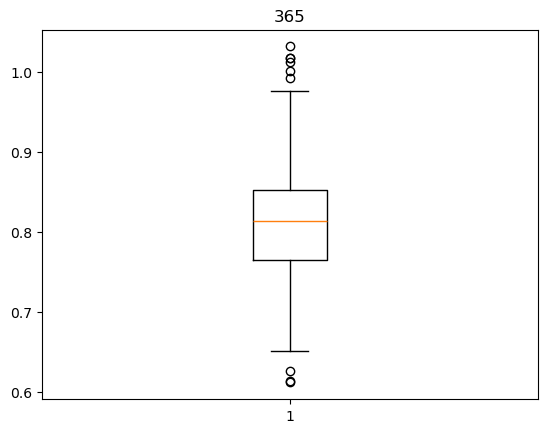

366


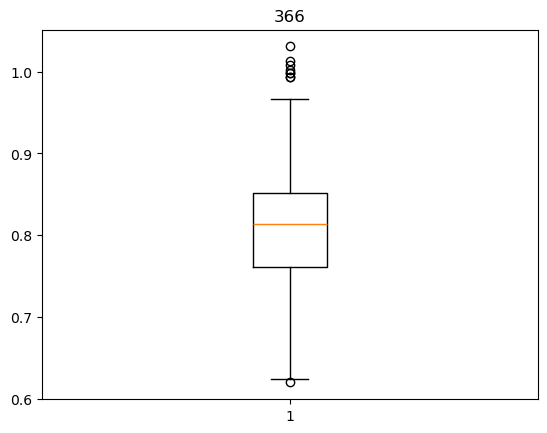

367


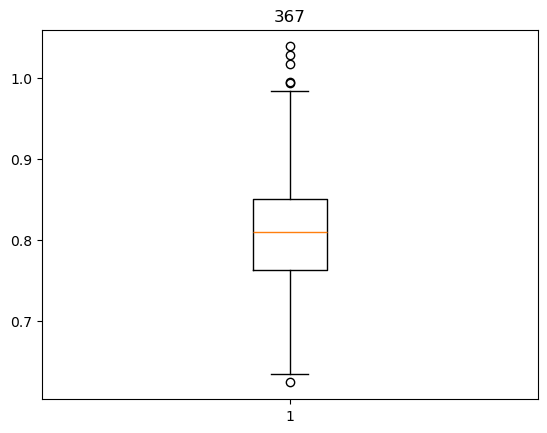

368


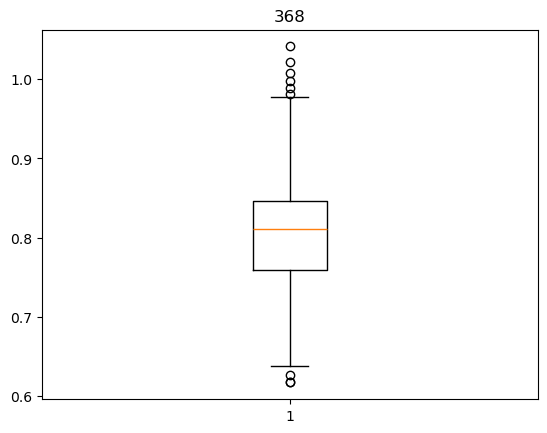

369


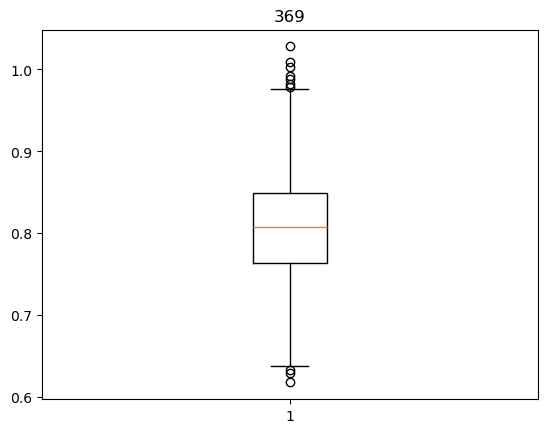

370


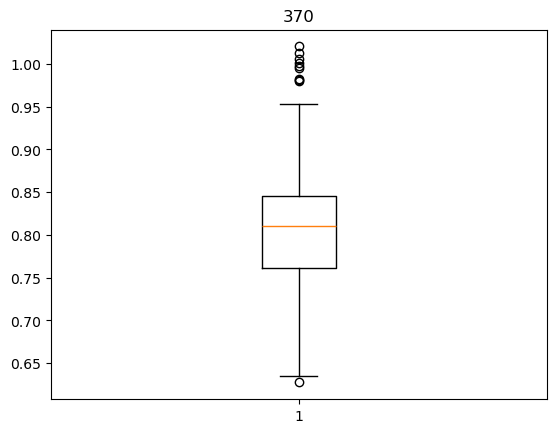

371


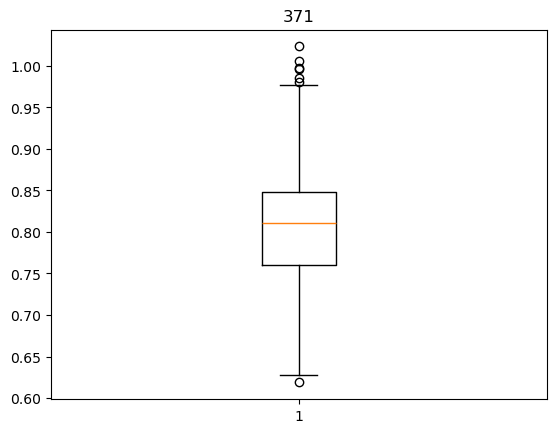

372


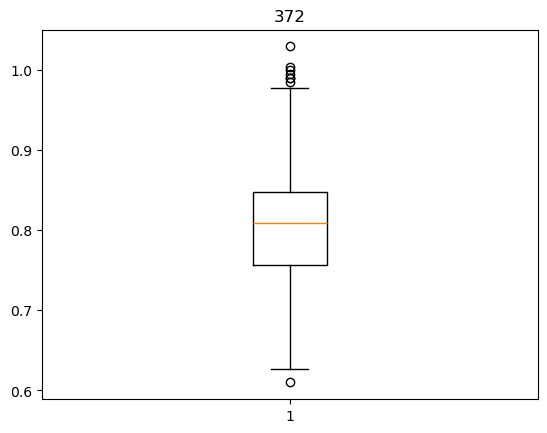

373


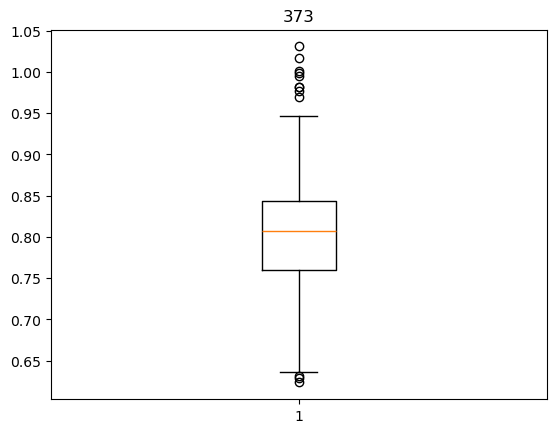

374


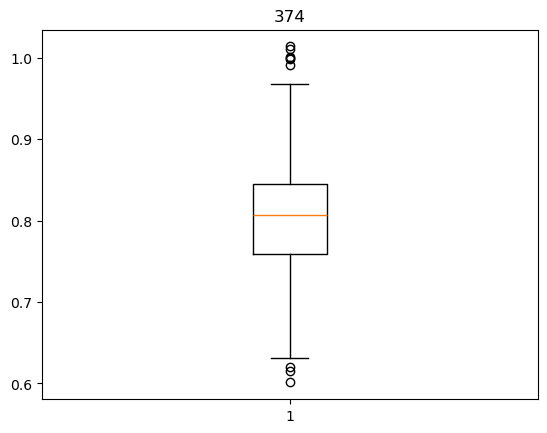

375


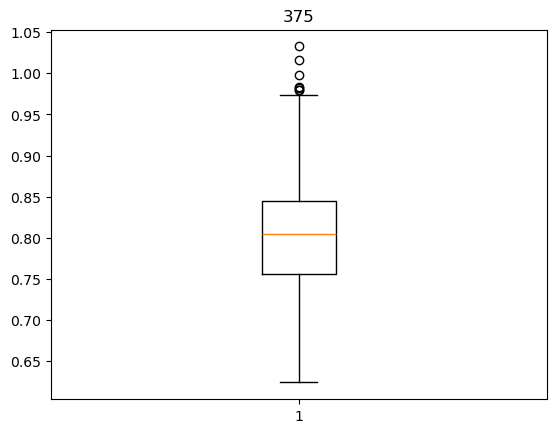

376


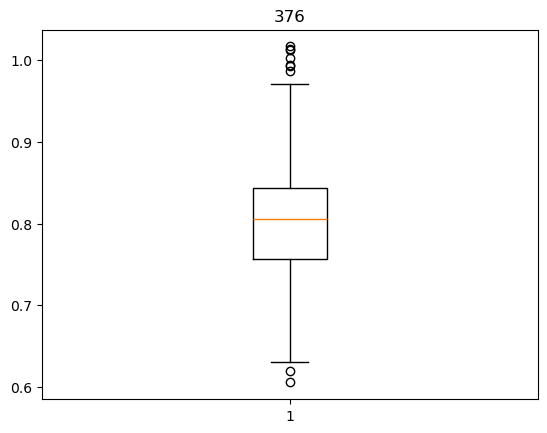

377


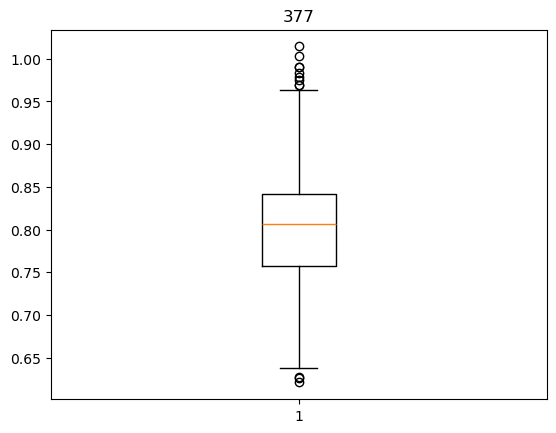

378


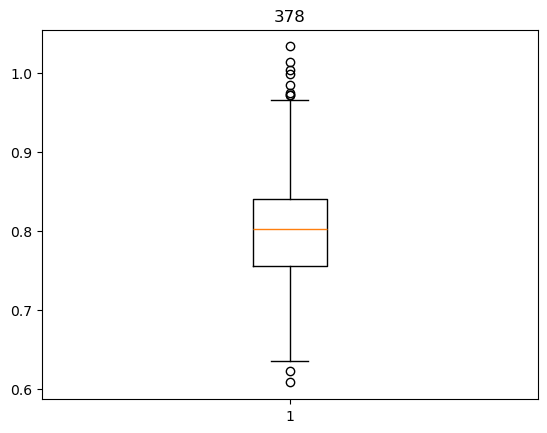

379


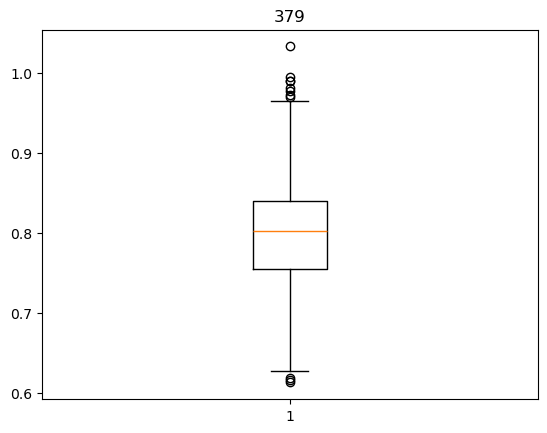

380


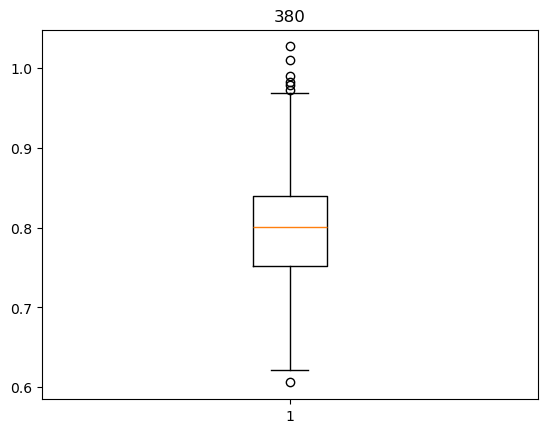

381


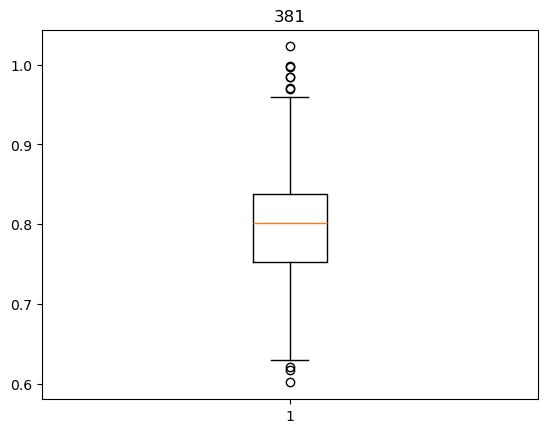

382


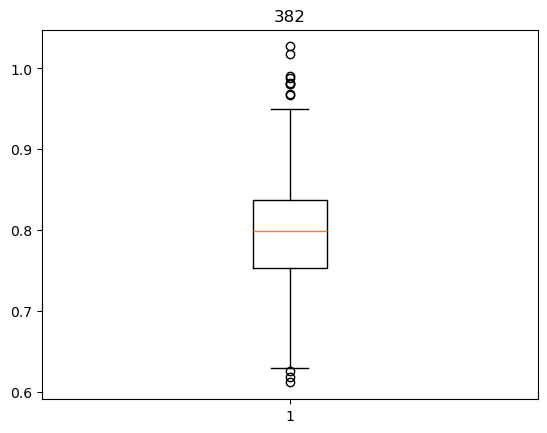

383


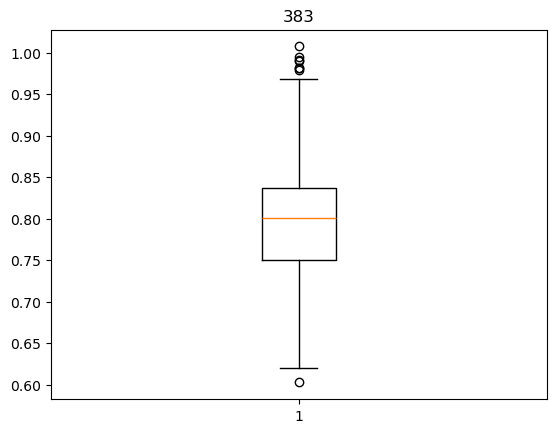

384


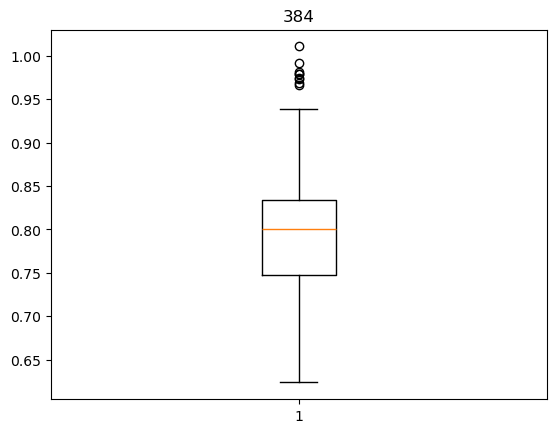

385


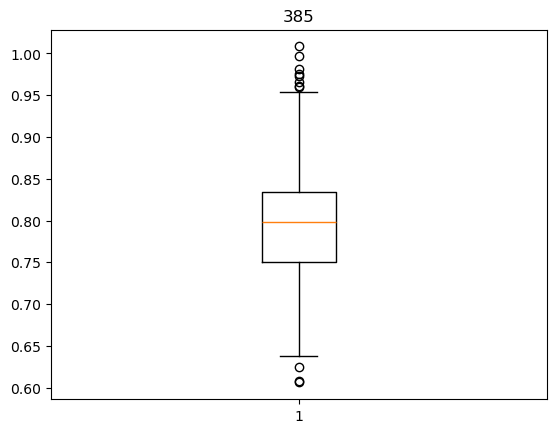

386


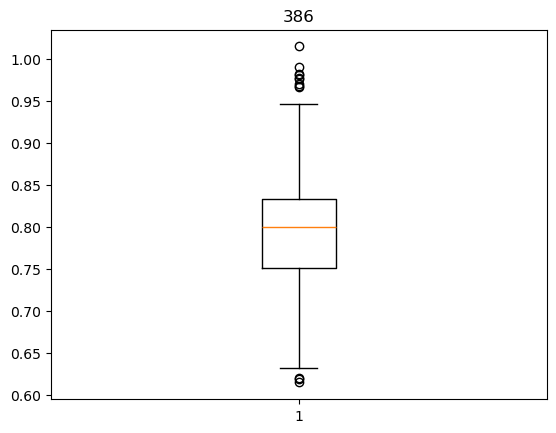

387


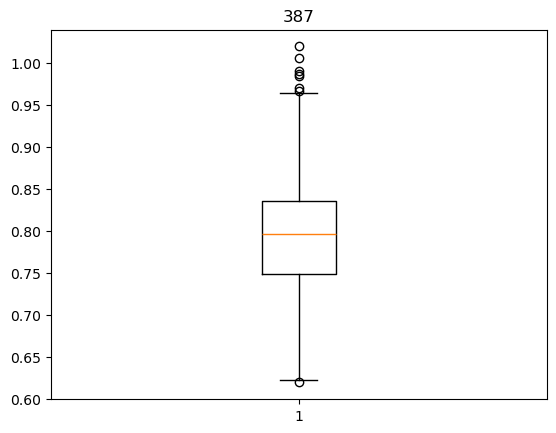

388


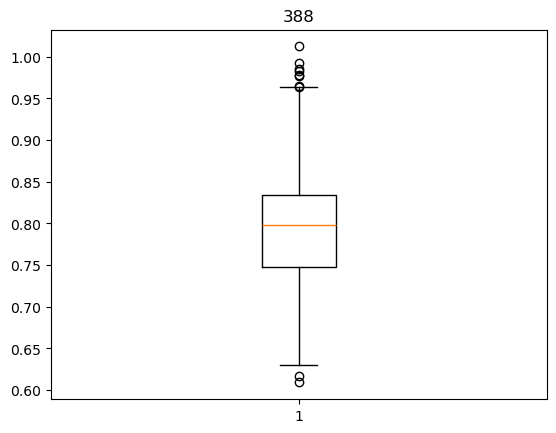

389


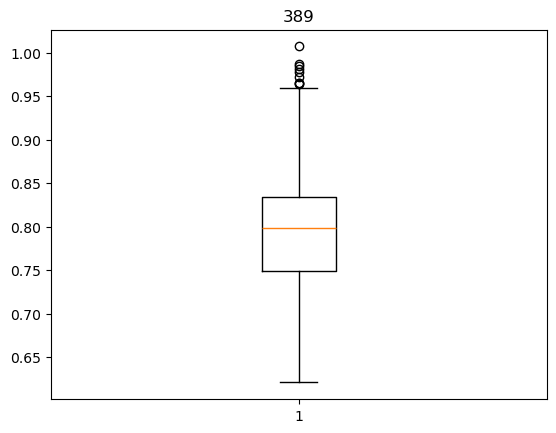

390


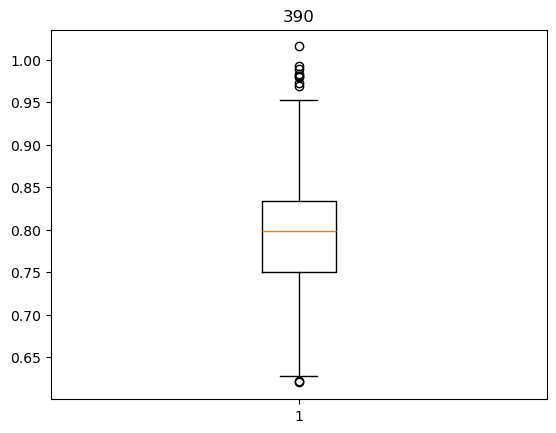

391


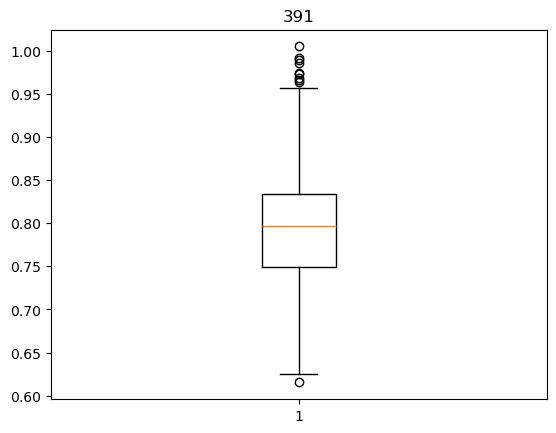

392


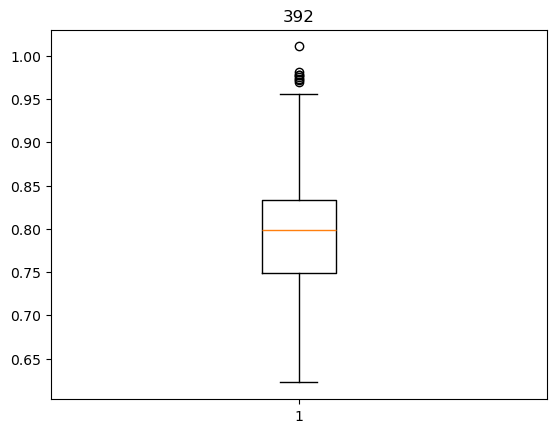

393


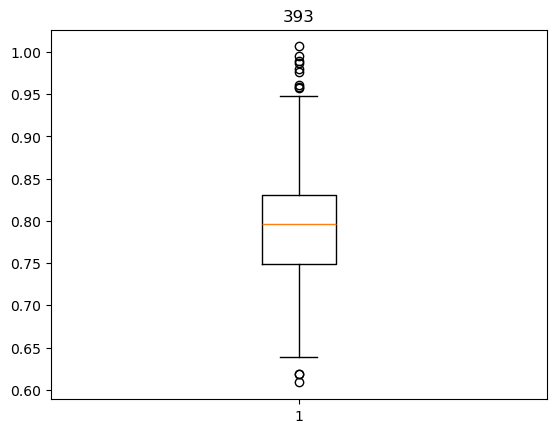

394


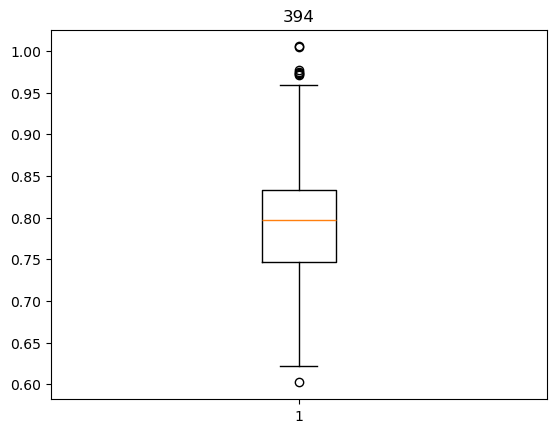

395


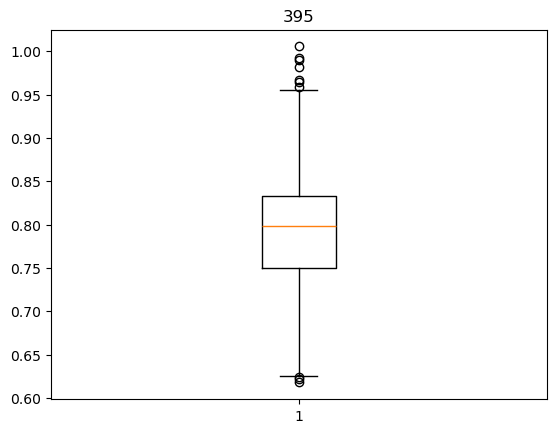

396


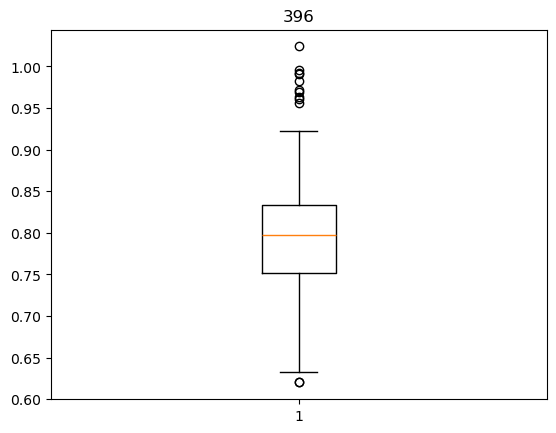

397


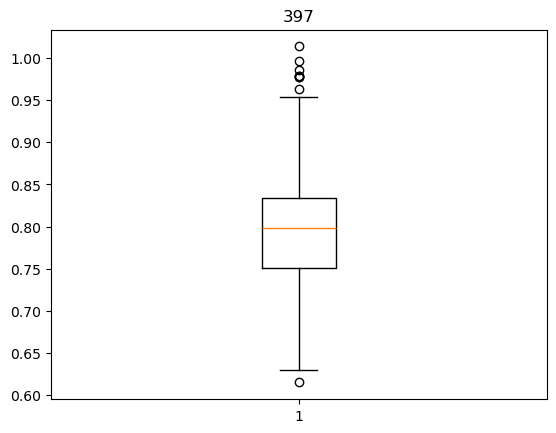

398


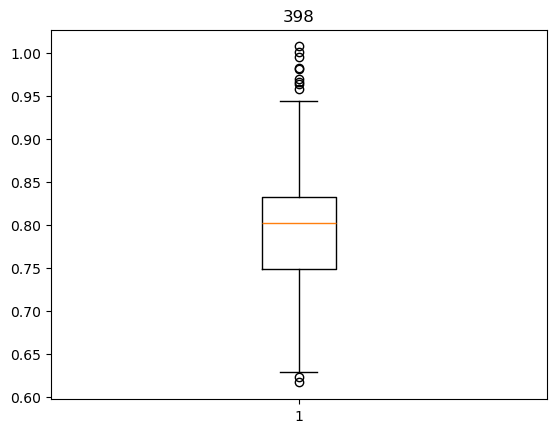

399


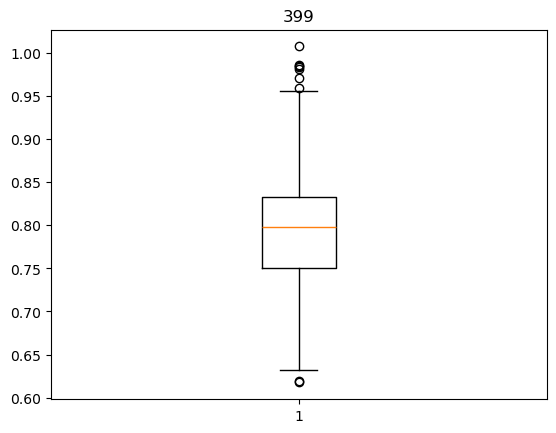

400


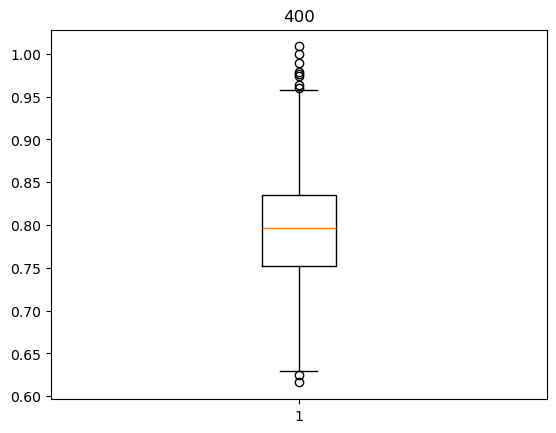

401


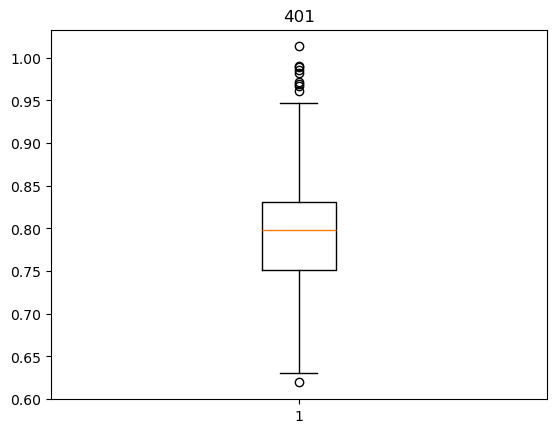

402


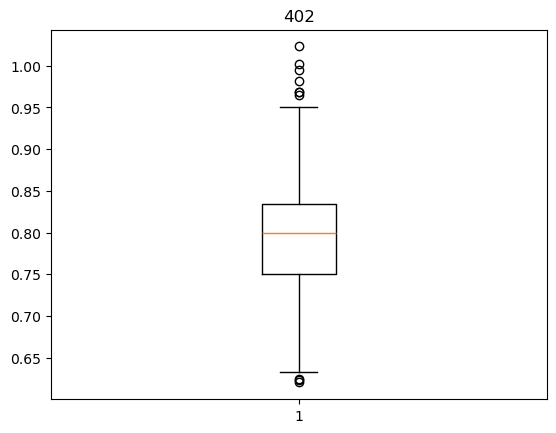

403


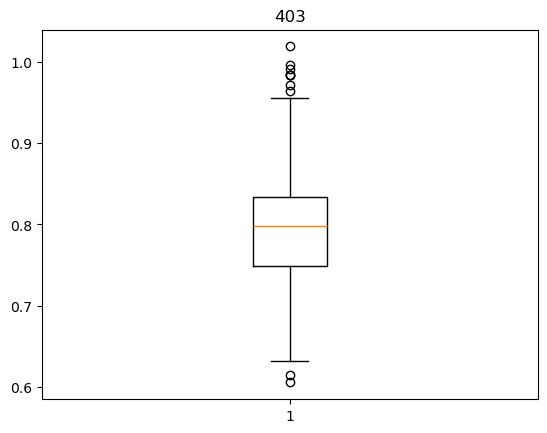

404


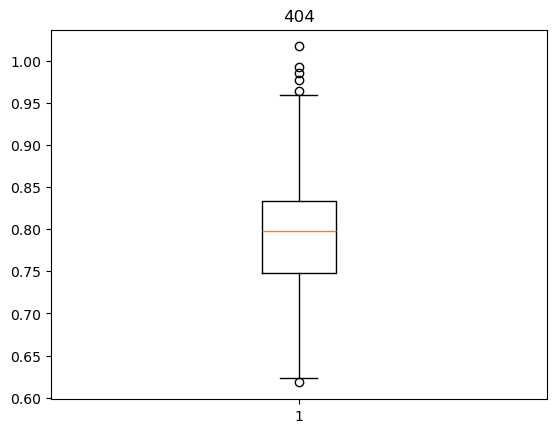

405


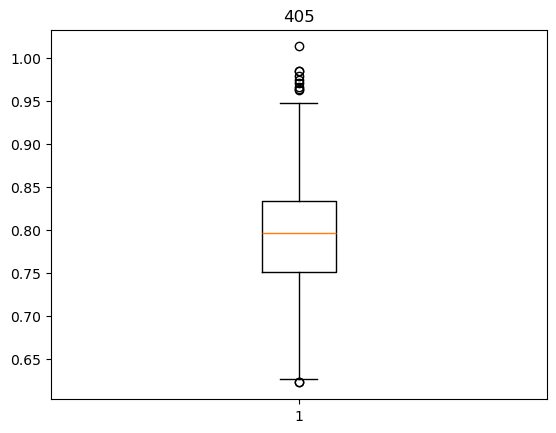

406


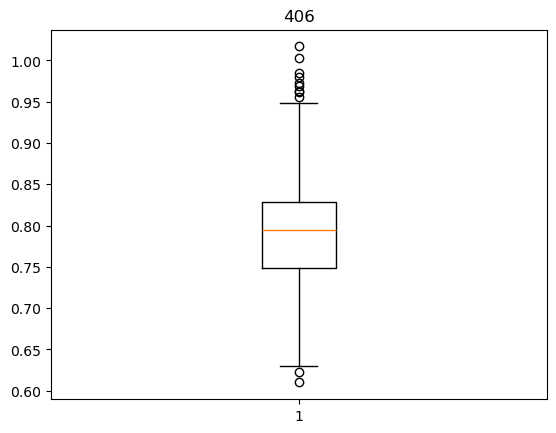

407


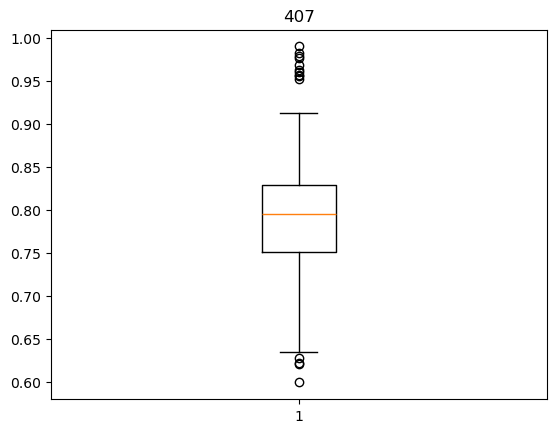

408


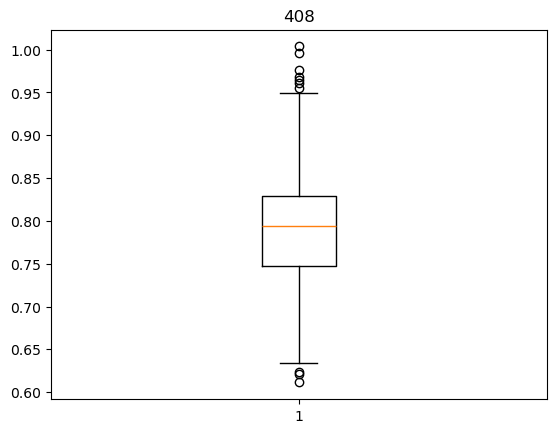

409


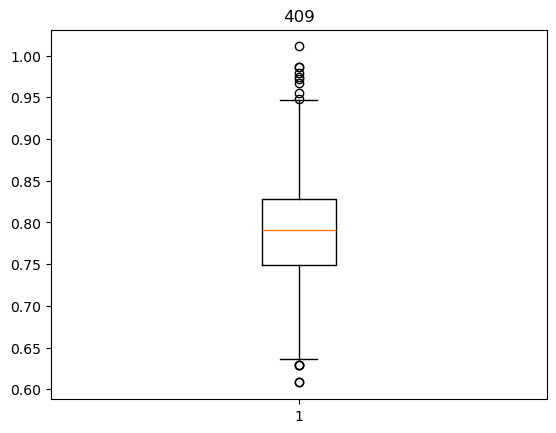

410


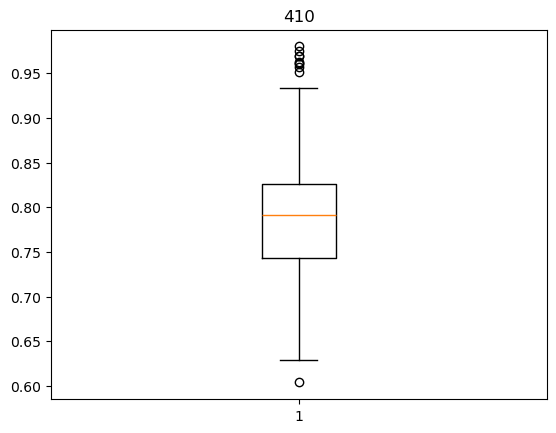

411


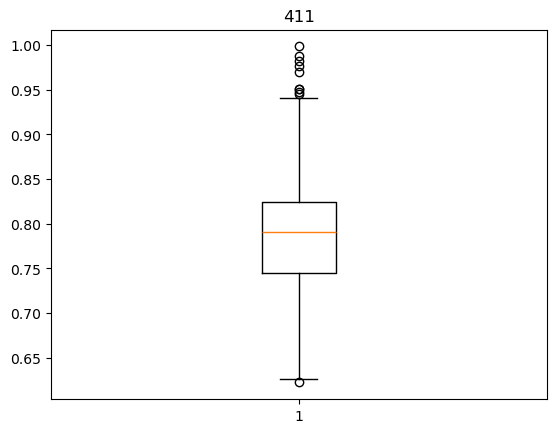

412


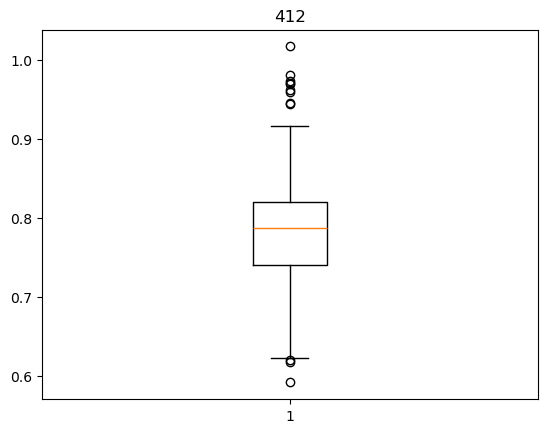

413


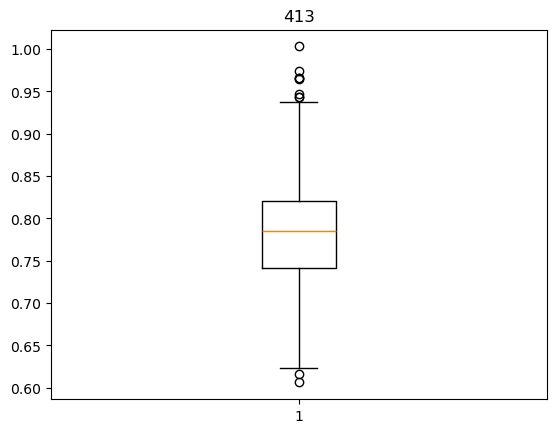

414


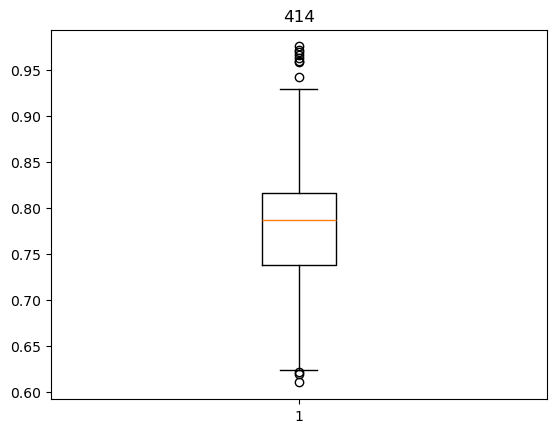

415


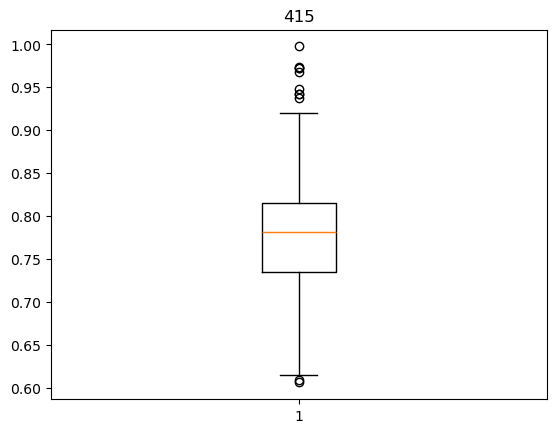

416


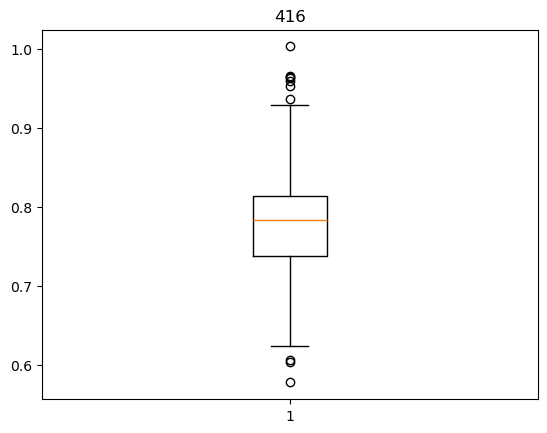

417


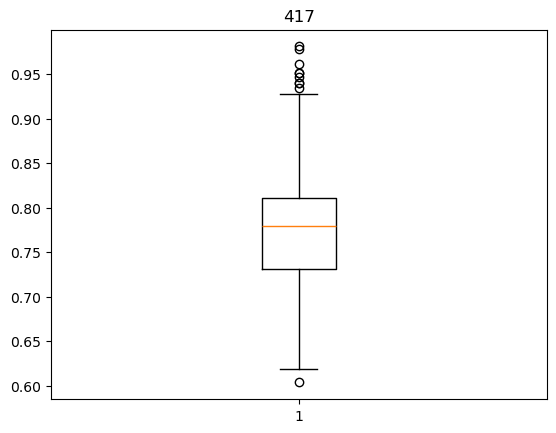

418


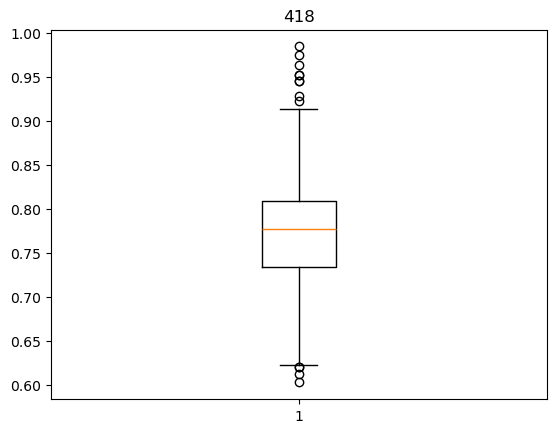

419


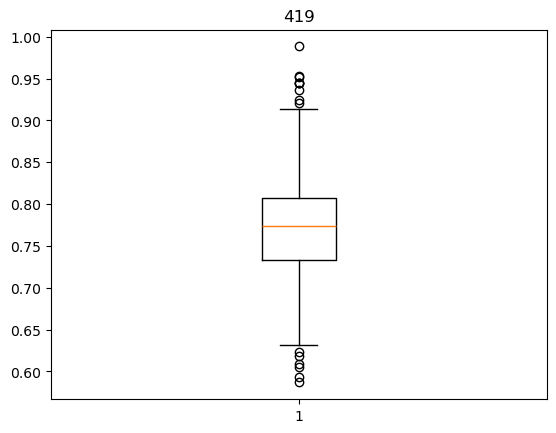

420


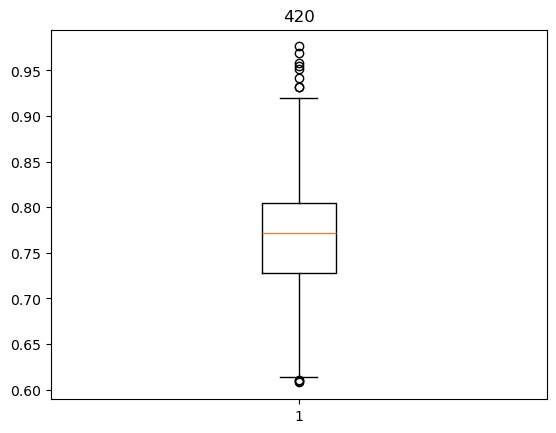

421


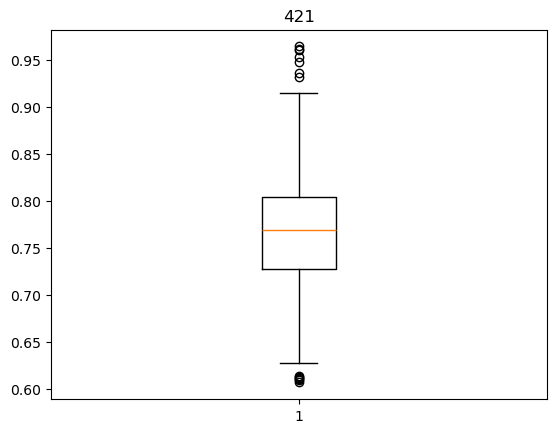

422


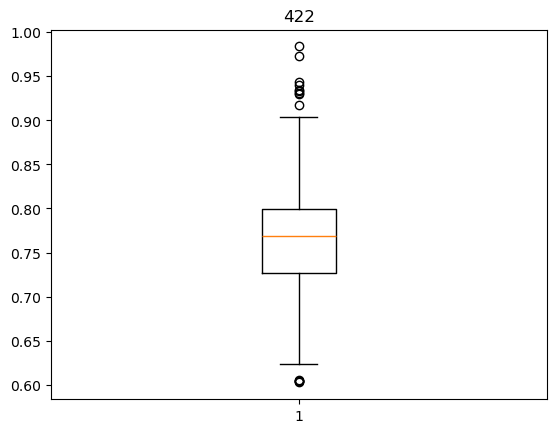

423


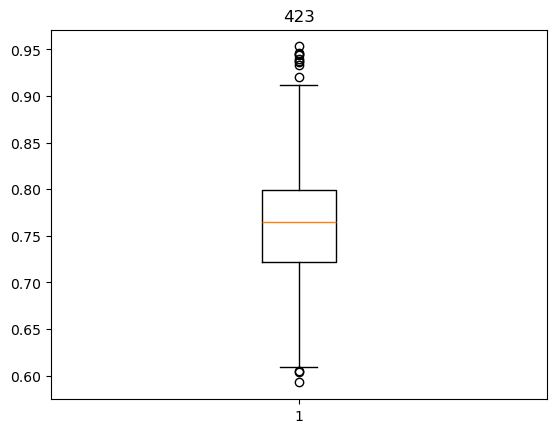

424


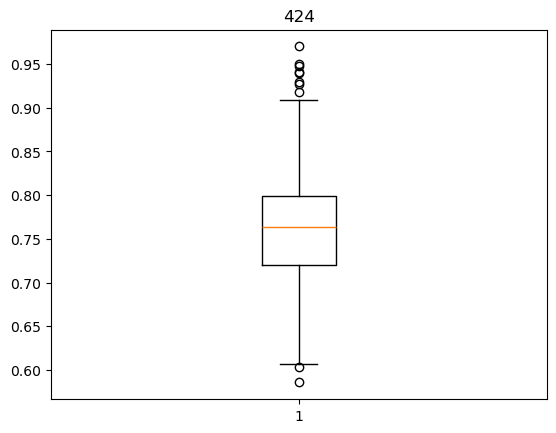

425


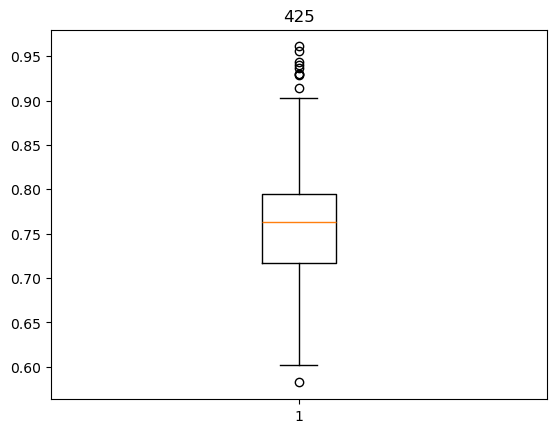

426


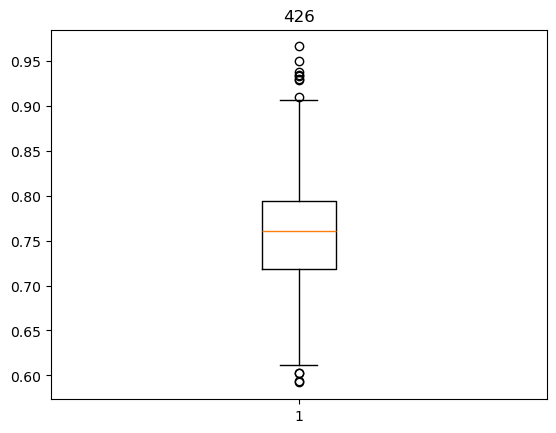

427


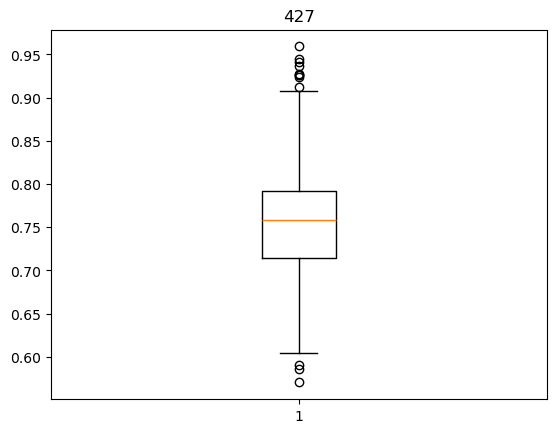

428


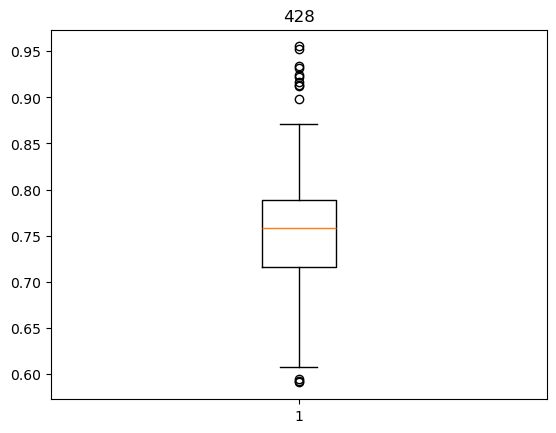

429


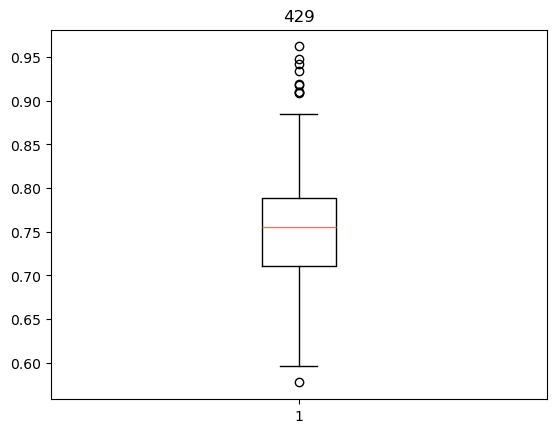

430


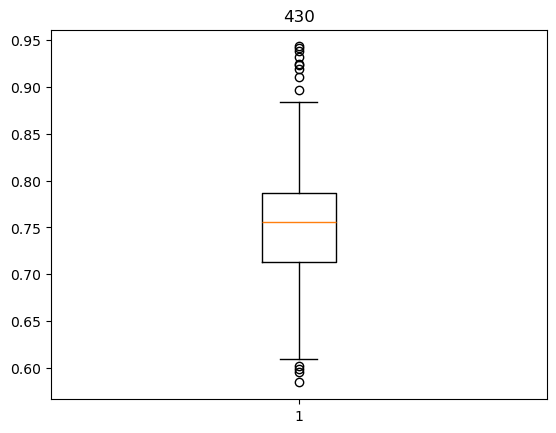

431


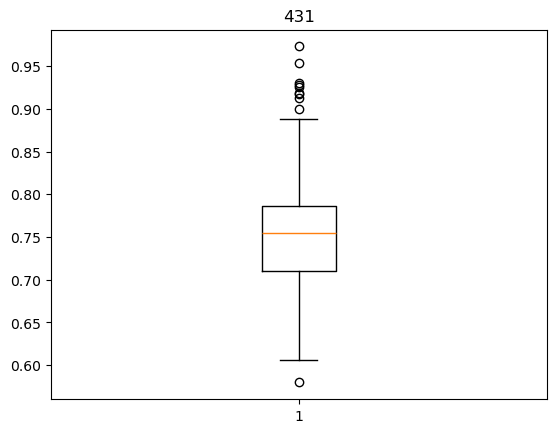

432


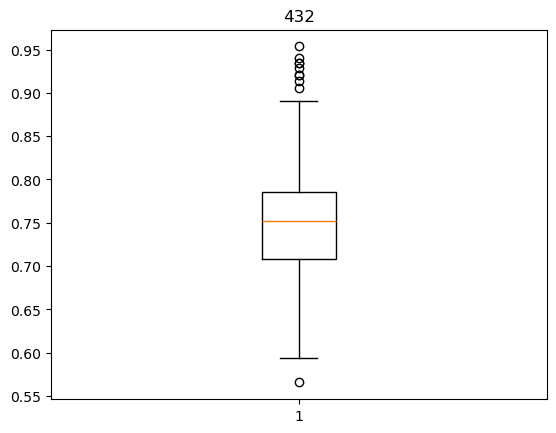

433


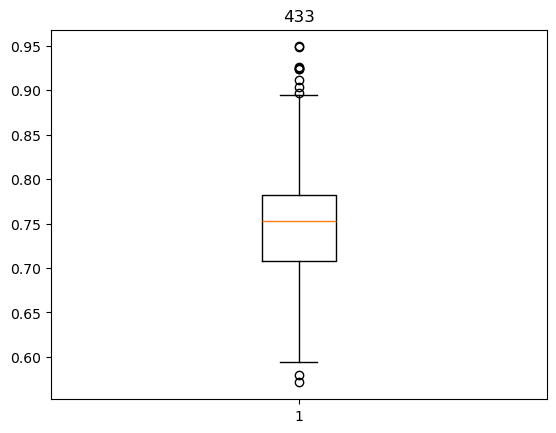

434


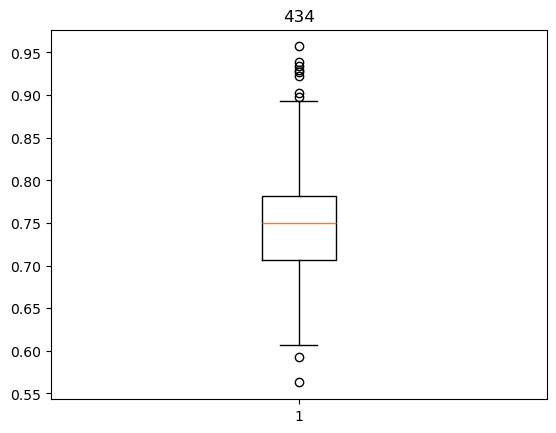

435


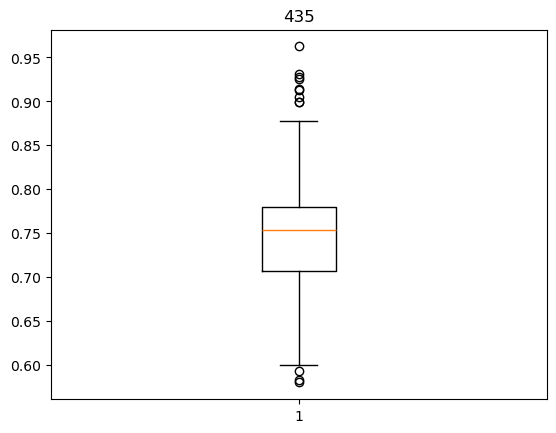

436


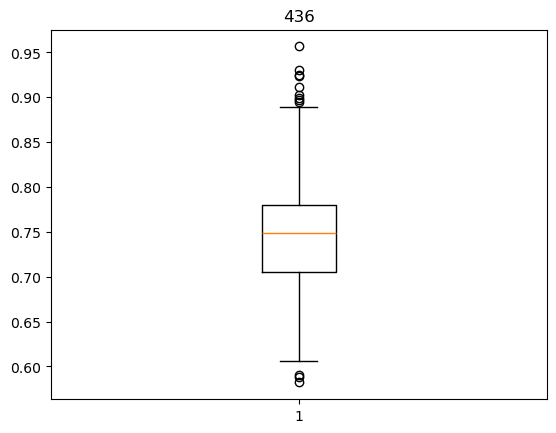

437


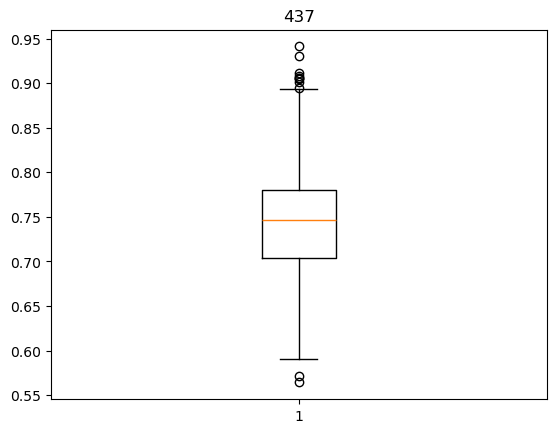

438


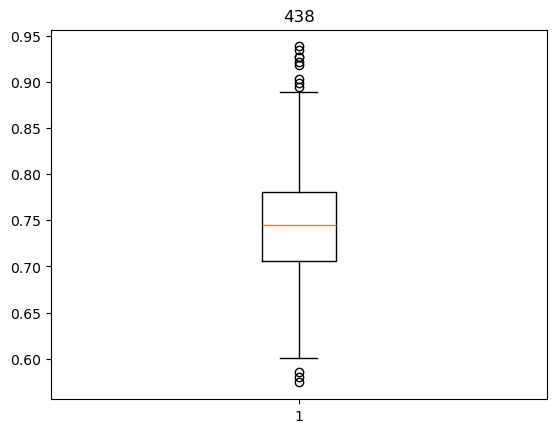

439


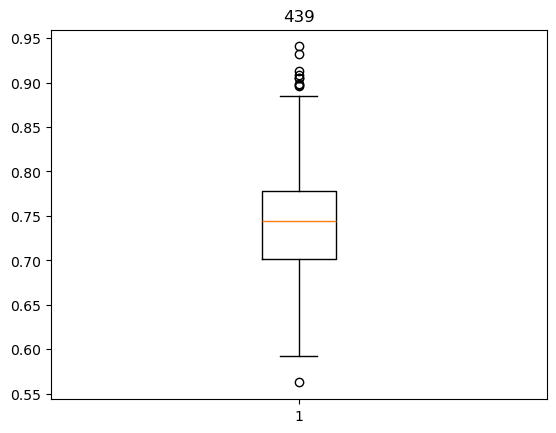

440


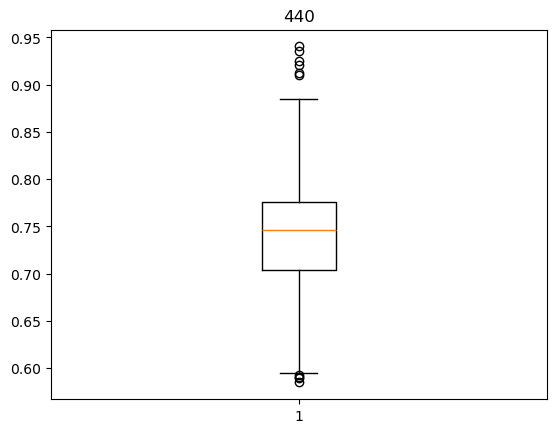

441


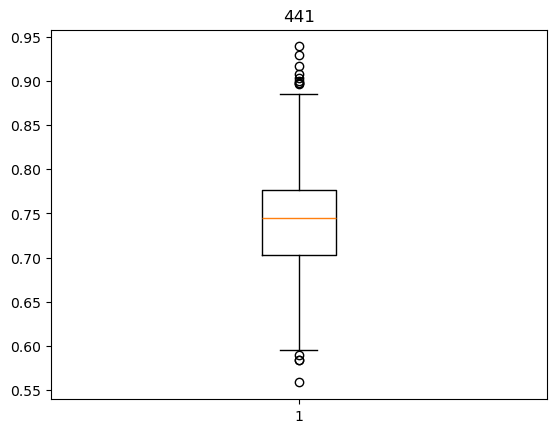

442


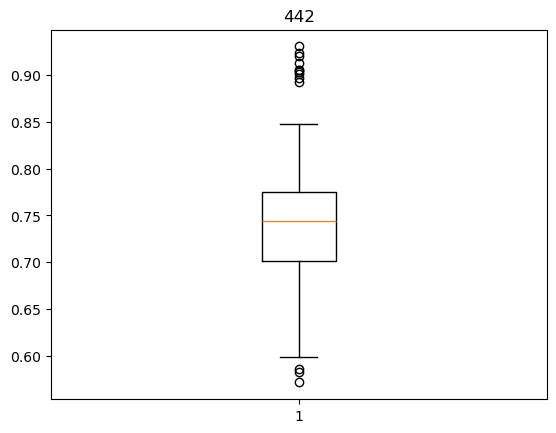

443


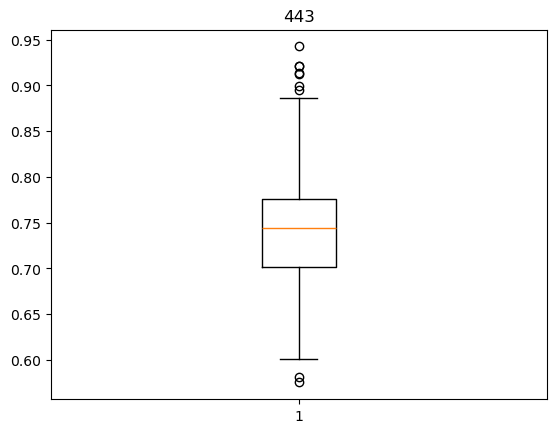

444


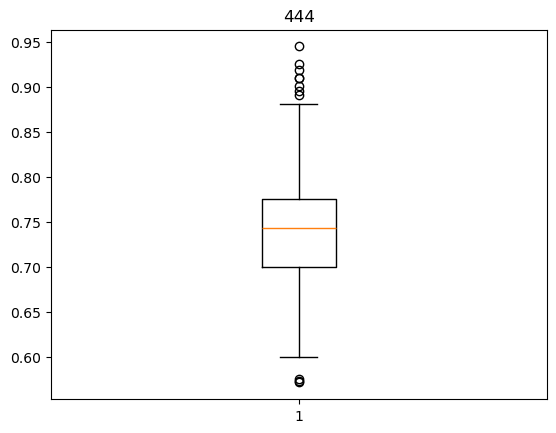

445


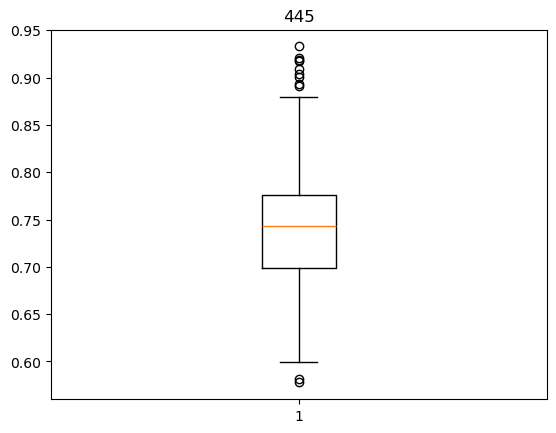

446


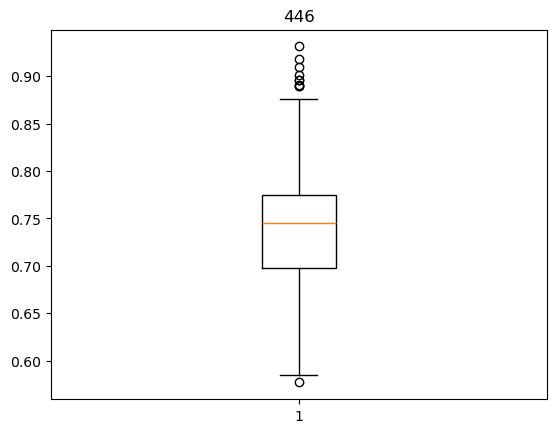

447


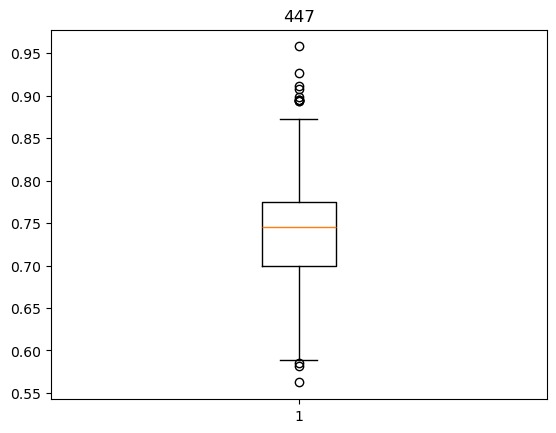

vomitoxin_ppb


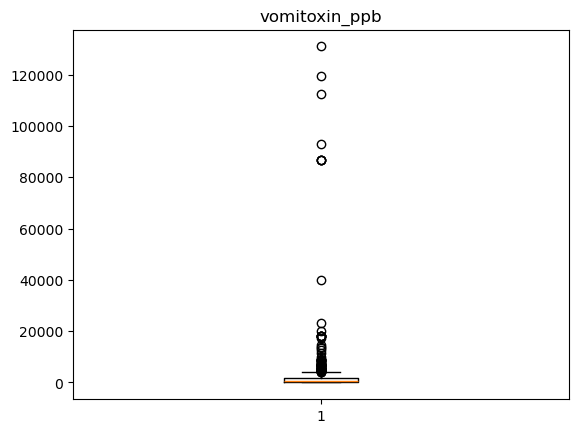

In [11]:
for col in df.columns:
    print(col)
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[col])  
    plt.title(col)
    plt.show()
#plt.boxplot(df['0'])

## Inspect For Inconsistencies

### Checking for datatypes

In [14]:
df.dtypes # Check data types

0                float64
1                float64
2                float64
3                float64
4                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 449, dtype: object

### Checking for Duplicates

In [16]:
df.duplicated().sum() # Count duplicates

0

 ## Summary Statistics

In [18]:
df.describe()

0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.043773    0.043659    0.043442  ...    0.053479   
min      0.262876    0.278523    0.255529    0.261459  ...    0.562662   
25%      0.369620    0.364823    0.360634    0.355246  ...    0.702105   
50%      0.405443    0.397917    0.393803    0.387211  ...    0.743857   
75%      0.444384    0.438728    0.431165    0.427039  ...    0.777884   
max      0.504054    0.490692    0.489272    0.472080  ...    0.940642   

              440         441         442         443         444         445  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.740818    0.740459    0.739758    0.739850    0.738738    0.738298   
std      0.053695    0.053812    0.053666    0.053487    0.053601    0.054014   
min      0.585011    0.558412    0.571735    0.575259    0.571767    0.577803   
25%      0.703701    0.702988    0.700889    0.701690    0.700638    0.698655   
50%      0.745922    0.745062    0.743991    0.744004    0.743965    0.743301   
75%      0.776210    0.777069    0.774759    0.775698    0.775686    0.775621   
max      0.940361    0.939153    0.930366    0.942615    0.945225    0.932812   

              446         447  vomitoxin_ppb  
count  500.000000  500.000000     500.000000  
mean     0.737599    0.738099    3410.006000  
std      0.054136    0.054297   13095.803483  
min      0.576985    0.562302       0.000000  
25%      0.698107    0.699673     137.500000  
50%      0.745216    0.745733     500.000000  
75%      0.774635    0.774310    1700.000000  
max      0.931381    0.957860  131000.000000  

[8 rows x 449 columns]

# Preprocessing

## Handle missing data (imputation strategies or removal).

#### As there is no null value in the dataset so there is no need of Handling it as we see above.

## Normalize or standardize the spectral data.


#### spectral data is already scaled between 0 and 1, you do not need Min-Max normalization & standization again.

## Detect and, if necessary, remove or flag anomalies.

In [25]:
df.vomitoxin_ppb.max(),df.vomitoxin_ppb.min()

(131000.0, 0.0)

## Inspecting outlier in Target column

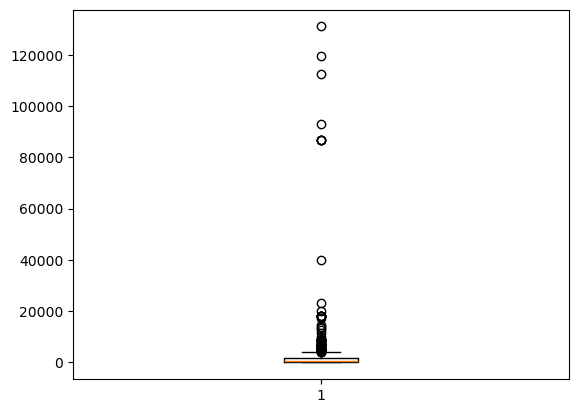

In [27]:
plt.boxplot(df.vomitoxin_ppb)
plt.show()

## Handling Outlier in Target Column

In [29]:
q1=df.vomitoxin_ppb.quantile(0.25)
q3=df.vomitoxin_ppb.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
ll,ul

(-2206.25, 4043.75)

In [30]:
df[(df.vomitoxin_ppb>ul )|( df.vomitoxin_ppb<ll)].shape

(80, 449)

In [31]:
df.shape

(500, 449)

In [32]:
80/500

0.16

### Since 16% of the dataset (~80 rows) contains outliers in the target column, completely removing them might lead to significant data loss. 

## Generate visualizations:
## Line plots for average reflectance over wavelengths.
## Heatmaps or pairplots for sample comparisons.


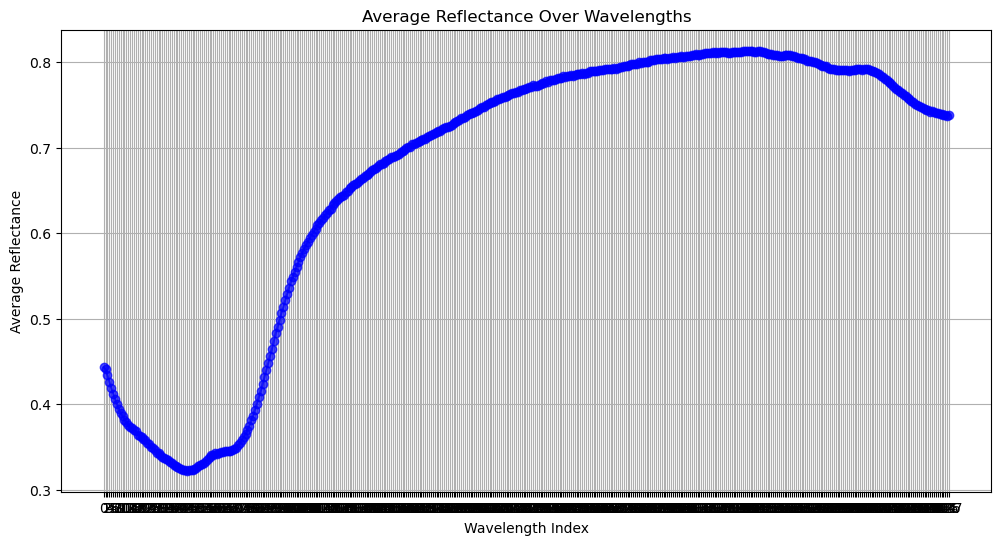

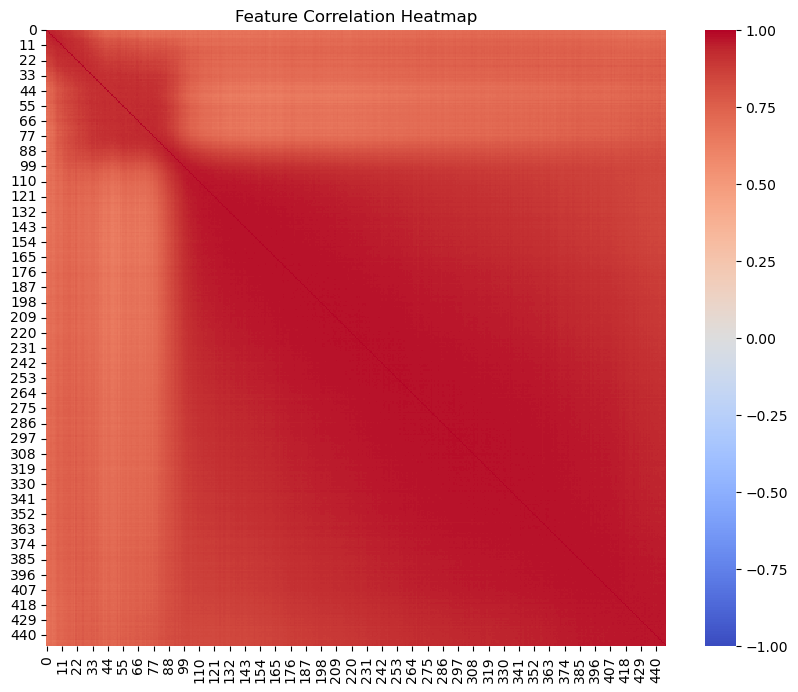

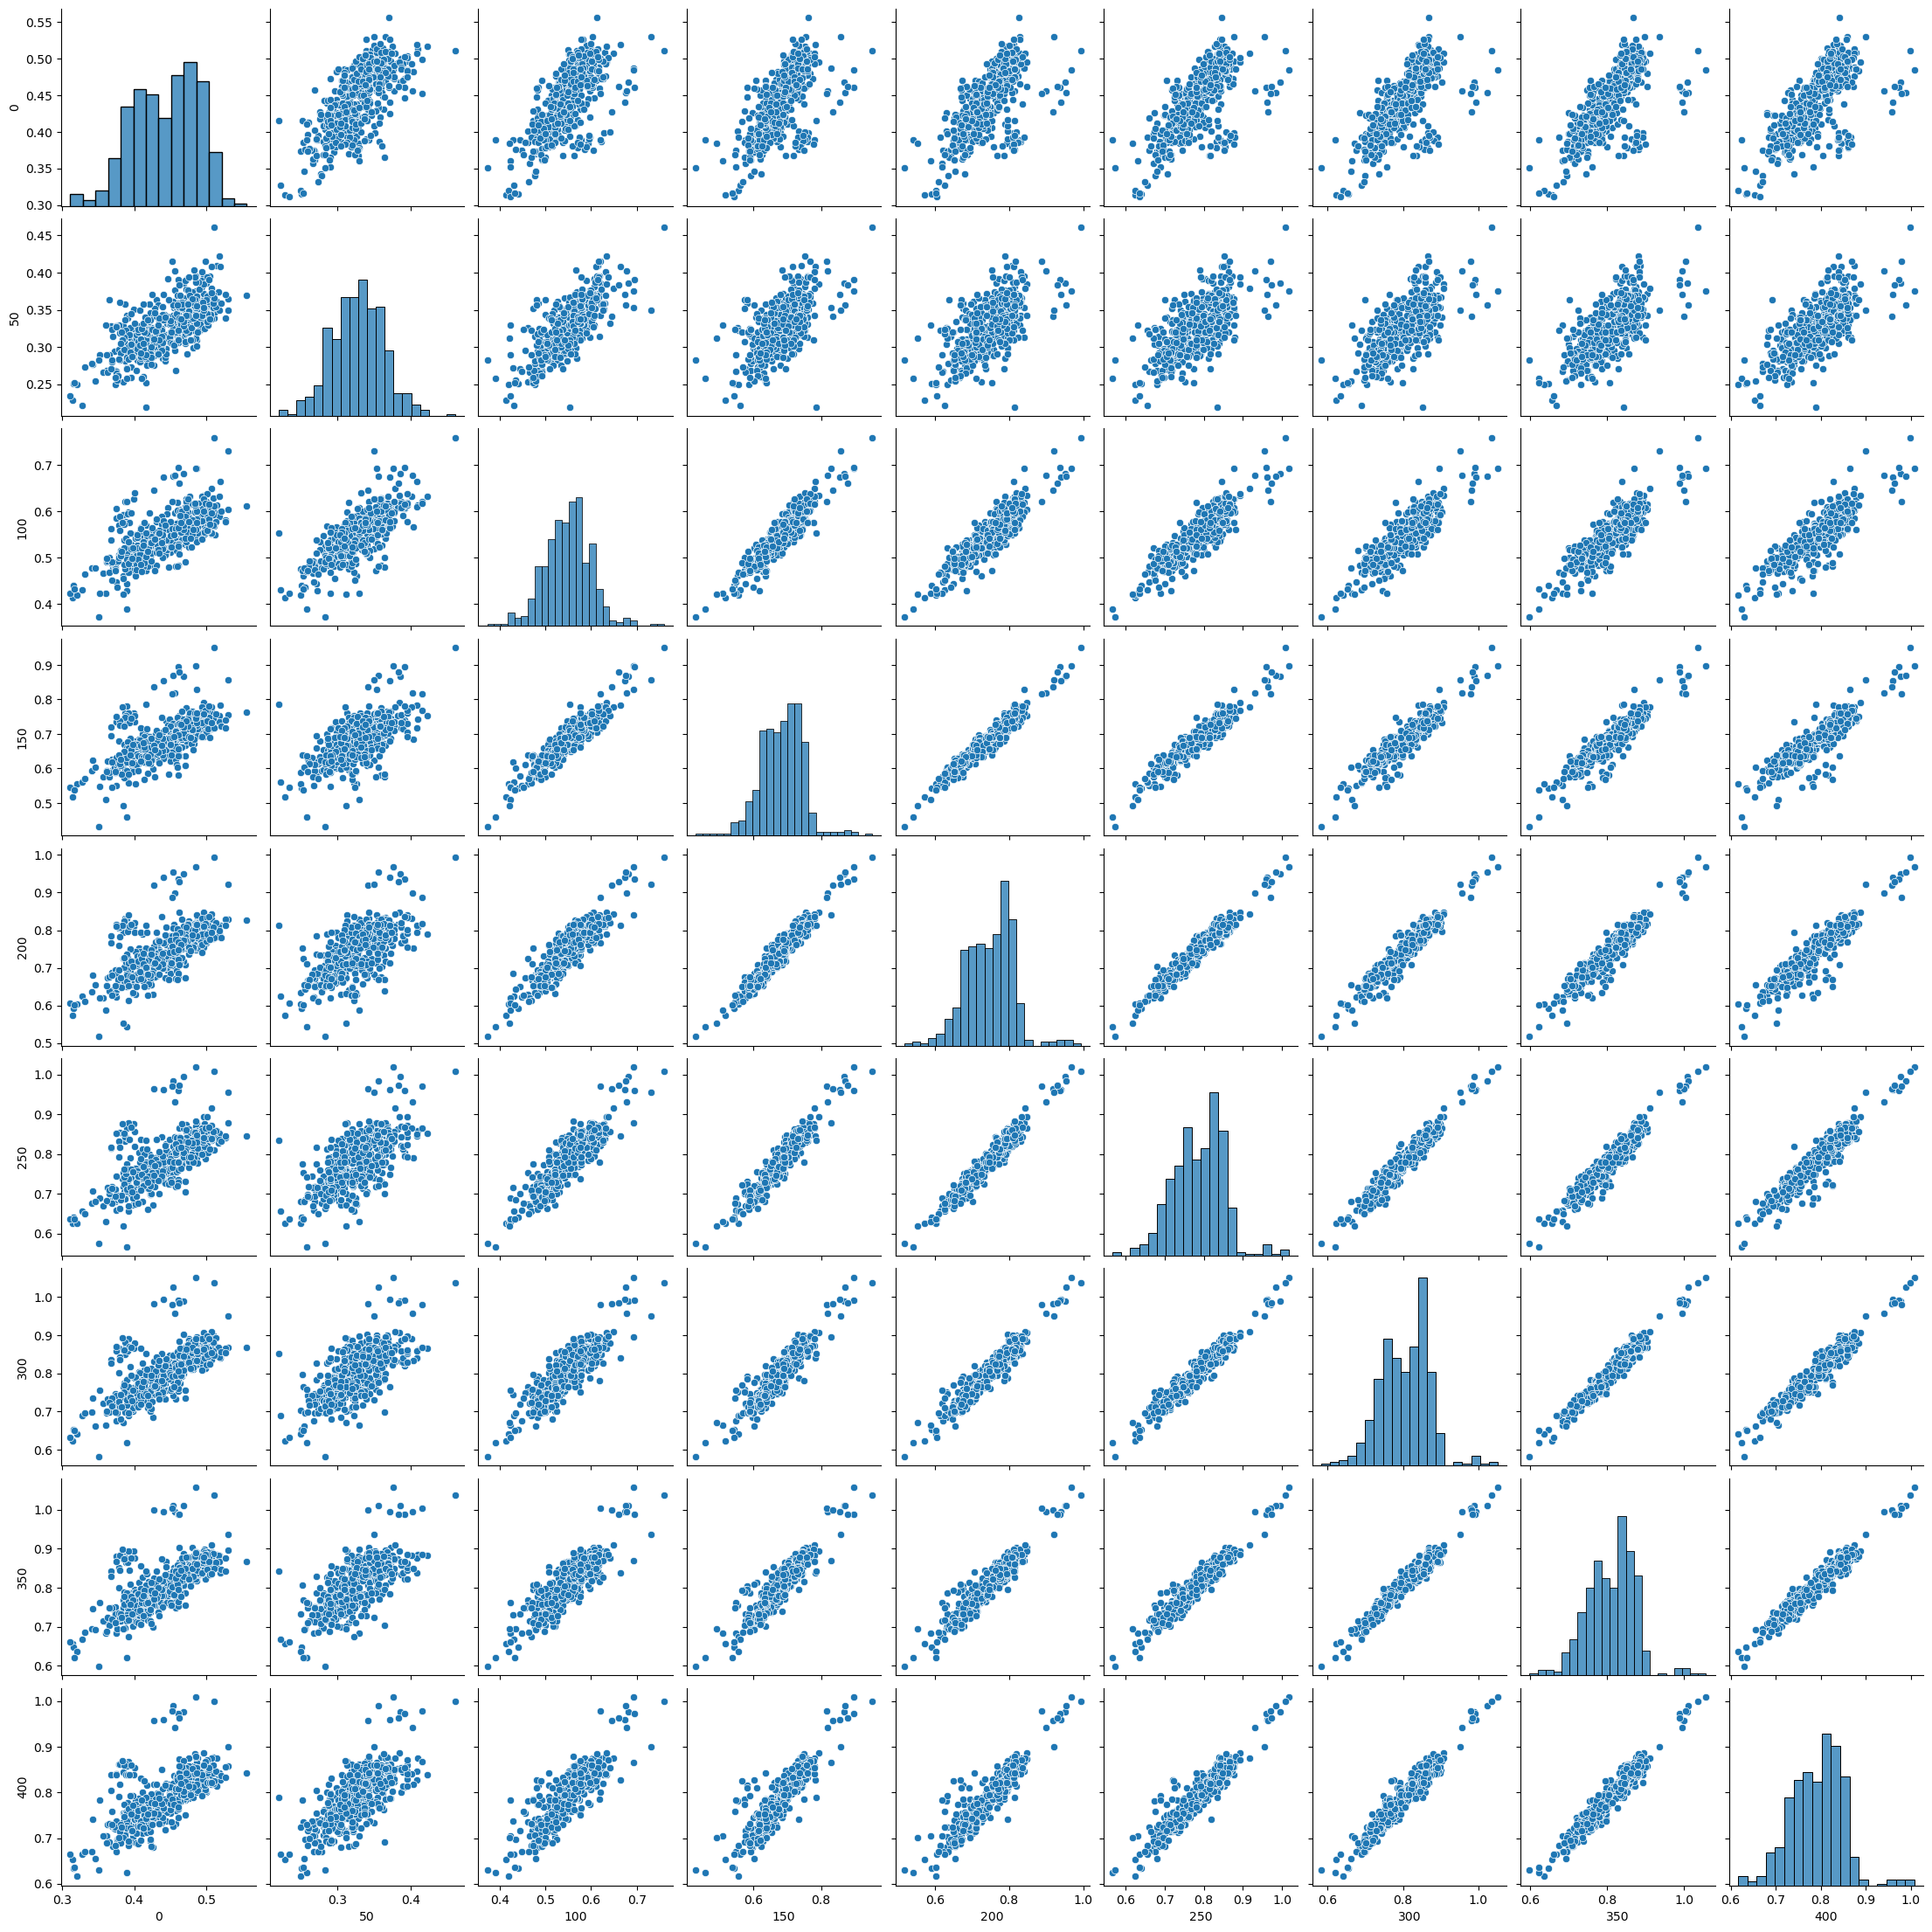

In [35]:

# Assuming the last column is the target (DON concentration)
features = df.iloc[:, :-1]  # All columns except the last one (features)
target = df.iloc[:, -1]     # Last column (target variable)

# 1️⃣ Line Plot for Average Reflectance over Wavelengths
plt.figure(figsize=(12, 6))
plt.plot(features.mean(axis=0), marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance Over Wavelengths")
plt.grid(True)
plt.show()

# 2️⃣ Heatmap for Feature Correlations
plt.figure(figsize=(10, 8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3️⃣ Pairplot for Selected Wavelength Bands
# Selecting every 50th wavelength to reduce complexity
selected_bands = features.iloc[:, ::50]  # Taking every 50th column
sns.pairplot(selected_bands)
plt.show()


In [36]:
df

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       439       440       441  \
0    0.343350  0.344837  0.361567  ...  0.710280  0.717482  0.715078   
1    0.363689  0.373883  0.359674  ...  0.684011  0.697271  0.701995   
2    0.330841  0.328925  0.323854  ...  0.683054  0.669286  0.663179   
3    0.427737  0.415360  0.413106  ...  0.742782  0.730801  0.736787   
4    0.440782  0.426193  0.430482  ...  0.770227  0.773013  0.761431   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.747858  0.730535  0.716969   
496  0.342974  0.352137  0.327545  ...  0.670232  0.659045  0.661587   
497  0.462927  0.442647  0.437731  ...  0.787532  0.780347  0.768362   
498  0.447362  0.451952  0.427200  ...  0.739432  0.759722  0.752118   
499  0.388811  0.382484  0.386995  ...  0.717509  0.726149  0.728631   

          442       443       444       445       446       447  vomitoxin_ppb  
0    0.705379  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1    0.696077  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2    0.676165  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3    0.730044  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4    0.763488  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  
..        ...       ...       ...       ...       ...       ...            ...  
495  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839         1200.0  
496  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733            0.0  
497  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187            0.0  
498  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383            0.0  
499  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706         1400.0  

[500 rows x 449 columns]

In [37]:
## Advanced Data Quality Checks:
### Automate checks for sensor drift or data inconsistencies.
###Optionally create additional features (e.g., spectral indices) that may enhance prediction.


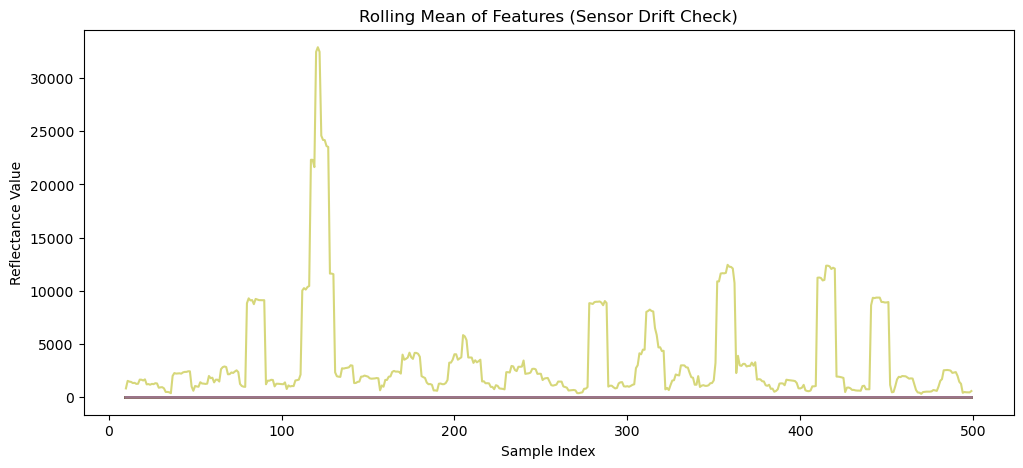

In [38]:
#  Detect Sensor Drift using Rolling Mean
rolling_mean = df.rolling(window=11).mean()
plt.figure(figsize=(12, 5))
plt.plot(rolling_mean, alpha=0.6)
plt.title("Rolling Mean of Features (Sensor Drift Check)")
plt.xlabel("Sample Index")
plt.ylabel("Reflectance Value")
plt.show()

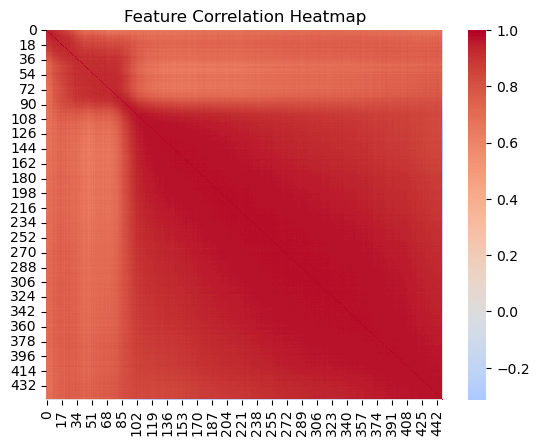

In [39]:
#  Feature Correlation Analysis (Detect Sensor Issues)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [40]:
df

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       439       440       441  \
0    0.343350  0.344837  0.361567  ...  0.710280  0.717482  0.715078   
1    0.363689  0.373883  0.359674  ...  0.684011  0.697271  0.701995   
2    0.330841  0.328925  0.323854  ...  0.683054  0.669286  0.663179   
3    0.427737  0.415360  0.413106  ...  0.742782  0.730801  0.736787   
4    0.440782  0.426193  0.430482  ...  0.770227  0.773013  0.761431   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.747858  0.730535  0.716969   
496  0.342974  0.352137  0.327545  ...  0.670232  0.659045  0.661587   
497  0.462927  0.442647  0.437731  ...  0.787532  0.780347  0.768362   
498  0.447362  0.451952  0.427200  ...  0.739432  0.759722  0.752118   
499  0.388811  0.382484  0.386995  ...  0.717509  0.726149  0.728631   

          442       443       444       445       446       447  vomitoxin_ppb  
0    0.705379  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1    0.696077  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2    0.676165  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3    0.730044  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4    0.763488  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  
..        ...       ...       ...       ...       ...       ...            ...  
495  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839         1200.0  
496  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733            0.0  
497  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187            0.0  
498  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383            0.0  
499  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706         1400.0  

[500 rows x 449 columns]

# 2. Model Training

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Split data into features (X) and target (y)
X = df.iloc[:,:-1]
Y = df['vomitoxin_ppb']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=34)


###  ✅ Baseline Model: Linear Regression--

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
pred=lr.predict(x_test)

#### ✅ Advanced Model: XGBoost with Hyperparameter Tuning

In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV

In [52]:
xg_model=xgb.XGBRegressor()

In [53]:
param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

In [54]:
random_search = RandomizedSearchCV(xg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42)


In [55]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.0s
[CV] END learning_r

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
best_xgb = random_search.best_estimator_


In [57]:
y_pred_xgb = best_xgb.predict(x_test)

In [ ]:
### ✅ Model Evaluation (Metrics)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate_model(y_test, pred, "Linear Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


📊 Linear Regression - MAE: 26917.7498, RMSE: 32605.0051, R²: -12.3501
📊 XGBoost - MAE: 2177.3145, RMSE: 5744.7523, R²: 0.5856


In [85]:
### ✅ Visual Evaluation

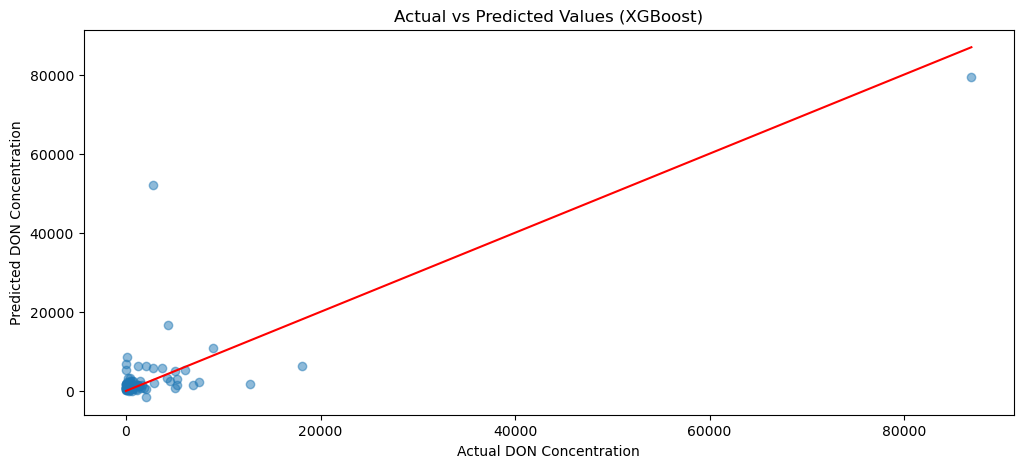

In [87]:
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted Values (XGBoost)")
plt.show()


In [ ]:
### ✅ Interpretability with SHAP (For XGBoost)

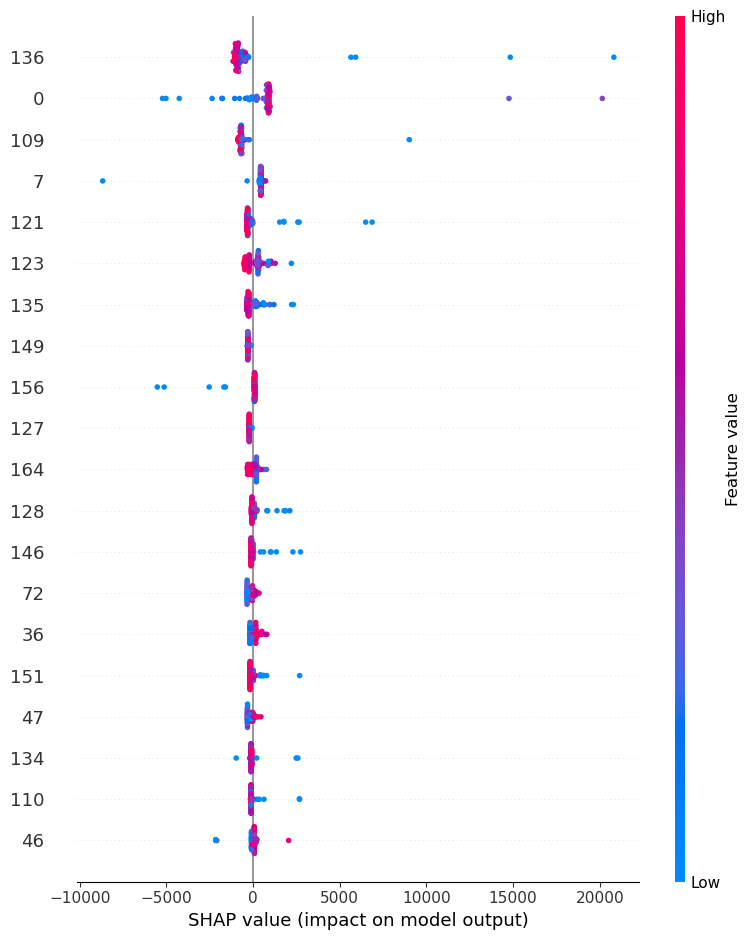

In [93]:
explainer = shap.Explainer(best_xgb)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)